In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt
from multipole_signal import Derivatives
from getdist import plots
from getdist.gaussian_mixtures import GaussianND
import fishermat as fm
import pickle as pk

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 9,
          'xtick.minor.size': 4.5,
          'ytick.major.size': 9,
          'ytick.minor.size': 4.5,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/danielsb/Documents/GitHub


In [2]:
# Redshift bins

z_bins = np.array([ 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95 ])

#z_bins = np.array([ 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55 ])


# Separations

dist = [
    np.arange(20, 164, 4),
    np.arange(32, 164, 4),
]

params_dict0 = {
    'h' : 0.677,
    'As' : 2.05e-9,
    'ns' : 0.965,
    'Ob' : 0.0490, # This is here the density parameter of Baryons
    'Om' : 0.3111, # This is here the density parameter of Cold Dark Matter
}

steps = [1e-3, 1e-1, 1e-4, 1e-2, 1e-2]

# JOINT ANALYSIS. 

### 50x50 vs 10x90 SPLITTINGS.

We run the analysis combining two different population splittings, combining the information as if they were two independent experiments. We include the cross correlations between the observables but assume the parameters of each population are independent. The signal looks like:

$$ \vec{\xi}(z,d) = (\{\xi_l^{\mathrm{LM}}(z,d)\}_{l=0,1,2,4}, \{\xi_l^{\mathrm{NP}}(z,d)\}_{l=0,1,2,4}) $$



## Derivatives (LOAD FROM FILE)

In [3]:
with open('derivatives.pkl', 'rb') as File:
    derivatives_dict = pk.load(File)
    
derivatives_50x50 = derivatives_dict['split_50x50']
derivatives_10x90 = derivatives_dict['split_10x90']

In [4]:
dsignal_dsbias50 = derivatives_50x50['dsignal_dsbias']

dsignal_dgbias50 = derivatives_50x50['dsignal_dgbias']

dsignal_dcosmic50 = derivatives_50x50['dsignal_dcosmic']

dsignal_dnum50 = derivatives_50x50['dsignal_dnumev']

np.shape(dsignal_dsbias50), np.shape(dsignal_dgbias50), np.shape(dsignal_dcosmic50), np.shape(dsignal_dnum50)

((8, 19, 324), (4, 19, 324), (5, 19, 324), (4, 19, 324))

In [5]:
dsignal_dsbias10 = derivatives_10x90['dsignal_dsbias']

dsignal_dgbias10 = derivatives_10x90['dsignal_dgbias']

dsignal_dcosmic10 = derivatives_10x90['dsignal_dcosmic']

dsignal_dnum10 = derivatives_10x90['dsignal_dnumev']

np.shape(dsignal_dsbias10), np.shape(dsignal_dgbias10), np.shape(dsignal_dcosmic10), np.shape(dsignal_dnum10)

((8, 19, 324), (4, 19, 324), (5, 19, 324), (4, 19, 324))

In [6]:
dsignal_dtheta50 = np.concatenate([dsignal_dsbias50, dsignal_dnum50, dsignal_dgbias50, dsignal_dcosmic50])

np.shape(dsignal_dtheta50)

(21, 19, 324)

In [7]:
dsignal_dtheta10 = np.concatenate([dsignal_dsbias10, dsignal_dnum10, dsignal_dgbias10, dsignal_dcosmic10])

np.shape(dsignal_dtheta10)

(21, 19, 324)

REMOVE HEXADECAPOLE FROM 50x50 split

In [8]:
n_sep = len(dist[0])
n_signals = int(len(dsignal_dtheta50[0,0])/n_sep)
ind_to_remove = list(range(7*n_sep,8*n_sep))

print('Number of separations = ', n_sep)
print('Number of signals = ', n_signals)
print('Indices to remove = ', ind_to_remove)

Number of separations =  36
Number of signals =  9
Indices to remove =  [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287]


In [9]:
dsignal_dsB50 = np.concatenate([dsignal_dsbias50[:4], np.zeros_like(dsignal_dsbias50[:4])], axis=2)
dsignal_dsB10 = np.concatenate([np.zeros_like(dsignal_dsbias10[:4]), dsignal_dsbias10[:4]], axis=2)

dsignal_dsM = np.concatenate([dsignal_dsbias50[4:], dsignal_dsbias10[4:]], axis=2)
dsignal_dnum = np.concatenate([dsignal_dnum50, dsignal_dnum10], axis=2)
dsignal_dgbias50 = np.concatenate([dsignal_dgbias50, np.zeros_like(dsignal_dgbias50[:4])], axis=2)
dsignal_dgbias10 = np.concatenate([np.zeros_like(dsignal_dgbias10[:4]), dsignal_dgbias10], axis=2)
dsignal_dcosmic = np.concatenate([dsignal_dcosmic50, dsignal_dcosmic10], axis=2)

In [10]:
dsignal_dtheta_multi_ = np.concatenate([dsignal_dsB50, dsignal_dsB10, dsignal_dsM, dsignal_dnum, dsignal_dgbias50, dsignal_dgbias10, dsignal_dcosmic])

dsignal_dtheta_multi = np.delete(dsignal_dtheta_multi_, ind_to_remove, axis=2)


np.shape(dsignal_dtheta_multi_), np.shape(dsignal_dtheta_multi)

((29, 19, 648), (29, 19, 612))

## Covariance Matrix

In [11]:
# Create the PRIORS Cov Matrix for sB, sM, num

errB = [5e-1, 5e-1] 
errF = [5e-1, 5e-1]

num_fit = np.array([7.94599872, -12.03752386, 2.29927261, -15.83887364])

sB_4fit50 = np.array([-0.90110745,  1.82300205, -1.01878441, -0.30342325])
sB_4fit10 = np.array([1.05341768, 0.00485247, 0.6281456,  0.31643253])

sM_4fit = np.array([-0.19376092,  1.07473357, -0.07806244, -0.00558004])

dsB_50 = sB_4fit50 * errB[0] 
dsB_30 = sB_4fit10 * errB[0] 

dsM = sM_4fit * errF[0]

dnum = num_fit * errB[1]

Cov_prior_all = np.diag(np.concatenate([dsB_50**2, dsB_30**2, dsM**2, dnum**2]))

Inv_Cov_prior_all_ = np.linalg.inv(Cov_prior_all)

Inv_Cov_prior_all = np.zeros([len(dsignal_dtheta_multi), len(dsignal_dtheta_multi)])
Inv_Cov_prior_all[:len(Inv_Cov_prior_all_), :len(Inv_Cov_prior_all_)] = Inv_Cov_prior_all_

np.shape(Cov_prior_all), np.shape(Inv_Cov_prior_all)

((16, 16), (29, 29))

In [12]:
Cov_Multipoles_Joint50x10_ = fm.cov_matrix_joint(d=dist[0], z_bins=z_bins, small_off_diagonal=True, splits=[50,10], rtol=1e-4, contributions='all')

print('\n ... Remove the HEXADECAPOLE from 50x50 split ... \n')

Cov_Multipoles_Joint50x10 = np.delete(Cov_Multipoles_Joint50x10_, ind_to_remove, axis=1)
Cov_Multipoles_Joint50x10 = np.delete(Cov_Multipoles_Joint50x10, ind_to_remove, axis=2)

np.shape(Cov_Multipoles_Joint50x10_), np.shape(Cov_Multipoles_Joint50x10)


 ... Loading Covariance Matrices (Joint-splittings Analysis) [all] [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 


 ... Remove the HEXADECAPOLE from 50x50 split ... 



((19, 648, 648), (19, 612, 612))

In [13]:
# Load the Covariance Matrix of the multipoles

Inv_Cov_Multipoles_Joint50x10_ = np.linalg.pinv(Cov_Multipoles_Joint50x10)

# Symmetrize the matrix

Inv_Cov_Multipoles_Joint50x10 = [0.5 * (Inv_Cov_Multipoles_Joint50x10_[i] + Inv_Cov_Multipoles_Joint50x10_[i].T) for i in range(len(z_bins))]

In [14]:
# Build the Fisher Matrix

Fisher_Matrix_Joint50x10_ = fm.fisher_matrix(d_signal = dsignal_dtheta_multi, inv_cov = Inv_Cov_Multipoles_Joint50x10, z_bins = z_bins)
Fisher_Matrix_Joint50x10 = Fisher_Matrix_Joint50x10_ + Inv_Cov_prior_all

np.shape(Fisher_Matrix_Joint50x10)


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



(29, 29)

## Constraints

In [15]:
#Absolute Errors

Sigma_Matrix_Joint50x10 = np.linalg.inv(Fisher_Matrix_Joint50x10)

Abs_Errors_all_Joint = np.sqrt(np.diag(Sigma_Matrix_Joint50x10))

# Fiducial values

sB_fit = np.concatenate([sB_4fit50, sB_4fit10]) 
gbias_fit = np.concatenate([np.array([0.554, 0.783]), np.array([0.554, 0.783]), np.array([0.554, 0.783]), np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_fid = np.concatenate([sB_fit, sM_4fit, num_fit, gbias_fit, cosmic_fid])

# Relative errors

Rel_Errors_all_Joint = np.abs(Abs_Errors_all_Joint/params_fid)

par_errors_all_Joint = Rel_Errors_all_Joint * 100

print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB_50 = ', par_errors_all_Joint[0:int(len(sB_fit)/2)])
print()
print('sB_30 = ', par_errors_all_Joint[int(len(sB_fit)/2):len(sB_fit)])
print()
print('s_model = ', par_errors_all_Joint[len(sB_fit):len(sB_fit)+len(sM_4fit)])
print()
print('number = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)):(len(sB_fit)+len(sM_4fit)+len(num_fit))])
print()
print('gbias_50 = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)/2))])
print()
print('gbias_30 = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)+len(num_fit)+int(len(gbias_fit)/2)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)))])
print()
print('cosmic = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit) + len(cosmic_fid))])
print()


------------ Relative errors * 100 ------------

sB_50 =  [27.3320625  14.06686842 22.96531757 21.83379133]

sB_30 =  [23.95526979 49.99923515 33.2312735  31.21737802]

s_model =  [33.54159063 15.89401961 41.05245367 49.86123157]

number =  [39.5702186  27.57773345 12.78476053 27.54186362]

gbias_50 =  [0.39847881 0.35613083 0.1259779  0.26604334]

gbias_30 =  [0.65262249 0.55944517 0.20250889 0.26448602]

cosmic =  [1.06004515 0.67663103 0.85188793 1.09739769 0.47013736]



# SINGLE SPLIT 

### $m = 2 \,\rightarrow\,$ $50\%$ Brigth - $50\%$ Faint

In [16]:
len(dsignal_dgbias50[1,1])/2

324.0

In [17]:
dsignal_dtheta_fit_all50 = np.concatenate([dsignal_dsbias50, dsignal_dnum50, dsignal_dgbias50[:,:,:324], dsignal_dcosmic50])

np.shape(dsignal_dtheta_fit_all50)

(21, 19, 324)

In [18]:
# Create the Cov Matrix for sB, sF, num

Cov_priors_50 = np.diag(np.concatenate([dsB_50**2, dsM**2, dnum**2]))

Inv_Cov_prior_50_ = np.linalg.inv(Cov_priors_50)

Inv_Cov_prior_50 = np.zeros([len(dsignal_dtheta_fit_all50), len(dsignal_dtheta_fit_all50)])
Inv_Cov_prior_50[:len(Inv_Cov_prior_50_), :len(Inv_Cov_prior_50_)] = Inv_Cov_prior_50_

np.shape(Cov_priors_50)

(12, 12)

In [19]:
# Fisher Matrix + prior

Inv_Cov_Multipoles_50 = fm.inverse_cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[50, 50], small_off_diagonal = True, rtol=1e-10)

Fisher_Matrix_50_ = fm.fisher_matrix(d_signal = dsignal_dtheta_fit_all50, inv_cov = Inv_Cov_Multipoles_50, z_bins = z_bins)

Fisher_Matrix_50 = Fisher_Matrix_50_ + Inv_Cov_prior_50

np.shape(Fisher_Matrix_50)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 50% BRIGHT - 50% FAINT 


 ... Computing the Inverse [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

---------------------------------------- DONE. ---------------------------------------- 


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



(21, 21)

In [20]:
Sigma_Matrix_50 = np.linalg.inv(Fisher_Matrix_50)

#Absolute Errors

Abs_Errors_all_50 = np.sqrt(np.diag(Sigma_Matrix_50))

# Fiducial values

sbias_fit_50 = np.concatenate([sB_4fit50, sM_4fit])
gbias_fit_50 = np.concatenate([np.array([0.554, 0.783]), np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_fid_50 = np.concatenate([sbias_fit_50, num_fit, gbias_fit_50, cosmic_fid])

# Relative errors

Rel_Errors_all_50 = np.abs(Abs_Errors_all_50/params_fid_50)

par_errors_all_50 = Rel_Errors_all_50 * 100

print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB = ', par_errors_all_50[0:int(len(sbias_fit_50)/2)])
print()
print('smodel = ', par_errors_all_50[int(len(sbias_fit_50)/2):len(sbias_fit_50)])
print()
print('number = ', par_errors_all_50[len(sbias_fit_50):(len(sbias_fit_50) + len(num_fit))])
print()
print('gbias = ', par_errors_all_50[(len(sbias_fit_50) + len(num_fit)):(len(sbias_fit_50) + len(num_fit) + len(gbias_fit_50))])
print()
print('cosmic = ', par_errors_all_50[(len(sbias_fit_50) + len(num_fit)+len(gbias_fit_50)):])


------------ Relative errors * 100 ------------

sB =  [30.0176853  18.47286274 25.02677341 23.80648197]

smodel =  [39.28697258 27.82860728 45.07011948 49.94474668]

number =  [41.311851   31.04108379 25.55489758 30.7078349 ]

gbias =  [0.42753608 0.36836194 0.14148455 0.27893804]

cosmic =  [1.10453199 0.70811494 0.90055567 1.12959618 0.49633069]


# SINGLE SPLIT 

### $m = 10 \,\rightarrow\,$ $10\%$ Brigth - $90\%$ Faint

In [21]:
len(dsignal_dgbias10[1,1])/2

324.0

In [22]:
dsignal_dtheta_fit_all10 = np.concatenate([dsignal_dsbias10, dsignal_dnum10, dsignal_dgbias10[:,:,324:], dsignal_dcosmic10])

np.shape(dsignal_dtheta_fit_all10)

(21, 19, 324)

In [23]:
# Create the Cov Matrix for sB, sF, num

Cov_priors_10 = np.diag(np.concatenate([dsB_30**2, dsM**2, dnum**2]))

Inv_Cov_prior_10_ = np.linalg.inv(Cov_priors_10)

Inv_Cov_prior_10 = np.zeros([len(dsignal_dtheta_fit_all10), len(dsignal_dtheta_fit_all10)])
Inv_Cov_prior_10[:len(Inv_Cov_prior_10_), :len(Inv_Cov_prior_10_)] = Inv_Cov_prior_10_

np.shape(Cov_priors_10)

(12, 12)

In [24]:
# Fisher Matrix + prior

Inv_Cov_Multipoles_10 = fm.inverse_cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[10, 90], small_off_diagonal = True, rtol=1e-10)

Fisher_Matrix_10_ = fm.fisher_matrix(d_signal = dsignal_dtheta_fit_all10, inv_cov = Inv_Cov_Multipoles_10, z_bins = z_bins)

Fisher_Matrix_10 = Fisher_Matrix_10_ + Inv_Cov_prior_10

np.shape(Fisher_Matrix_10)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 10% BRIGHT - 90% FAINT 


 ... Computing the Inverse [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

---------------------------------------- DONE. ---------------------------------------- 


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



(21, 21)

In [25]:
Sigma_Matrix_10 = np.linalg.inv(Fisher_Matrix_10)

#Absolute Errors

Abs_Errors_all_10 = np.sqrt(np.diag(Sigma_Matrix_10))

# Fiducial values

sbias_fit_10 = np.concatenate([sB_4fit10, sM_4fit])
gbias_fit_10 = np.concatenate([np.array([0.554, 0.783]), np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_fid_10 = np.concatenate([sbias_fit_10, num_fit, gbias_fit_10, cosmic_fid])

# Relative errors

Rel_Errors_all_10 = np.abs(Abs_Errors_all_10/params_fid_10)

par_errors_all_10 = Rel_Errors_all_10 * 100

print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB = ', par_errors_all_10[0:int(len(sbias_fit_10)/2)])
print()
print('smodel = ', par_errors_all_10[int(len(sbias_fit_10)/2):len(sbias_fit_10)])
print()
print('number = ', par_errors_all_10[len(sbias_fit_10):(len(sbias_fit_10) + len(num_fit))])
print()
print('gbias = ', par_errors_all_10[(len(sbias_fit_10) + len(num_fit)):(len(sbias_fit_10) + len(num_fit) + len(gbias_fit_10))])
print()
print('cosmic = ', par_errors_all_10[(len(sbias_fit_10) + len(num_fit)+len(gbias_fit_10)):])


------------ Relative errors * 100 ------------

sB =  [28.51892911 49.99940001 35.55598945 34.35080773]

smodel =  [41.5756667  17.02111124 47.50862595 49.96029845]

number =  [40.21614725 30.25679879 15.61496747 29.4396908 ]

gbias =  [0.74078055 0.60577047 0.24052526 0.2819675 ]

cosmic =  [1.12392258 0.72303151 0.923634   1.14635009 0.50550471]


Comparison with result of combined analysis

In [26]:
print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB_50 = ', par_errors_all_Joint[0:int(len(sB_fit)/2)])
print()
print('sB_10 = ', par_errors_all_Joint[int(len(sB_fit)/2):len(sB_fit)])
print()
print('s_model = ', par_errors_all_Joint[len(sB_fit):len(sB_fit)+len(sM_4fit)])
print()
print('number = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)):(len(sB_fit)+len(sM_4fit)+len(num_fit))])
print()
print('gbias_50 = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)/2))])
print()
print('gbias_10 = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)+len(num_fit)+int(len(gbias_fit)/2)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)))])
print()
print('cosmic = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit) + len(cosmic_fid))])
print()


------------ Relative errors * 100 ------------

sB_50 =  [27.3320625  14.06686842 22.96531757 21.83379133]

sB_10 =  [23.95526979 49.99923515 33.2312735  31.21737802]

s_model =  [33.54159063 15.89401961 41.05245367 49.86123157]

number =  [39.5702186  27.57773345 12.78476053 27.54186362]

gbias_50 =  [0.39847881 0.35613083 0.1259779  0.26604334]

gbias_10 =  [0.65262249 0.55944517 0.20250889 0.26448602]

cosmic =  [1.06004515 0.67663103 0.85188793 1.09739769 0.47013736]



# Numerical comparison

In [27]:
cosmic50x50 = par_errors_all_50[(len(sbias_fit_50) + len(num_fit)+len(gbias_fit_50)):]
cosmic10x90 = par_errors_all_10[(len(sbias_fit_10) + len(num_fit) + len(gbias_fit_10)):]

cosmicjoint = par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit) + len(cosmic_fid))]

In [28]:
sm50x50 = par_errors_all_50[int(len(sbias_fit_50)/2):len(sbias_fit_50)]
sm10x90 = par_errors_all_10[int(len(sbias_fit_10)/2):len(sbias_fit_10)]

sB50x50 = par_errors_all_50[0:int(len(sbias_fit_50)/2)]
sB10x90 = par_errors_all_10[0:int(len(sbias_fit_10)/2)]

sB50joint = par_errors_all_Joint[0:int(len(sB_fit)/2)]
sB10joint = par_errors_all_Joint[int(len(sB_fit)/2):len(sB_fit)]

smjoint = par_errors_all_Joint[len(sB_fit):len(sB_fit)+len(sM_4fit)]

In [29]:
np.shape(par_errors_all_Joint)

(29,)

In [30]:
gbias50x50 = par_errors_all_50[(len(sbias_fit_50) + len(num_fit)):(len(sbias_fit_50) + len(num_fit) + len(gbias_fit_50))]
gbias10x90 = par_errors_all_10[(len(sbias_fit_10) + len(num_fit)):(len(sbias_fit_10) + len(num_fit) + len(gbias_fit_10))]

gbias50joint = par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)/2))]
gbias10joint = par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)+len(num_fit)+int(len(gbias_fit)/2)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)))]

In [31]:
num50x50 = par_errors_all_50[len(sbias_fit_50):(len(sbias_fit_50) + len(num_fit))]
num10x90 = par_errors_all_10[len(sbias_fit_10):(len(sbias_fit_10) + len(num_fit))]

numjoint = par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)):(len(sB_fit)+len(sM_4fit)+len(num_fit))]

In [32]:
print('\n Difference Joint vs 50x50 \n')
print(' DsB = ', (1-sB50joint/sB50x50) * 100, '\n')
print(' Dgbias = ',  (1-gbias50joint/gbias50x50) * 100, '\n')
print(' Dsmodel = ', (1-smjoint/sm50x50) * 100, '\n')
print(' Dnum = ', (1-numjoint/num50x50) * 100, '\n')
print(' Dcosmic = ', (1-cosmicjoint/cosmic50x50) * 100, '\n')

print('\n Difference Joint vs 10x90 \n')
print(' DsB = ', (1-sB10joint/sB10x90) * 100, '\n')
print(' Dgbias = ',  (1-gbias10joint/gbias10x90) * 100, '\n')
print(' Dsmodel = ', (1-smjoint/sm10x90) * 100, '\n')
print(' Dnum = ', (1-numjoint/num10x90) * 100, '\n')
print(' Dcosmic = ', (1-cosmicjoint/cosmic10x90) * 100, '\n')


 Difference Joint vs 50x50 

 DsB =  [ 8.94680179 23.85117229  8.23700207  8.28635933] 

 Dgbias =  [ 6.7964505   3.32040368 10.95995813  4.62278271] 

 Dsmodel =  [14.62414022 42.88604006  8.91425595  0.167215  ] 

 Dnum =  [ 4.21581786 11.15731128 49.9713881  10.30997886] 

 Dcosmic =  [4.02766466 4.44615813 5.40419051 2.85044233 5.27739431] 


 Difference Joint vs 10x90 

 DsB =  [1.60022114e+01 3.29740275e-04 6.53818380e+00 9.12185161e+00] 

 Dgbias =  [11.90069904  7.64733473 15.80556124  6.19981992] 

 Dsmodel =  [19.32398615  6.62172767 13.5894738   0.19829122] 

 Dnum =  [ 1.60614252  8.85442428 18.12496212  6.44649158] 

 Dcosmic =  [5.68343736 6.41749144 7.76780282 4.27028395 6.9964433 ] 



In [33]:
print('\n Difference 50x50 vs 10x90 \n')
print(' DsB = ', (1-sB50x50/sB10x90) * 100, '\n')
print(' Dgbias = ',  (1-gbias50x50/gbias10x90) * 100, '\n')
print(' Dsmodel = ', (1-sm50x50/sm10x90) * 100, '\n')
print(' Dnum = ', (1-num50x50/num10x90) * 100, '\n')
print(' Dcosmic = ', (1-cosmic50x50/cosmic10x90) * 100, '\n')


 Difference 50x50 vs 10x90 

 DsB =  [-5.25530317 63.05383117 29.61305872 30.69600529] 

 Dgbias =  [42.28573035 39.19116986 41.17684495  1.0743993 ] 

 Dsmodel =  [ 5.50488854e+00 -6.34946560e+01  5.13276572e+00  3.11282639e-02] 

 Dnum =  [ -2.72453684  -2.59209513 -63.65642535  -4.30759993] 

 Dcosmic =  [1.7252604  2.06306023 2.49864378 1.46150086 1.81482443] 



In [34]:
pars50x50 = np.concatenate([sB50x50,sm50x50,num50x50])
parsJoint50 = np.concatenate([sB50joint,smjoint,numjoint])
delta50 = np.concatenate([(1-sB50joint/sB50x50) * 100, (1-smjoint/sm50x50) * 100, (1-numjoint/num50x50) * 100])

pars10x90 = np.concatenate([sB10x90,sm10x90,num10x90])
parsJoint10 = np.concatenate([sB10joint,smjoint,numjoint])
delta10 = np.concatenate([(1-sB10joint/sB10x90) * 100, (1-smjoint/sm10x90) * 100, (1-numjoint/num10x90) * 100])

In [35]:
import pandas as pd

row_names = {
    0: "sB_0",
    1: "sB_1",
    2: "sB_2",
    3: "sB_3",
    4: "sM_0",
    5: "sM_2",
    6: "sM_3",
    7: "sM_4",
    8: "n_0",
    9: "n_1",
    10: "n_2",
    11: "n_3",
}

constraints_joint_vs_one= {
    "50x50" : pars50x50,
    "Joint_50" : parsJoint50,
    "Delta vs 50" : delta50,
    "10x90" : pars10x90,
    "Joint_10" : parsJoint10,
    "Delta vs 10" : delta10
}

df_constraints_joint_vs_one= pd.DataFrame(constraints_joint_vs_one, index=row_names.values())
df_constraints_joint_vs_one = df_constraints_joint_vs_one.apply(pd.Series.round, args=[2])

In [36]:
df_constraints_joint_vs_one

50x50  Joint_50  Delta vs 50  10x90  Joint_10  Delta vs 10
sB_0  30.02     27.33         8.95  28.52     23.96        16.00
sB_1  18.47     14.07        23.85  50.00     50.00         0.00
sB_2  25.03     22.97         8.24  35.56     33.23         6.54
sB_3  23.81     21.83         8.29  34.35     31.22         9.12
sM_0  39.29     33.54        14.62  41.58     33.54        19.32
sM_2  27.83     15.89        42.89  17.02     15.89         6.62
sM_3  45.07     41.05         8.91  47.51     41.05        13.59
sM_4  49.94     49.86         0.17  49.96     49.86         0.20
n_0   41.31     39.57         4.22  40.22     39.57         1.61
n_1   31.04     27.58        11.16  30.26     27.58         8.85
n_2   25.55     12.78        49.97  15.61     12.78        18.12
n_3   30.71     27.54        10.31  29.44     27.54         6.45

In [37]:
latex_string = df_constraints_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
 & 50x50 & Joint_50 & Delta vs 50 & 10x90 & Joint_10 & Delta vs 10 \\
\midrule
sB_0 & 30.02 & 27.33 & 8.95 & 28.52 & 23.96 & 16.00 \\
sB_1 & 18.47 & 14.07 & 23.85 & 50.00 & 50.00 & 0.00 \\
sB_2 & 25.03 & 22.97 & 8.24 & 35.56 & 33.23 & 6.54 \\
sB_3 & 23.81 & 21.83 & 8.29 & 34.35 & 31.22 & 9.12 \\
sM_0 & 39.29 & 33.54 & 14.62 & 41.58 & 33.54 & 19.32 \\
sM_2 & 27.83 & 15.89 & 42.89 & 17.02 & 15.89 & 6.62 \\
sM_3 & 45.07 & 41.05 & 8.91 & 47.51 & 41.05 & 13.59 \\
sM_4 & 49.94 & 49.86 & 0.17 & 49.96 & 49.86 & 0.20 \\
n_0 & 41.31 & 39.57 & 4.22 & 40.22 & 39.57 & 1.61 \\
n_1 & 31.04 & 27.58 & 11.16 & 30.26 & 27.58 & 8.85 \\
n_2 & 25.55 & 12.78 & 49.97 & 15.61 & 12.78 & 18.12 \\
n_3 & 30.71 & 27.54 & 10.31 & 29.44 & 27.54 & 6.45 \\
\bottomrule
\end{tabular}



In [38]:
row_names = {
    0: "sB_0",
    1: "sB_1",
    2: "sB_2",
    3: "sB_3",
}

constraints_s_joint_vs_one= {
    "50x50" : pars50x50[:4],
    "Joint_50" : parsJoint50[:4],
    "Delta vs 50" : delta50[:4],
    "10x90" : pars10x90[:4],
    "Joint_10" : parsJoint10[:4],
    "Delta vs 10" : delta10[:4]
}

df_constraints_s_joint_vs_one= pd.DataFrame(constraints_s_joint_vs_one, index=row_names.values())
df_constraints_s_joint_vs_one = df_constraints_s_joint_vs_one.apply(pd.Series.round, args=[2])

In [39]:
df_constraints_s_joint_vs_one

50x50  Joint_50  Delta vs 50  10x90  Joint_10  Delta vs 10
sB_0  30.02     27.33         8.95  28.52     23.96        16.00
sB_1  18.47     14.07        23.85  50.00     50.00         0.00
sB_2  25.03     22.97         8.24  35.56     33.23         6.54
sB_3  23.81     21.83         8.29  34.35     31.22         9.12

In [40]:
latex_string = df_constraints_s_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
 & 50x50 & Joint_50 & Delta vs 50 & 10x90 & Joint_10 & Delta vs 10 \\
\midrule
sB_0 & 30.02 & 27.33 & 8.95 & 28.52 & 23.96 & 16.00 \\
sB_1 & 18.47 & 14.07 & 23.85 & 50.00 & 50.00 & 0.00 \\
sB_2 & 25.03 & 22.97 & 8.24 & 35.56 & 33.23 & 6.54 \\
sB_3 & 23.81 & 21.83 & 8.29 & 34.35 & 31.22 & 9.12 \\
\bottomrule
\end{tabular}



In [41]:
import pandas as pd

row_names = {
    0: "sM_0",
    1: "sM_2",
    2: "sM_3",
    3: "sM_4",
    4: "n_0",
    5: "n_1",
    6: "n_2",
    7: "n_3",
}

constraints_fixed_joint_vs_one= {
    "50x50" : pars50x50[4:],
    "10x90" : pars10x90[4:],    
    "Joint" : parsJoint10[4:],
    "Delta vs 50" : delta50[4:],
    "Delta vs 10" : delta10[4:]
}

df_constraints_fixed_joint_vs_one= pd.DataFrame(constraints_fixed_joint_vs_one, index=row_names.values())
df_constraints_fixed_joint_vs_one = df_constraints_fixed_joint_vs_one.apply(pd.Series.round, args=[2])

In [42]:
df_constraints_fixed_joint_vs_one

50x50  10x90  Joint  Delta vs 50  Delta vs 10
sM_0  39.29  41.58  33.54        14.62        19.32
sM_2  27.83  17.02  15.89        42.89         6.62
sM_3  45.07  47.51  41.05         8.91        13.59
sM_4  49.94  49.96  49.86         0.17         0.20
n_0   41.31  40.22  39.57         4.22         1.61
n_1   31.04  30.26  27.58        11.16         8.85
n_2   25.55  15.61  12.78        49.97        18.12
n_3   30.71  29.44  27.54        10.31         6.45

In [43]:
latex_string = df_constraints_fixed_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrr}
\toprule
 & 50x50 & 10x90 & Joint & Delta vs 50 & Delta vs 10 \\
\midrule
sM_0 & 39.29 & 41.58 & 33.54 & 14.62 & 19.32 \\
sM_2 & 27.83 & 17.02 & 15.89 & 42.89 & 6.62 \\
sM_3 & 45.07 & 47.51 & 41.05 & 8.91 & 13.59 \\
sM_4 & 49.94 & 49.96 & 49.86 & 0.17 & 0.20 \\
n_0 & 41.31 & 40.22 & 39.57 & 4.22 & 1.61 \\
n_1 & 31.04 & 30.26 & 27.58 & 11.16 & 8.85 \\
n_2 & 25.55 & 15.61 & 12.78 & 49.97 & 18.12 \\
n_3 & 30.71 & 29.44 & 27.54 & 10.31 & 6.45 \\
\bottomrule
\end{tabular}



In [44]:
pars50x50_ = np.concatenate([gbias50x50,cosmic50x50])
parsJoint50_ = np.concatenate([gbias50joint,cosmicjoint])
delta50_ = np.concatenate([(1-gbias50joint/gbias50x50) * 100, (1-cosmicjoint/cosmic50x50) * 100])

pars10x90_ = np.concatenate([gbias10x90,cosmic10x90])
parsJoint10_ = np.concatenate([gbias10joint,cosmicjoint])
delta10_ = np.concatenate([(1-gbias10joint/gbias10x90) * 100, (1-cosmicjoint/cosmic10x90) * 100])

In [45]:
row_names = {
    0: "bB_1",
    1: "bB_2",
    2: "bF_1",
    3: "bF_2",
    4: "h",
    5: "As",
    6: "n_s",
    7: "O_b",
    8: "O_M",
}

constraints_fixed_joint_vs_one_= {
    "50x50" : pars50x50_,
    "Joint50" : parsJoint50_,
    "Delta vs 50" : delta50_,
    "10x90" : pars10x90_,    
    "Joint10" : parsJoint10_,
    "Delta vs 10" : delta10_
}

df_constraints_fixed_joint_vs_one_= pd.DataFrame(constraints_fixed_joint_vs_one_, index=row_names.values())
df_constraints_fixed_joint_vs_one_ = df_constraints_fixed_joint_vs_one_.apply(pd.Series.round, args=[4])

In [46]:
df_constraints_fixed_joint_vs_one_

50x50  Joint50  Delta vs 50   10x90  Joint10  Delta vs 10
bB_1  0.4275   0.3985       6.7965  0.7408   0.6526      11.9007
bB_2  0.3684   0.3561       3.3204  0.6058   0.5594       7.6473
bF_1  0.1415   0.1260      10.9600  0.2405   0.2025      15.8056
bF_2  0.2789   0.2660       4.6228  0.2820   0.2645       6.1998
h     1.1045   1.0600       4.0277  1.1239   1.0600       5.6834
As    0.7081   0.6766       4.4462  0.7230   0.6766       6.4175
n_s   0.9006   0.8519       5.4042  0.9236   0.8519       7.7678
O_b   1.1296   1.0974       2.8504  1.1464   1.0974       4.2703
O_M   0.4963   0.4701       5.2774  0.5055   0.4701       6.9964

In [47]:
df_constraints_fixed_joint_vs_one_.iloc[:,2] = df_constraints_fixed_joint_vs_one_.iloc[:,2].round(2)
df_constraints_fixed_joint_vs_one_.iloc[:,5] = df_constraints_fixed_joint_vs_one_.iloc[:,5].round(2)

In [48]:
df_constraints_fixed_joint_vs_one_

50x50  Joint50  Delta vs 50   10x90  Joint10  Delta vs 10
bB_1  0.4275   0.3985         6.80  0.7408   0.6526        11.90
bB_2  0.3684   0.3561         3.32  0.6058   0.5594         7.65
bF_1  0.1415   0.1260        10.96  0.2405   0.2025        15.81
bF_2  0.2789   0.2660         4.62  0.2820   0.2645         6.20
h     1.1045   1.0600         4.03  1.1239   1.0600         5.68
As    0.7081   0.6766         4.45  0.7230   0.6766         6.42
n_s   0.9006   0.8519         5.40  0.9236   0.8519         7.77
O_b   1.1296   1.0974         2.85  1.1464   1.0974         4.27
O_M   0.4963   0.4701         5.28  0.5055   0.4701         7.00

In [49]:
latex_string = df_constraints_fixed_joint_vs_one_.to_latex(index=True)  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
 & 50x50 & Joint50 & Delta vs 50 & 10x90 & Joint10 & Delta vs 10 \\
\midrule
bB_1 & 0.427500 & 0.398500 & 6.800000 & 0.740800 & 0.652600 & 11.900000 \\
bB_2 & 0.368400 & 0.356100 & 3.320000 & 0.605800 & 0.559400 & 7.650000 \\
bF_1 & 0.141500 & 0.126000 & 10.960000 & 0.240500 & 0.202500 & 15.810000 \\
bF_2 & 0.278900 & 0.266000 & 4.620000 & 0.282000 & 0.264500 & 6.200000 \\
h & 1.104500 & 1.060000 & 4.030000 & 1.123900 & 1.060000 & 5.680000 \\
As & 0.708100 & 0.676600 & 4.450000 & 0.723000 & 0.676600 & 6.420000 \\
n_s & 0.900600 & 0.851900 & 5.400000 & 0.923600 & 0.851900 & 7.770000 \\
O_b & 1.129600 & 1.097400 & 2.850000 & 1.146400 & 1.097400 & 4.270000 \\
O_M & 0.496300 & 0.470100 & 5.280000 & 0.505500 & 0.470100 & 7.000000 \\
\bottomrule
\end{tabular}



# Triangle Plots

In [50]:
np.shape(params_fid), np.shape(params_fid_50)

((29,), (21,))

In [51]:
# Delete rows and columns alien to the 50x50 split

nind = list(range(4,8))

Sigma_Matrix_Joint50x10_ = Sigma_Matrix_Joint50x10

Sigma_Matrix_Joint50x10_ = np.delete(arr=Sigma_Matrix_Joint50x10_, obj=nind, axis=0)
Sigma_Matrix_Joint50x10_ = np.delete(arr=Sigma_Matrix_Joint50x10_, obj=nind, axis=1)

np.shape(Sigma_Matrix_Joint50x10_)

(25, 25)

In [52]:
# Delete elements of params_fid

params_fid_ = params_fid[:-13]

params_fid_ = np.delete(arr=params_fid_, obj=nind, axis=0)

np.shape(params_fid_)

(12,)

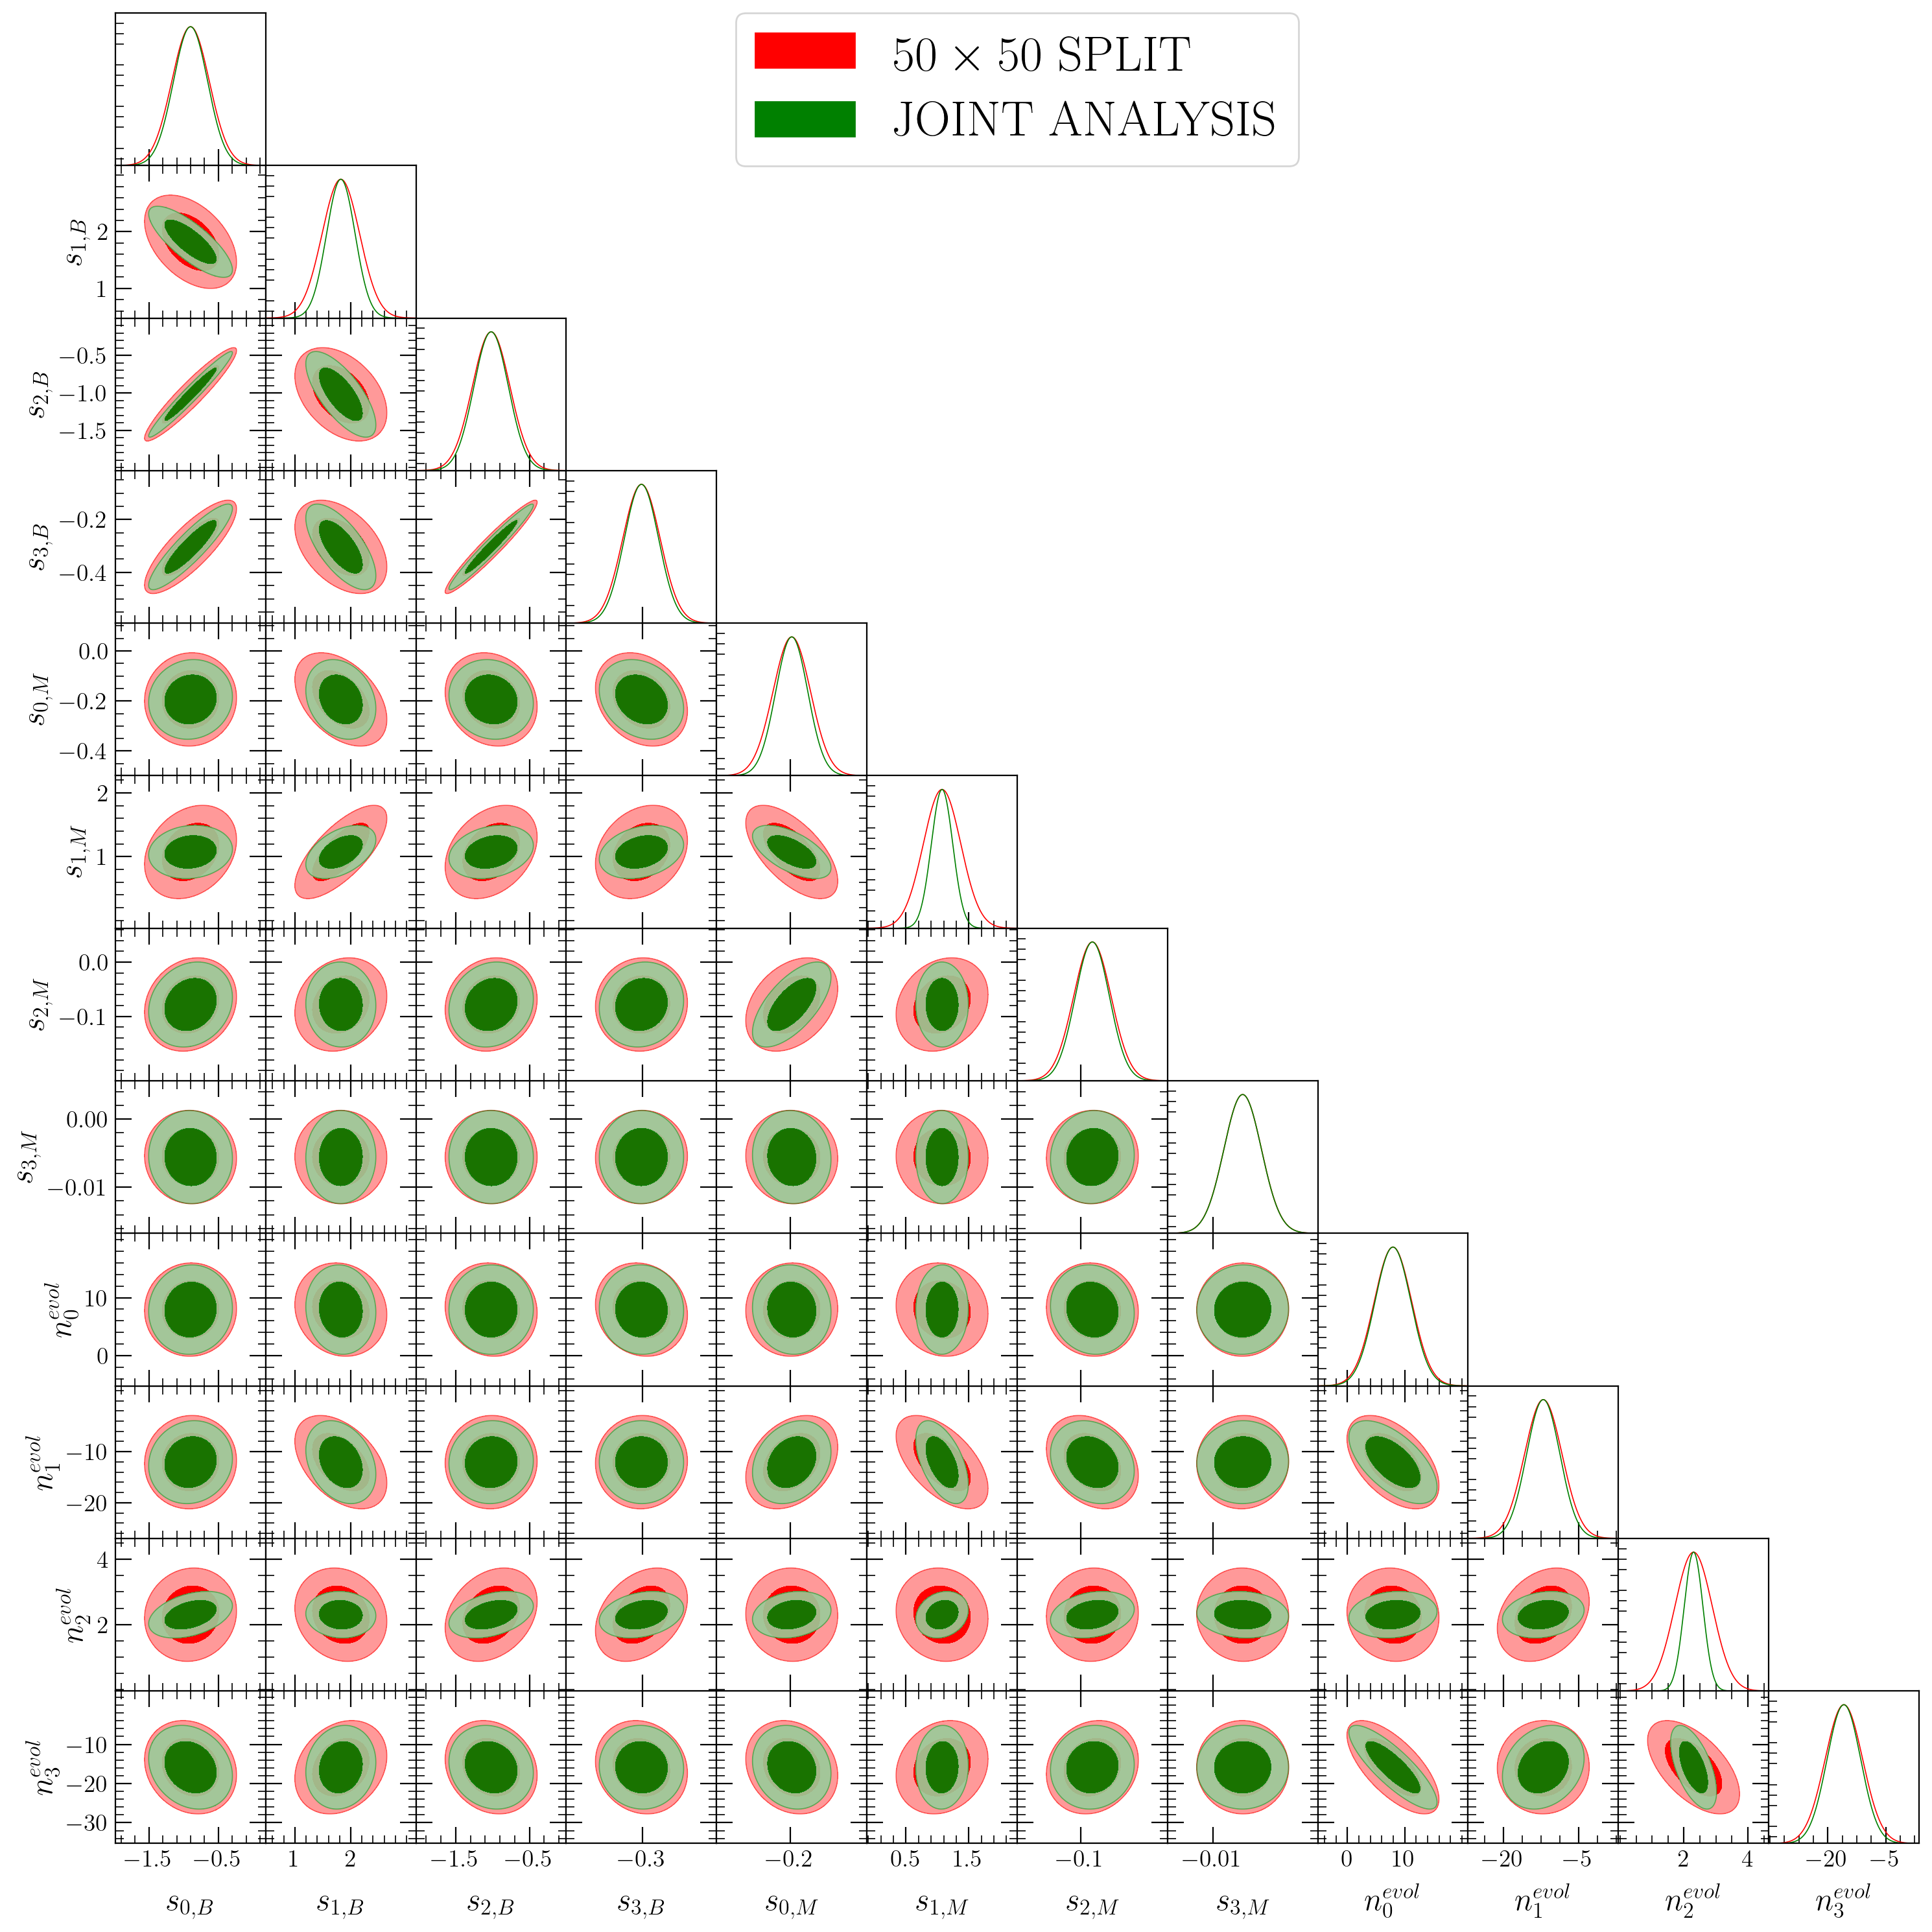

In [53]:
# Triangle plot

mean_joint = params_fid_
mean_50 = params_fid_50[:-9]

sB_names = ['s'+str(int(i))+'B' for i in np.arange(len(sB_4fit50))]
sM_names = ['s'+str(int(i))+'M' for i in np.arange(len(sM_4fit))]

sB_labels=[r's_{'+str(i)+r',B}' for i in np.arange(len(sB_4fit50))]
sM_labels=[r's_{'+str(i)+r',M}' for i in np.arange(len(sM_4fit))]

num_names = ['n'+str(int(i)) for i in np.arange(len(num_fit))]

num_labels=[r'n_{'+str(i)+r'}^{evol}' for i in np.arange(len(num_fit))]

param_names = sB_names + sM_names + num_names 
labels = sB_labels + sM_labels + num_labels 

GaussDist_joint_sbias_nevol_fit_ = GaussianND(mean_joint, Sigma_Matrix_Joint50x10_[:-13,:-13], labels = labels, names = param_names)
GaussDist_50_sbias_nevol_fit = GaussianND(mean_50, Sigma_Matrix_50[:-9,:-9], labels = labels, names = param_names)

g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_50_sbias_nevol_fit, GaussDist_joint_sbias_nevol_fit_], param_names, 
                filled=True, 
                legend_labels=[r'$50\times 50$ SPLIT', r'JOINT ANALYSIS'],
                contour_colors=['red', 'green'])

#plt.savefig('plots/triplot_joint_vs_50x50.pdf', dpi='figure', format='pdf')

In [54]:
np.shape(params_fid), np.shape(params_fid_10)

((29,), (21,))

In [55]:
# Delete rows and columns alien to the 10x90 split

nind = list(range(0,4))

Sigma_Matrix_Joint50x10_ = Sigma_Matrix_Joint50x10

Sigma_Matrix_Joint50x10_ = np.delete(arr=Sigma_Matrix_Joint50x10_, obj=nind, axis=0)
Sigma_Matrix_Joint50x10_ = np.delete(arr=Sigma_Matrix_Joint50x10_, obj=nind, axis=1)

np.shape(Sigma_Matrix_Joint50x10_)

(25, 25)

In [56]:
# Delete elements of params_fid

params_fid_ = params_fid[:-13]

params_fid_ = np.delete(arr=params_fid_, obj=nind, axis=0)

np.shape(params_fid_)

(12,)

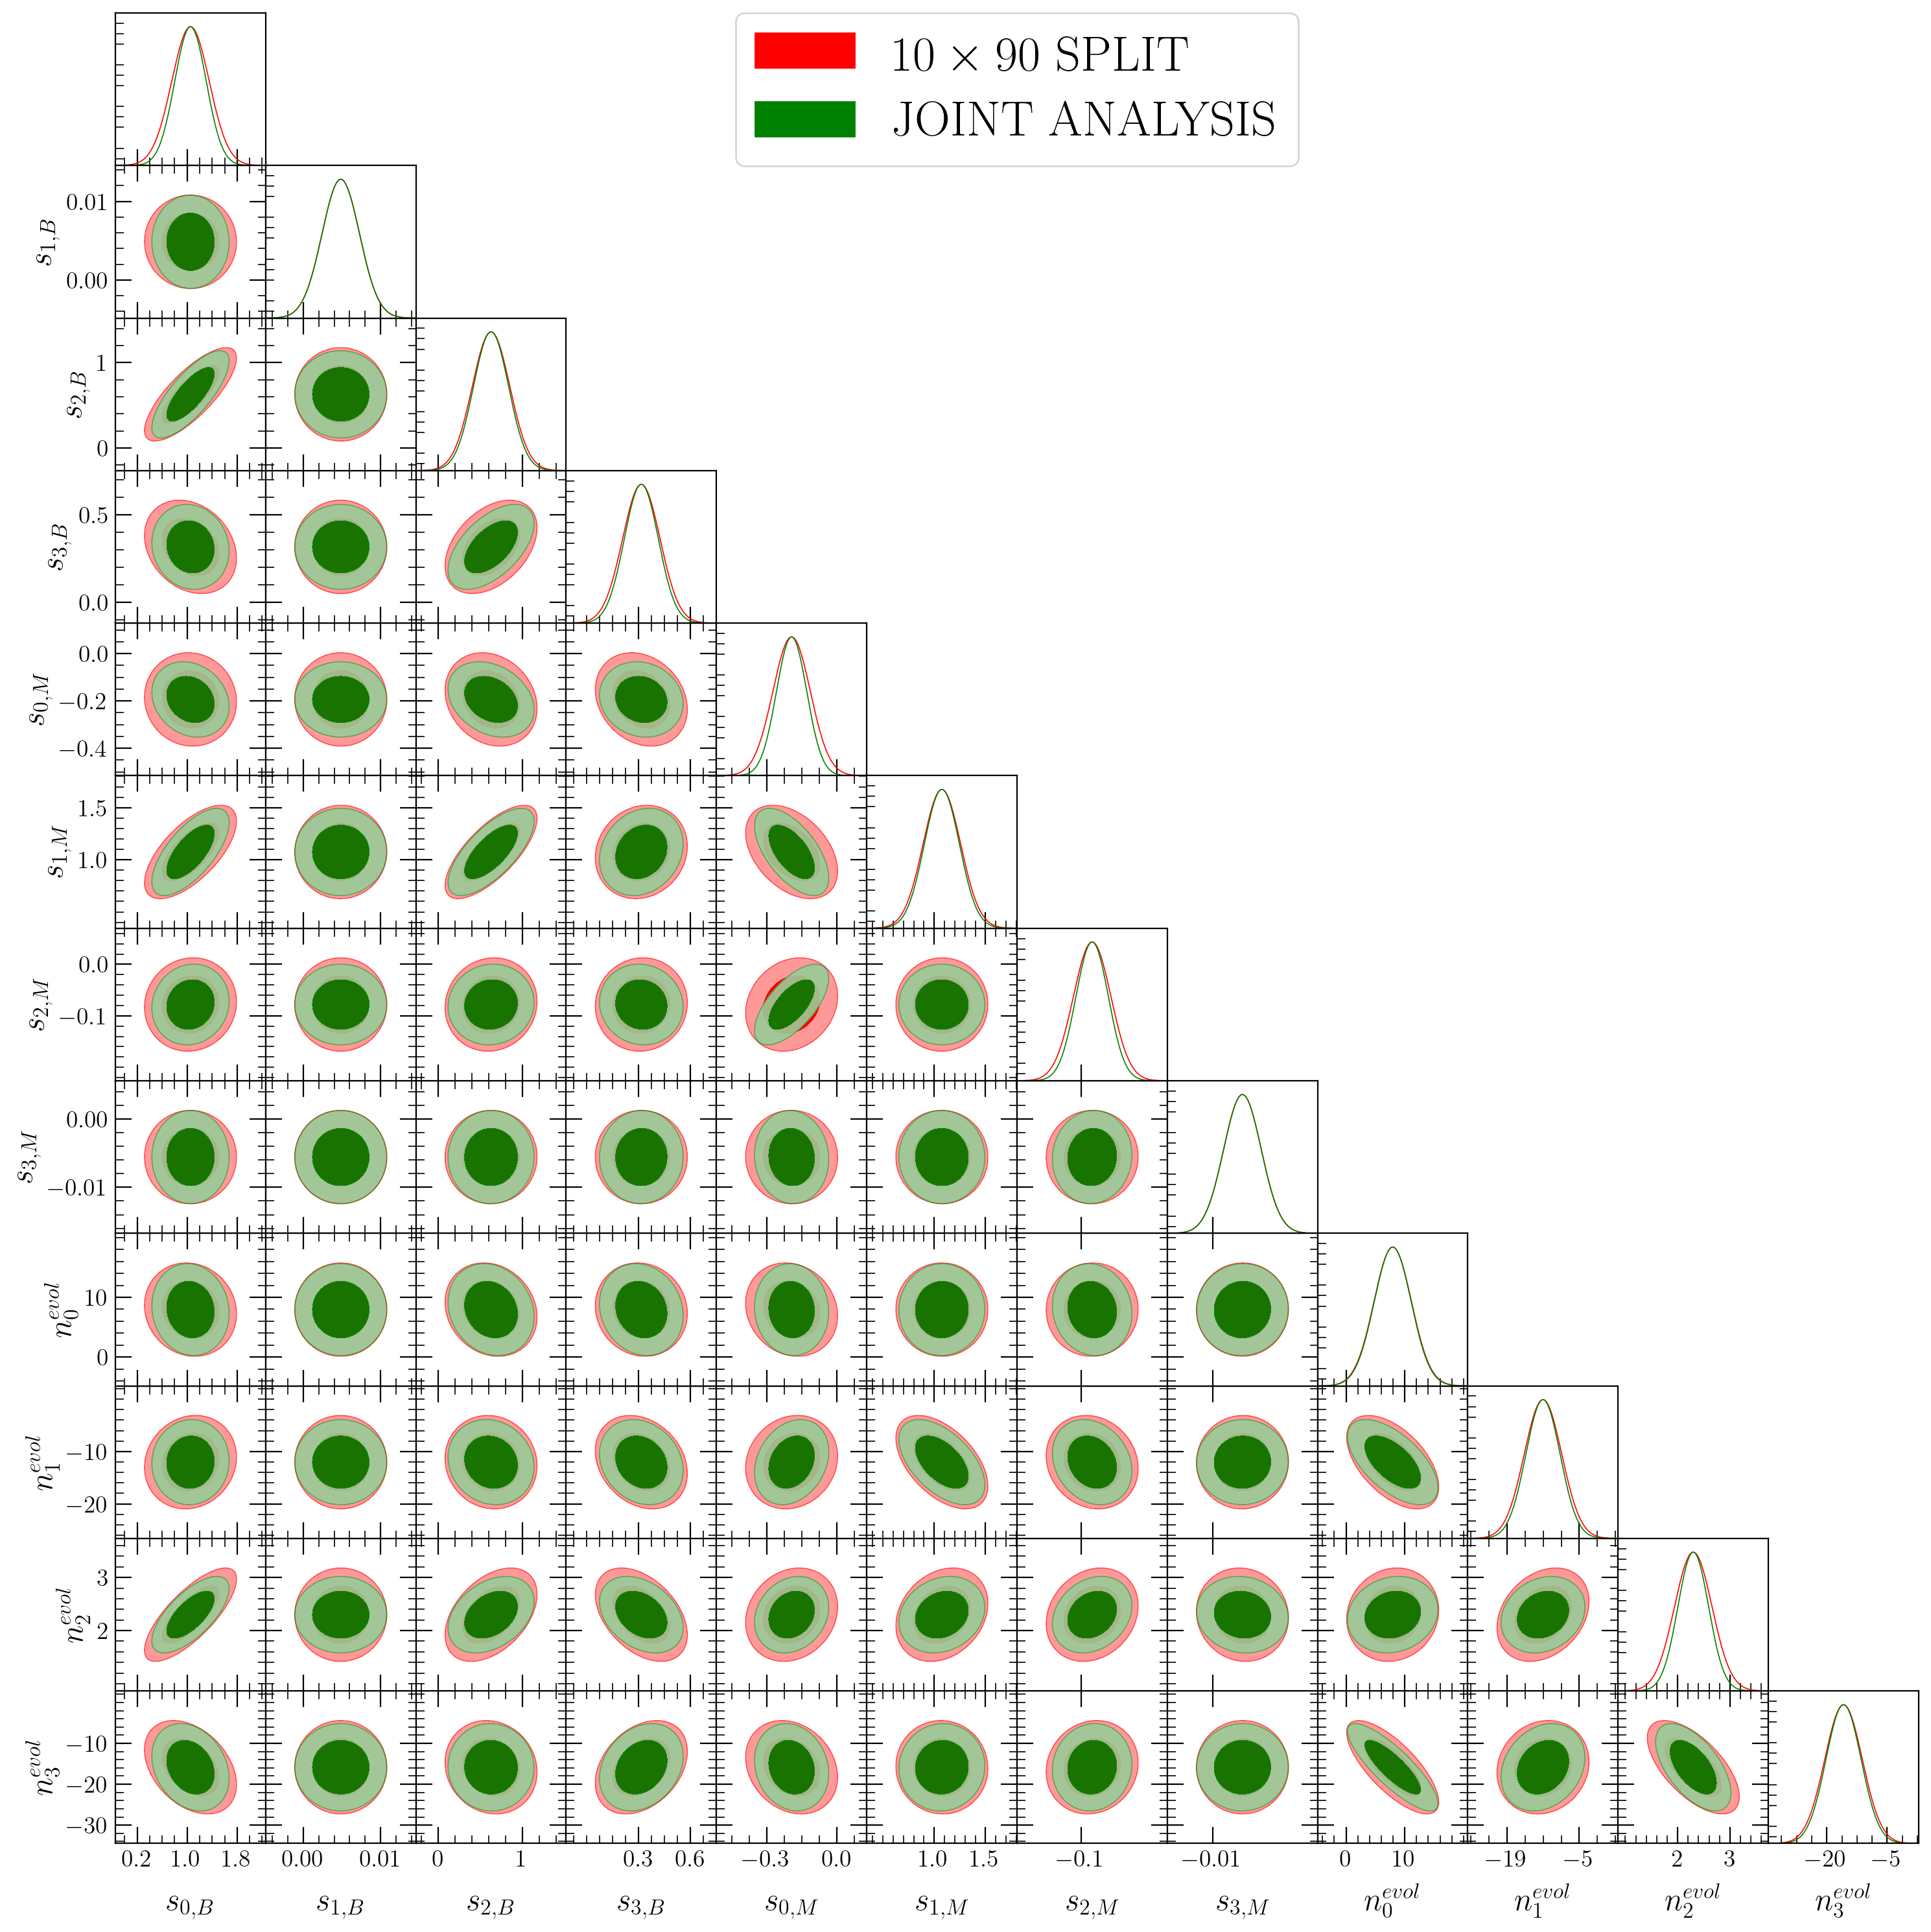

In [57]:
# Triangle plot

mean_joint = params_fid_
mean_10 = params_fid_10[:-9]

sB_names = ['s'+str(int(i))+'B' for i in np.arange(len(sB_4fit50))]
sM_names = ['s'+str(int(i))+'M' for i in np.arange(len(sM_4fit))]

sB_labels=[r's_{'+str(i)+r',B}' for i in np.arange(len(sB_4fit50))]
sM_labels=[r's_{'+str(i)+r',M}' for i in np.arange(len(sM_4fit))]

num_names = ['n'+str(int(i)) for i in np.arange(len(num_fit))]

num_labels=[r'n_{'+str(i)+r'}^{evol}' for i in np.arange(len(num_fit))]

param_names = sB_names + sM_names + num_names 
labels = sB_labels + sM_labels + num_labels 

GaussDist_joint_sbias_nevol_fit_ = GaussianND(mean_joint, Sigma_Matrix_Joint50x10_[:-13,:-13], labels = labels, names = param_names)
GaussDist_30_sbias_nevol_fit = GaussianND(mean_10, Sigma_Matrix_10[:-9,:-9], labels = labels, names = param_names)

g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_30_sbias_nevol_fit, GaussDist_joint_sbias_nevol_fit_], param_names, 
                filled=True, 
                legend_labels=[r'$10\times 90$ SPLIT', r'JOINT ANALYSIS'],
                contour_colors=['red', 'green'])

#plt.savefig('plots/triplot_joint_vs_10x90.pdf', dpi='figure', format='pdf')

In [58]:
# Delete rows and columns alien to the 50x50 split

nind = list(range(0,16)) + list(range(20,24))

Sigma_Matrix_Joint50x10_ = Sigma_Matrix_Joint50x10

Sigma_Matrix_Joint50x10_ = np.delete(arr=Sigma_Matrix_Joint50x10_, obj=nind, axis=0)
Sigma_Matrix_Joint50x10_ = np.delete(arr=Sigma_Matrix_Joint50x10_, obj=nind, axis=1)

np.shape(Sigma_Matrix_Joint50x10_)

(9, 9)

In [59]:
# Delete elements of params_fid

params_fid_ = params_fid

params_fid_ = np.delete(arr=params_fid_, obj=nind, axis=0)

np.shape(params_fid_)

(9,)

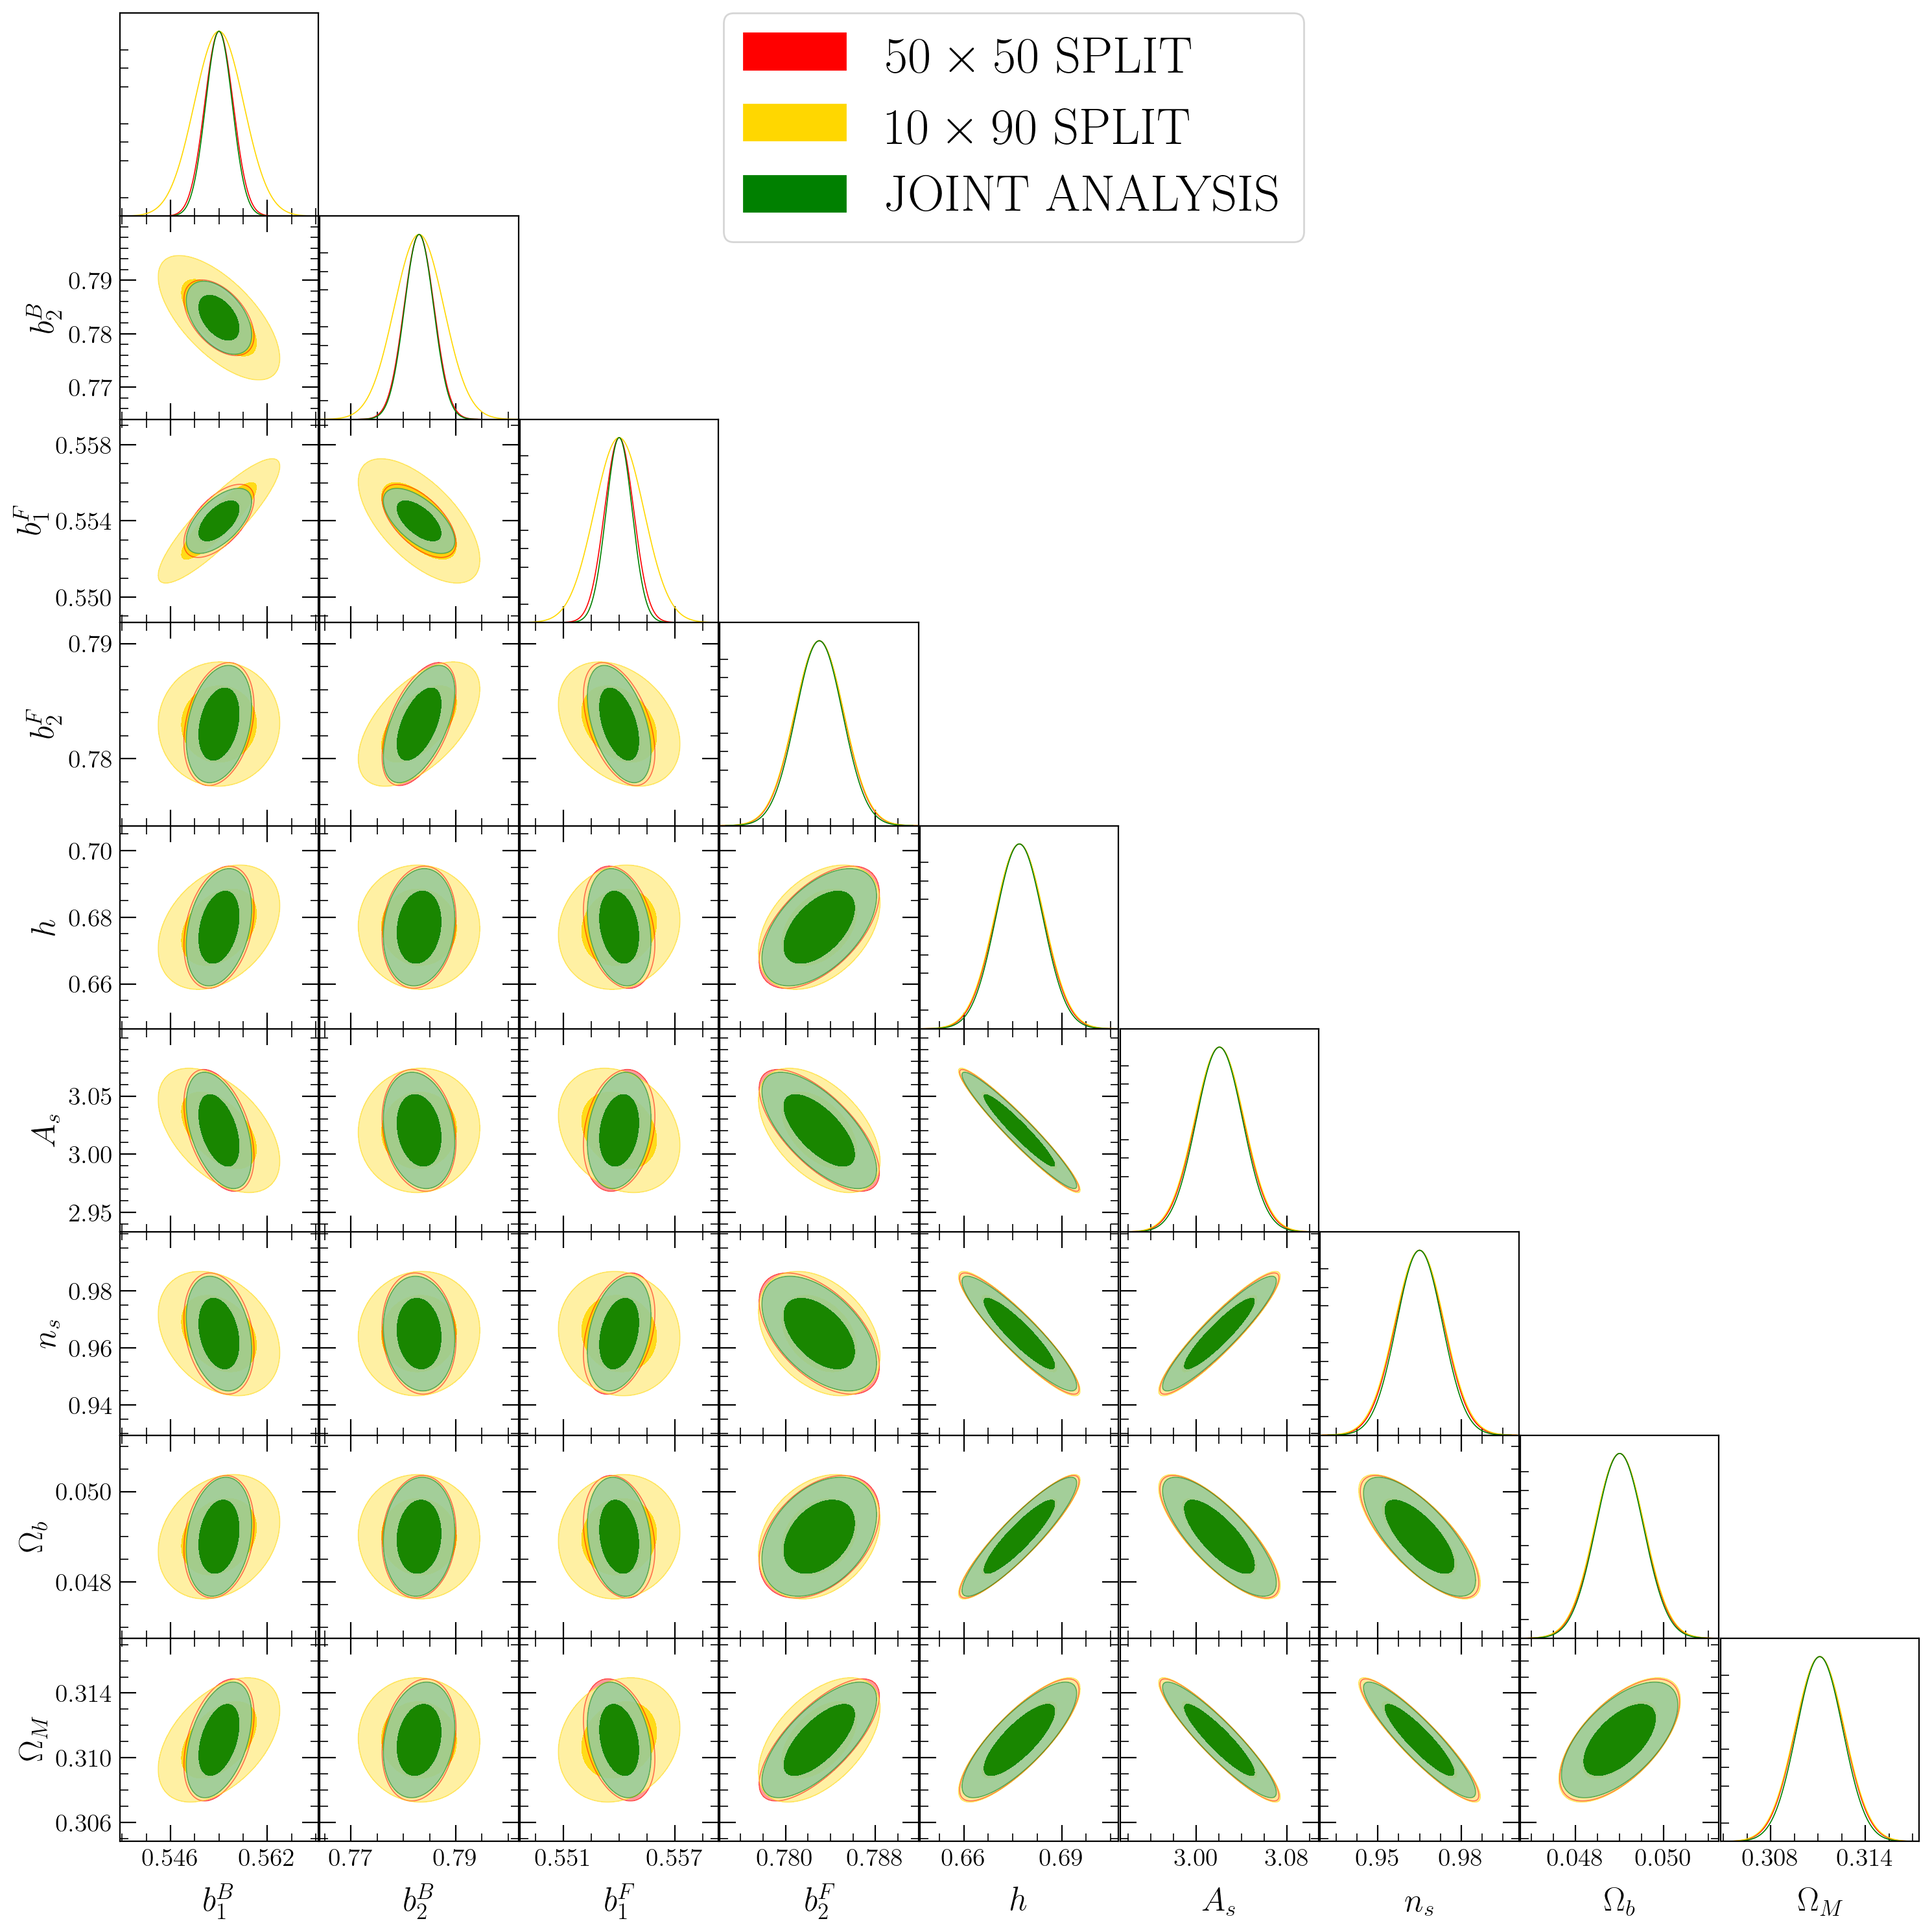

In [60]:
# Triangle plot: GALAXY BIAS AND COSMIC PARAMETERS

mean_50 = params_fid_

gbias_names = ['b1B_m1', 'b2B_m1', 'b1F_m1', 'b2F_m1']
cosmic_names = ['h', 'As', 'ns', 'Ob', 'OM']

gbias_labels = [r'b_1^{B}', r'b_2^{B}', r'b_1^{F}', r'b_2^{F}']
cosmic_labels = [r'h', r'A_s', r'n_s', r'\Omega_b', r'\Omega_M']

param_names = gbias_names + cosmic_names
labels = gbias_labels + cosmic_labels

GaussDist_gbias_cosmic_fit = GaussianND(mean_50, Sigma_Matrix_Joint50x10_, labels = labels, names = param_names)
GaussDist_gbias_cosmic_fit_50 = GaussianND(mean_50, Sigma_Matrix_50[12:, 12:], labels = labels, names = param_names)
GaussDist_gbias_cosmic_fit_30 = GaussianND(mean_50, Sigma_Matrix_10[12:, 12:], labels = labels, names = param_names)


g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_gbias_cosmic_fit_50, GaussDist_gbias_cosmic_fit_30, GaussDist_gbias_cosmic_fit], param_names, 
                filled=True, 
                legend_labels=[r'$50\times 50$ SPLIT', r'$10\times 90$ SPLIT', r'JOINT ANALYSIS'],
                contour_colors=['red', 'gold', 'green'])

# Predictions from the JOINT ANALYSIS

## Magnification bias

In [61]:
# Magnification bias fit

def magbias_fit(params, x):
    a, b, c, d = params
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

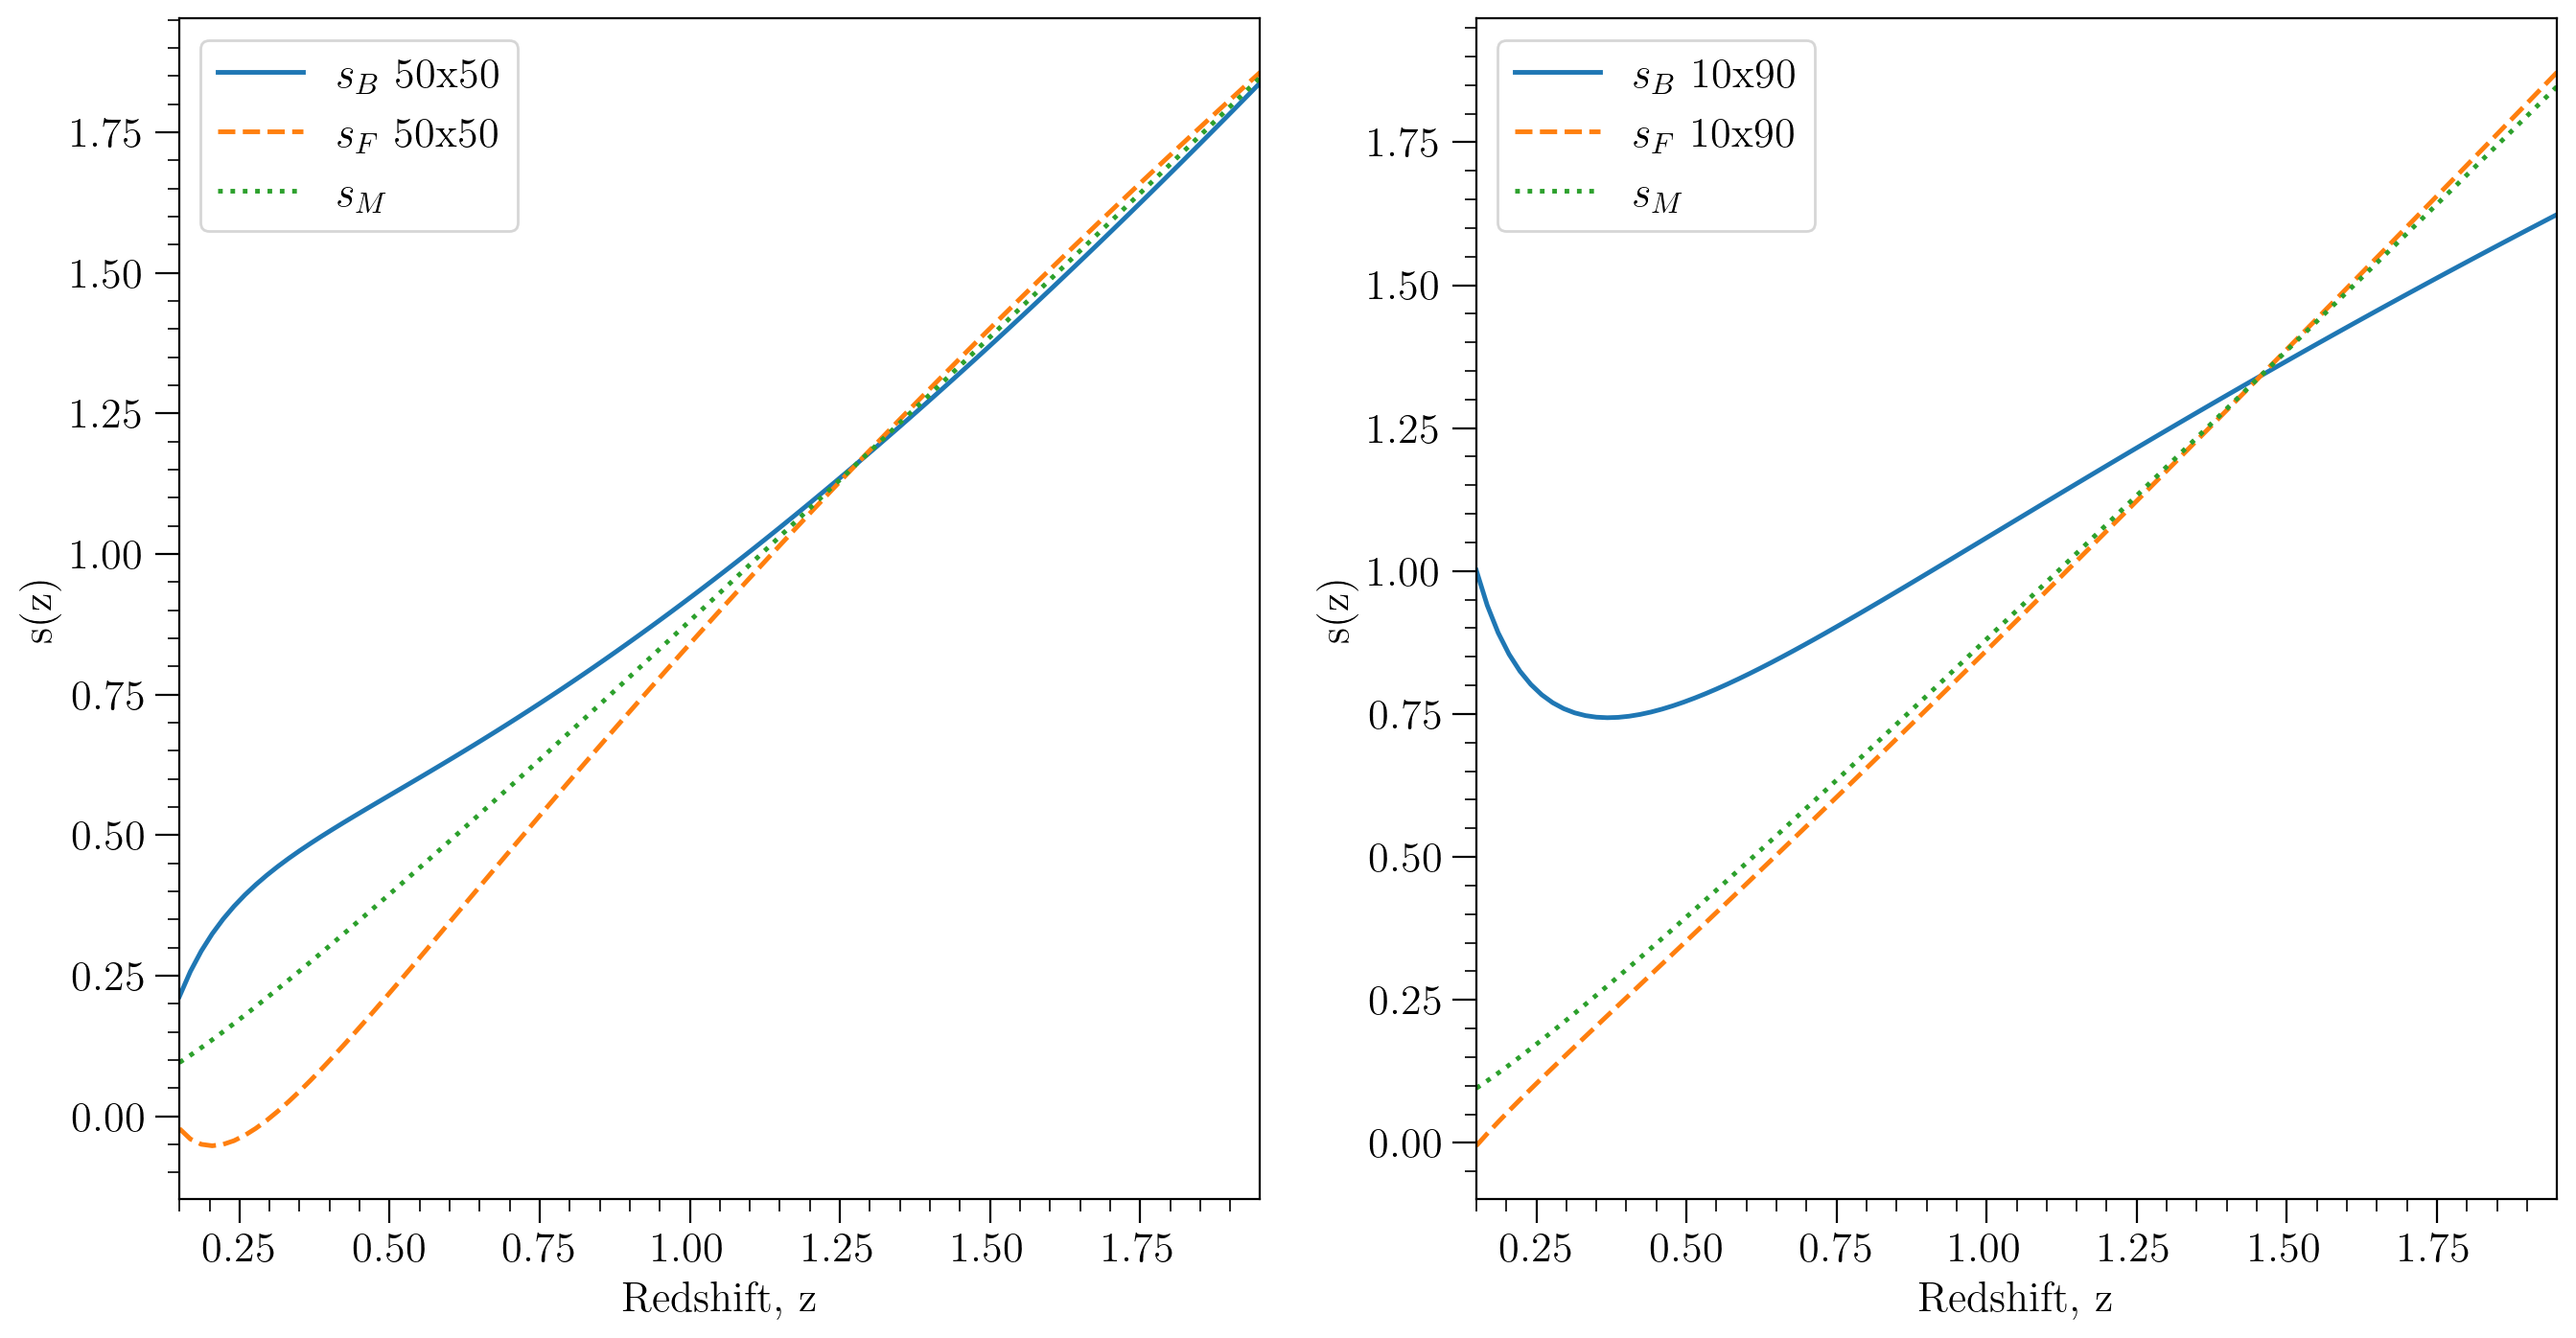

In [62]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

m_50 = 2.
m_10 = 10.

sB_fid_50 = magbias_fit(sB_fit[:4], z_lin)
sB_fid_10 = magbias_fit(sB_fit[4:], z_lin)
sM_fid = magbias_fit(sM_4fit, z_lin)
sF_fid_50 = sM_fid * (m_50/(m_50-1)) - sB_fid_50/(m_50-1)
sF_fid_10 = sM_fid * (m_10/(m_10-1)) - sB_fid_10/(m_10-1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, sB_fid_50, '-', label=r'$s_B$ 50x50')
ax[0].plot(z_lin, sF_fid_50, '--', label=r'$s_F$ 50x50')
ax[0].plot(z_lin, sM_fid, ':', label=r'$s_M$')

ax[1].plot(z_lin, sB_fid_10, '-', label=r'$s_B$ 10x90')
ax[1].plot(z_lin, sF_fid_10, '--', label=r'$s_F$ 10x90')
ax[1].plot(z_lin, sM_fid, ':', label=r'$s_M$')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r's(z)')
    axi.legend();


### Observables: $s_B(z)$ and $s_M(z)$

In [63]:
# Compute priors 

# Select the marginalized covariance matrix for the magnification biases priors

cov_sB_50_priors = Cov_prior_all[:4, :4]
cov_sB_10_priors = Cov_prior_all[4:8, 4:8]
cov_sM_priors = Cov_prior_all[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sB_50_pars_samples_priors = np.random.multivariate_normal(sB_4fit50, cov_sB_50_priors, num_samples)
sB_10_pars_samples_priors = np.random.multivariate_normal(sB_4fit10, cov_sB_10_priors, num_samples)
sM_pars_samples_priors = np.random.multivariate_normal(sM_4fit, cov_sM_priors, num_samples)

# Evaluate fitting function for each parameter sample

sB_50_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples_priors])
sB_10_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_10_pars_samples_priors])

sM_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_pars_samples_priors])

# Calculate the 68% confidence interval

sB_50_lower_bound_priors = np.percentile(sB_50_samples_priors, 16, axis=0)
sB_50_upper_bound_priors = np.percentile(sB_50_samples_priors, 84, axis=0)

sB_10_lower_bound_priors = np.percentile(sB_10_samples_priors, 16, axis=0)
sB_10_upper_bound_priors = np.percentile(sB_10_samples_priors, 84, axis=0)

sM_lower_bound_priors = np.percentile(sM_samples_priors, 16, axis=0)
sM_upper_bound_priors = np.percentile(sM_samples_priors, 84, axis=0)


###### Compare the two observables

In [64]:
Sigma_Matrix_Joint50x10[:4, :4]

array([[ 0.06065938, -0.04976706,  0.05595997,  0.01460857],
       [-0.04976706,  0.06576111, -0.04278116, -0.01142796],
       [ 0.05595997, -0.04278116,  0.05474059,  0.01506352],
       [ 0.01460857, -0.01142796,  0.01506352,  0.0043889 ]])

In [65]:
# Select the marginalized covariance matrix for the magnification biases

cov_sB_Joint_50 = Sigma_Matrix_Joint50x10[:4, :4]
cov_sB_Joint_10 = Sigma_Matrix_Joint50x10[4:8, 4:8]
cov_sM_Joint = Sigma_Matrix_Joint50x10[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sB_Joint_50_pars_samples = np.random.multivariate_normal(sB_4fit50, cov_sB_Joint_50, num_samples)
sB_Joint_10_pars_samples = np.random.multivariate_normal(sB_4fit10, cov_sB_Joint_10, num_samples)
sM_Joint_pars_samples = np.random.multivariate_normal(sM_4fit, cov_sM_Joint, num_samples)

# Evaluate fitting function for each parameter sample
sB_Joint_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_Joint_50_pars_samples])
sB_Joint_10_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_Joint_10_pars_samples])
sM_Joint_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_Joint_pars_samples])

# Calculate the 68% confidence interval
sB_Joint_50_lower_bound = np.percentile(sB_Joint_50_samples, 16, axis=0)
sB_Joint_50_upper_bound = np.percentile(sB_Joint_50_samples, 84, axis=0)

sB_Joint_10_lower_bound = np.percentile(sB_Joint_10_samples, 16, axis=0)
sB_Joint_10_upper_bound = np.percentile(sB_Joint_10_samples, 84, axis=0)

sM_Joint_lower_bound = np.percentile(sM_Joint_samples, 16, axis=0)
sM_Joint_upper_bound = np.percentile(sM_Joint_samples, 84, axis=0)

Predictions for $s_B(z)$ vs Priors

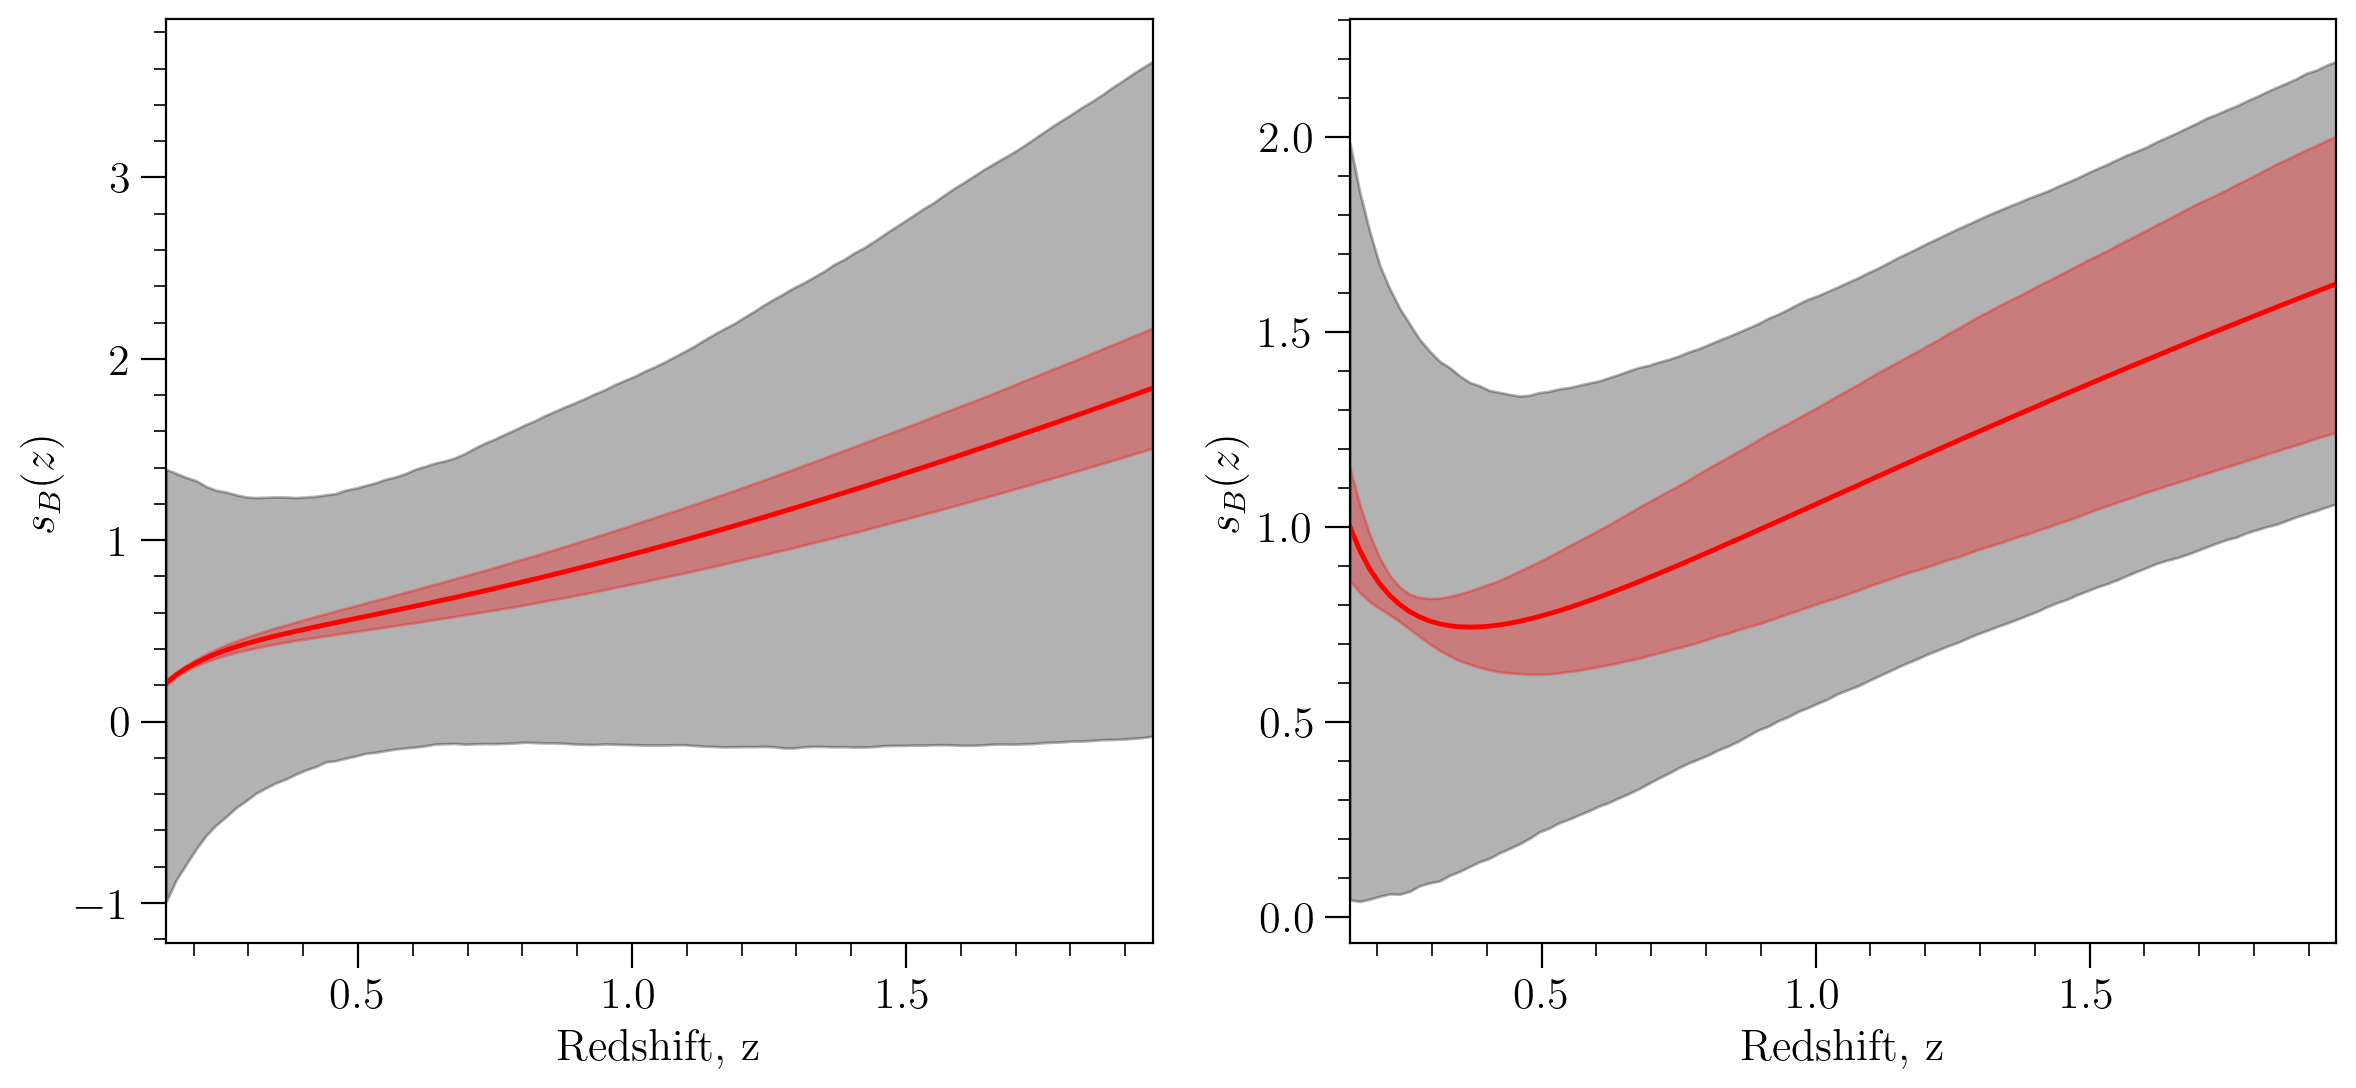

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sB_fid_50, 'r-')
ax[0].fill_between(z_lin, sB_50_lower_bound_priors, sB_50_upper_bound_priors, color='black', alpha=0.3)
ax[0].fill_between(z_lin, sB_Joint_50_lower_bound, sB_Joint_50_upper_bound, color='red', alpha=0.3)

ax[1].plot(z_lin, sB_fid_10, 'r-')
ax[1].fill_between(z_lin, sB_10_lower_bound_priors, sB_10_upper_bound_priors, color='black', alpha=0.3)
ax[1].fill_between(z_lin, sB_Joint_10_lower_bound, sB_Joint_10_upper_bound, color='red', alpha=0.3)

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r'$s_B(z)$')

Predictions for $s_M(z)$ vs Priors

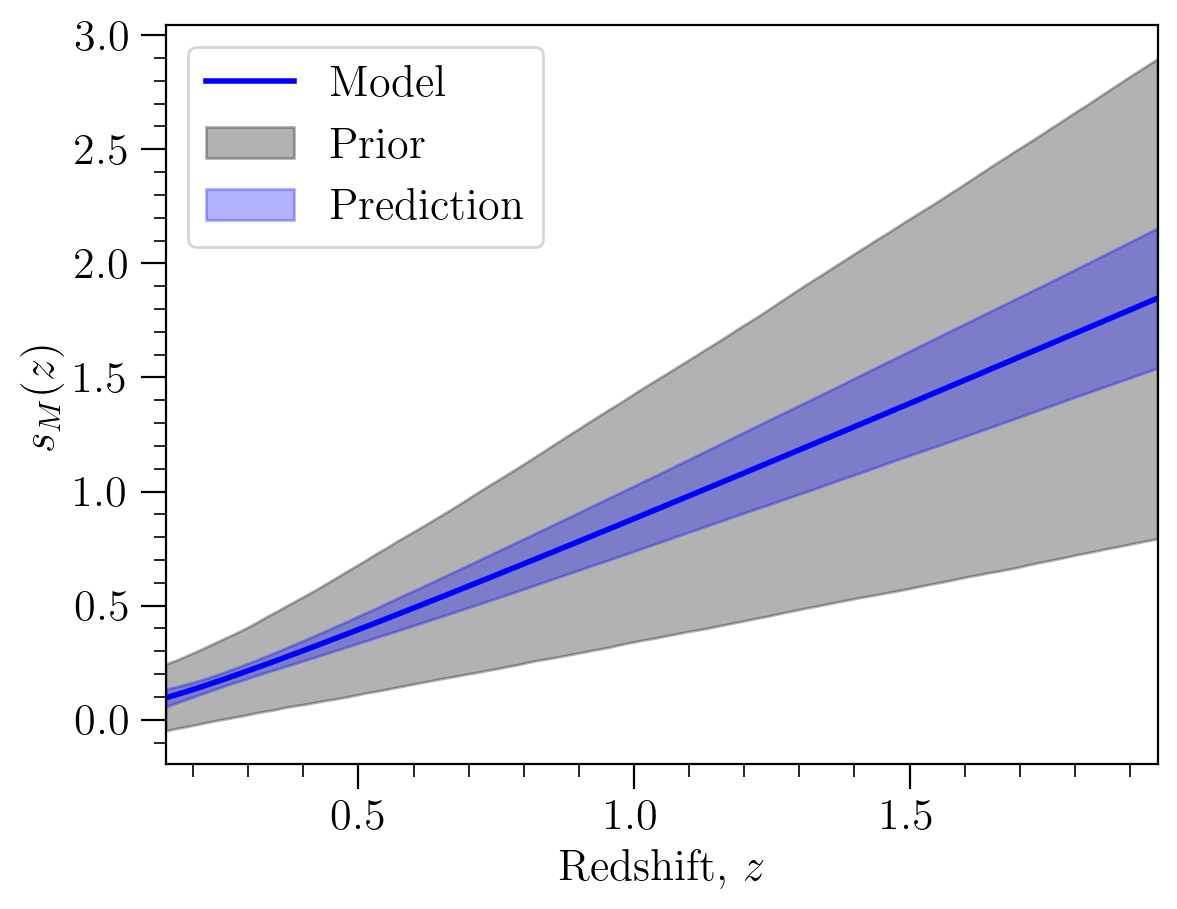

In [67]:
plt.plot(z_lin, sM_fid, '-', lw = 2.0, color='blue', label = 'Model')

# Shade the 68% confidence interval

plt.fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
plt.fill_between(z_lin, sM_Joint_lower_bound, sM_Joint_upper_bound, color='blue', alpha=0.3, label = r'Prediction')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$s_M(z)$');
plt.legend(loc='upper left');

### Magnification bias of the Faint, $s_F(z)$

The magnification bias of the faint population is obtained by:

$$ s_F(z) = s_{model}(z)\frac{\bar{N}(z)}{\bar{N}_F(z)} - s_B(z)\frac{\bar{N}_B(z)}{\bar{N}_F(z)} = s_F(z) = s_{model}(z)\frac{m}{m-1} - s_B(z)\frac{1}{m-1} $$ 

We need to sample together the $s_B$ and $s_m$ parameters.

In [68]:
sbias_fid = np.concatenate([sB_4fit50, sB_4fit10, sM_4fit])

np.shape(sbias_fid)

(12,)

In [69]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias = Sigma_Matrix_Joint50x10[:12, :12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sbias_Joint_pars_samples = np.random.multivariate_normal(sbias_fid, cov_sbias, num_samples)

# Evaluate fitting function for each parameter sample
sB_Joint_50_samples_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_Joint_pars_samples])
sB_Joint_10_samples_ = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_Joint_pars_samples])
sM_Joint_samples_ = np.array([magbias_fit(pars[8:12], z_lin) for pars in sbias_Joint_pars_samples])

# Compute the sF for each sample
sF_50_samples_ = sM_Joint_samples_*m_50/(m_50-1) - sB_Joint_50_samples_/(m_50-1)
sF_10_samples_ = sM_Joint_samples_*m_10/(m_10-1) - sB_Joint_10_samples_/(m_10-1)


# Calculate the 68% confidence interval
sF_50_Joint_lower_bound_ = np.percentile(sF_50_samples_, 16, axis=0)
sF_50_Joint_upper_bound_ = np.percentile(sF_50_samples_, 84, axis=0)

sF_10_Joint_lower_bound_ = np.percentile(sF_10_samples_, 16, axis=0)
sF_10_Joint_upper_bound_ = np.percentile(sF_10_samples_, 84, axis=0)

Compare with priors

In [70]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias_priors_ = Cov_prior_all[:12, :12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sbias_pars_samples_priors_ = np.random.multivariate_normal(sbias_fid, cov_sbias_priors_, num_samples)

# Evaluate fitting function for each parameter sample
sB_50_samples_priors_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_pars_samples_priors_])
sB_10_samples_priors_ = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_pars_samples_priors_])
sM_samples_priors_ = np.array([magbias_fit(pars[8:12], z_lin) for pars in sbias_pars_samples_priors_])

# Compute the sF for each sample
sF_50_samples_priors_ = sM_samples_priors_*m_50/(m_50-1) - sB_50_samples_priors_/(m_50-1)
sF_10_samples_priors_ = sM_samples_priors_*m_10/(m_10-1) - sB_10_samples_priors_/(m_10-1)

# Calculate the 68% confidence interval
sF_50_lower_bound_priors_ = np.percentile(sF_50_samples_priors_, 16, axis=0)
sF_50_upper_bound_priors_ = np.percentile(sF_50_samples_priors_, 84, axis=0)

sF_10_lower_bound_priors_ = np.percentile(sF_10_samples_priors_, 16, axis=0)
sF_10_upper_bound_priors_ = np.percentile(sF_10_samples_priors_, 84, axis=0)

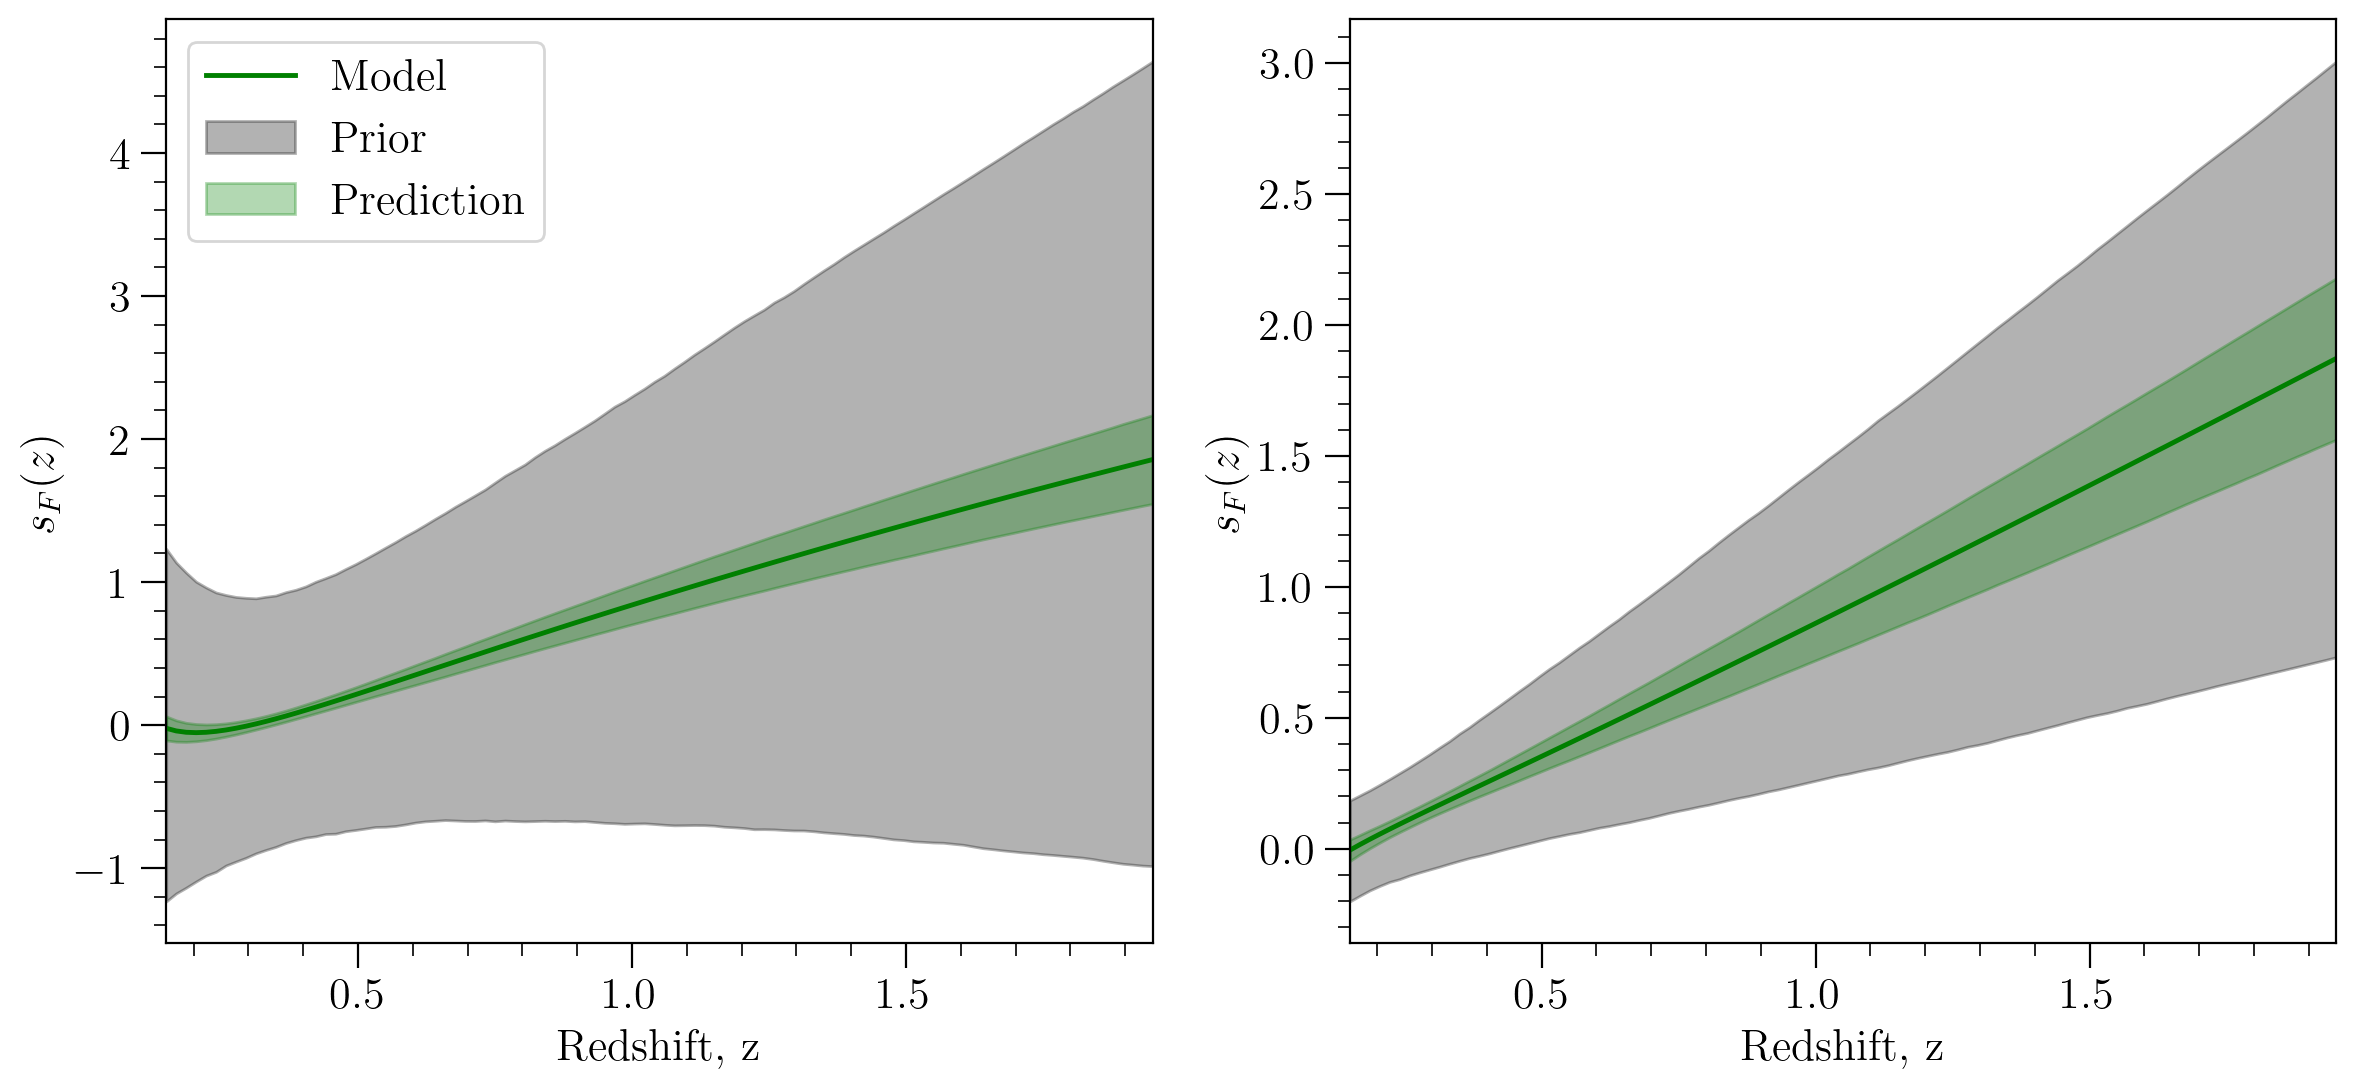

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sF_fid_50, '-', color = 'green', label = 'Model')
ax[0].fill_between(z_lin, sF_50_lower_bound_priors_, sF_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sF_50_Joint_lower_bound_, sF_50_Joint_upper_bound_, color='green', alpha=0.3, label = 'Prediction')

ax[1].plot(z_lin, sF_fid_10, '-', color = 'green')
ax[1].fill_between(z_lin, sF_10_lower_bound_priors_, sF_10_upper_bound_priors_, color='black', alpha=0.3)
ax[1].fill_between(z_lin, sF_10_Joint_lower_bound_, sF_10_Joint_upper_bound_, color='green', alpha=0.3)

ax[0].legend(loc='upper left')

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r'$s_F(z)$')

## Number evolution

In [72]:
def nevol_fit(params, x):
    a, b, c, d = params
    return a + b * x + c * (1/x) + d * np.exp(-x)

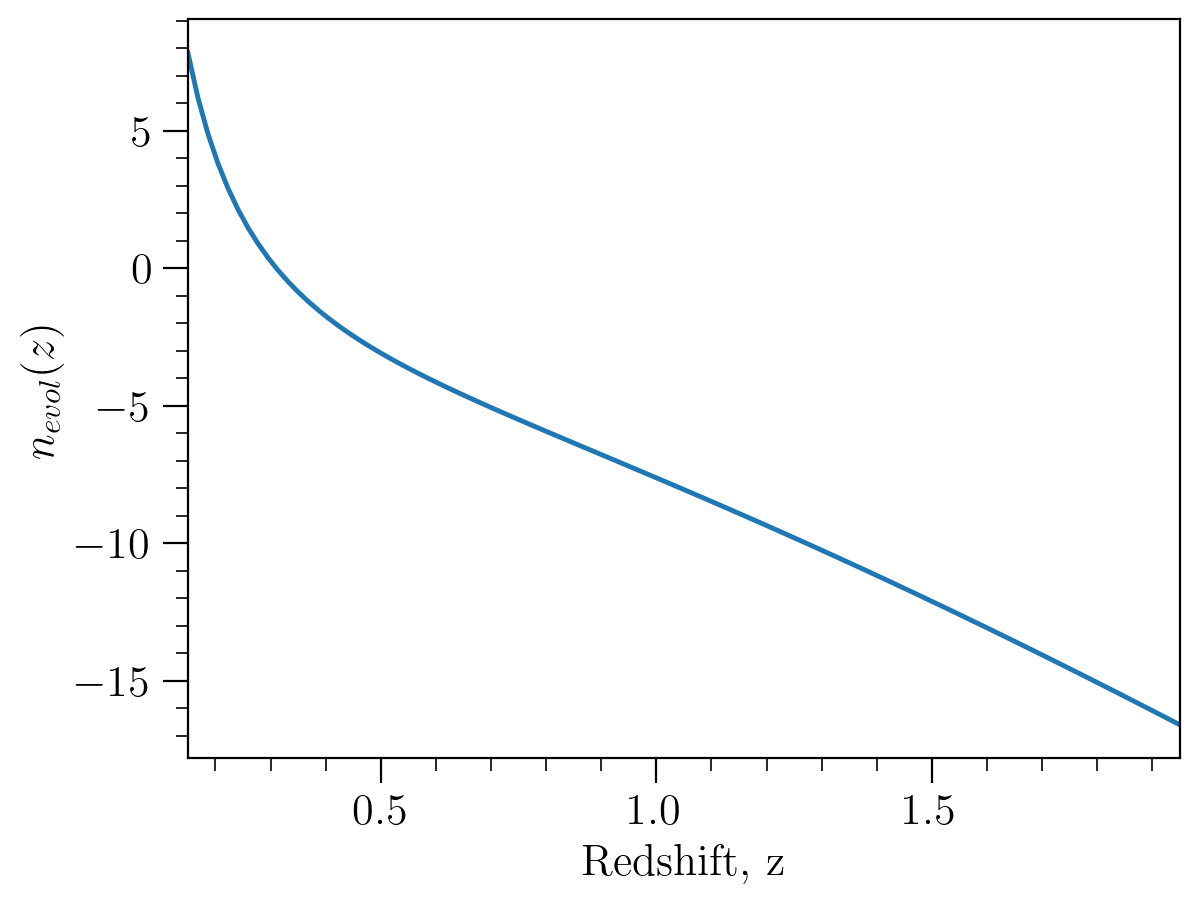

In [73]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)
m_split = 2.

num_evol_fid = nevol_fit(num_fit, z_lin)

plt.plot(z_lin, num_evol_fid, '-')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, z');
plt.ylabel(r'$n_{evol}(z)$');
#plt.title('Fitting model for the number desnsitiy evolution');

In [74]:
# Select the marginalized covariance matrix for the number evolution
cov_Joint_numevol = Sigma_Matrix_Joint50x10[12:16, 12:16]
cov_numevol_priors = Cov_prior_all[12:16, 12:16]


# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

nevol_Joint_pars_samples = np.random.multivariate_normal(num_fit, cov_Joint_numevol, num_samples)
nevol_samples_priors = np.random.multivariate_normal(num_fit, cov_numevol_priors, num_samples)


# Evaluate fitting function for each parameter sample
nevol_Joint_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_Joint_pars_samples])
nevol_samples_priors = np.array([nevol_fit(pars, z_lin) for pars in nevol_samples_priors])

# Calculate the 68% confidence interval
nevol_Joint_lower_bound = np.percentile(nevol_Joint_samples, 16, axis=0)
nevol_Joint_upper_bound = np.percentile(nevol_Joint_samples, 84, axis=0)
nevol_lower_bound_priors = np.percentile(nevol_samples_priors, 16, axis=0)
nevol_upper_bound_priors = np.percentile(nevol_samples_priors, 84, axis=0)

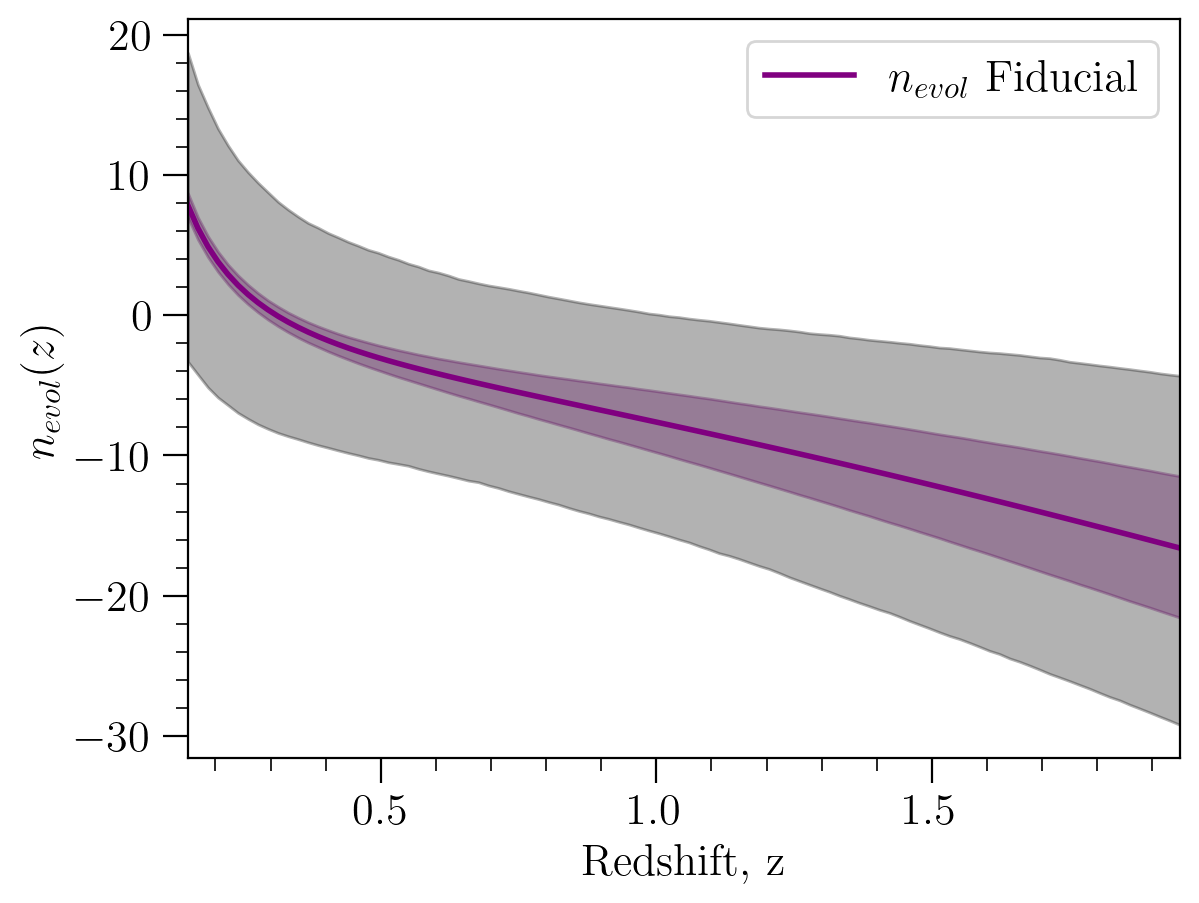

In [75]:
plt.plot(z_lin, num_evol_fid, '-', color='purple', label=r'$n_{evol}$'+' Fiducial', lw = 2.0)

# Shade the 68% confidence interval

plt.fill_between(z_lin, nevol_Joint_lower_bound, nevol_Joint_upper_bound, color='purple', alpha=0.3)
plt.fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3)


plt.xlim(0.15,1.95)

plt.xlabel(r'Redshift, z')
plt.ylabel(r'$n_{evol}(z)$')
plt.legend();

## Evolution bias

The evolution bias is computed from the magnification biases and the evolution of the number densities.

$$ f^{evol}_{B}(z) = -\frac{d\log{N_B(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_B(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) - \frac{5}{2}s_B(z)\,\frac{d\log{F_c}}{d\log{(1+z)}} $$

$$ f^{evol}_{F}(z) = -\frac{d\log{N_F(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_F(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) 
    - \frac{5}{2}\left[\frac{\bar{N}}{\bar{N}_F}\,s_{model}(z)\frac{d\log{F_*}}{d\log{(1+z)}}-\frac{\bar{N}_B}{\bar{N}_F}\,s_B(z)\frac{d\log{F_c}}{d\log{(1+z)}}\right] $$

We have all the ingredients defined as methods in the EvolutionBias class. We need to extract the relevant terms and then sample togeter the $n_{evol}$ and magnification bias parameters to construct the predictions for each evolution bias. 

In [76]:
from biasmodels import EvolutionBias

In [77]:
myEvolBias_50 = EvolutionBias(n_split=m_50)
myEvolBias_10 = EvolutionBias(n_split=m_10)


dlogH = myEvolBias_50.dlogH
rHterm = myEvolBias_50.rHterm
dFstar = myEvolBias_50.dLogFstar
dFcut = myEvolBias_50.dLogFcut

In [78]:
def fevol_bright(pars_s, pars_n, z):
    pars_sB = pars_s[:4] 
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*magbias_fit(params=pars_sB, x=z))*rHterm(z) - 5*magbias_fit(params=pars_sB, x=z) - 5/2*magbias_fit(params=pars_sB, x=z)*dFcut(z)
    
def fevol_faint(pars_s, pars_n, z):
    
    pars_sB = pars_s[:4]
    pars_sM = pars_s[4:]
    s_B = magbias_fit(params=pars_sB, x=z)
    s_M = magbias_fit(params=pars_sM, x=z)
    s_faint = s_M*m_split/(m_split-1) - s_B/(m_split-1)
    
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*s_faint)*rHterm(z) - 5*s_faint + 5/2*((1/(m_split-1)) * s_B *dFcut(z) - (m_split/(m_split-1)) * s_M *dFstar(z))

In [79]:
sbias_fid_50 = np.concatenate([sB_4fit50, sM_4fit])
sbias_fid_10 = np.concatenate([sB_4fit10, sM_4fit])

np.shape(sbias_fid_50), np.shape(sbias_fid_10)

((8,), (8,))

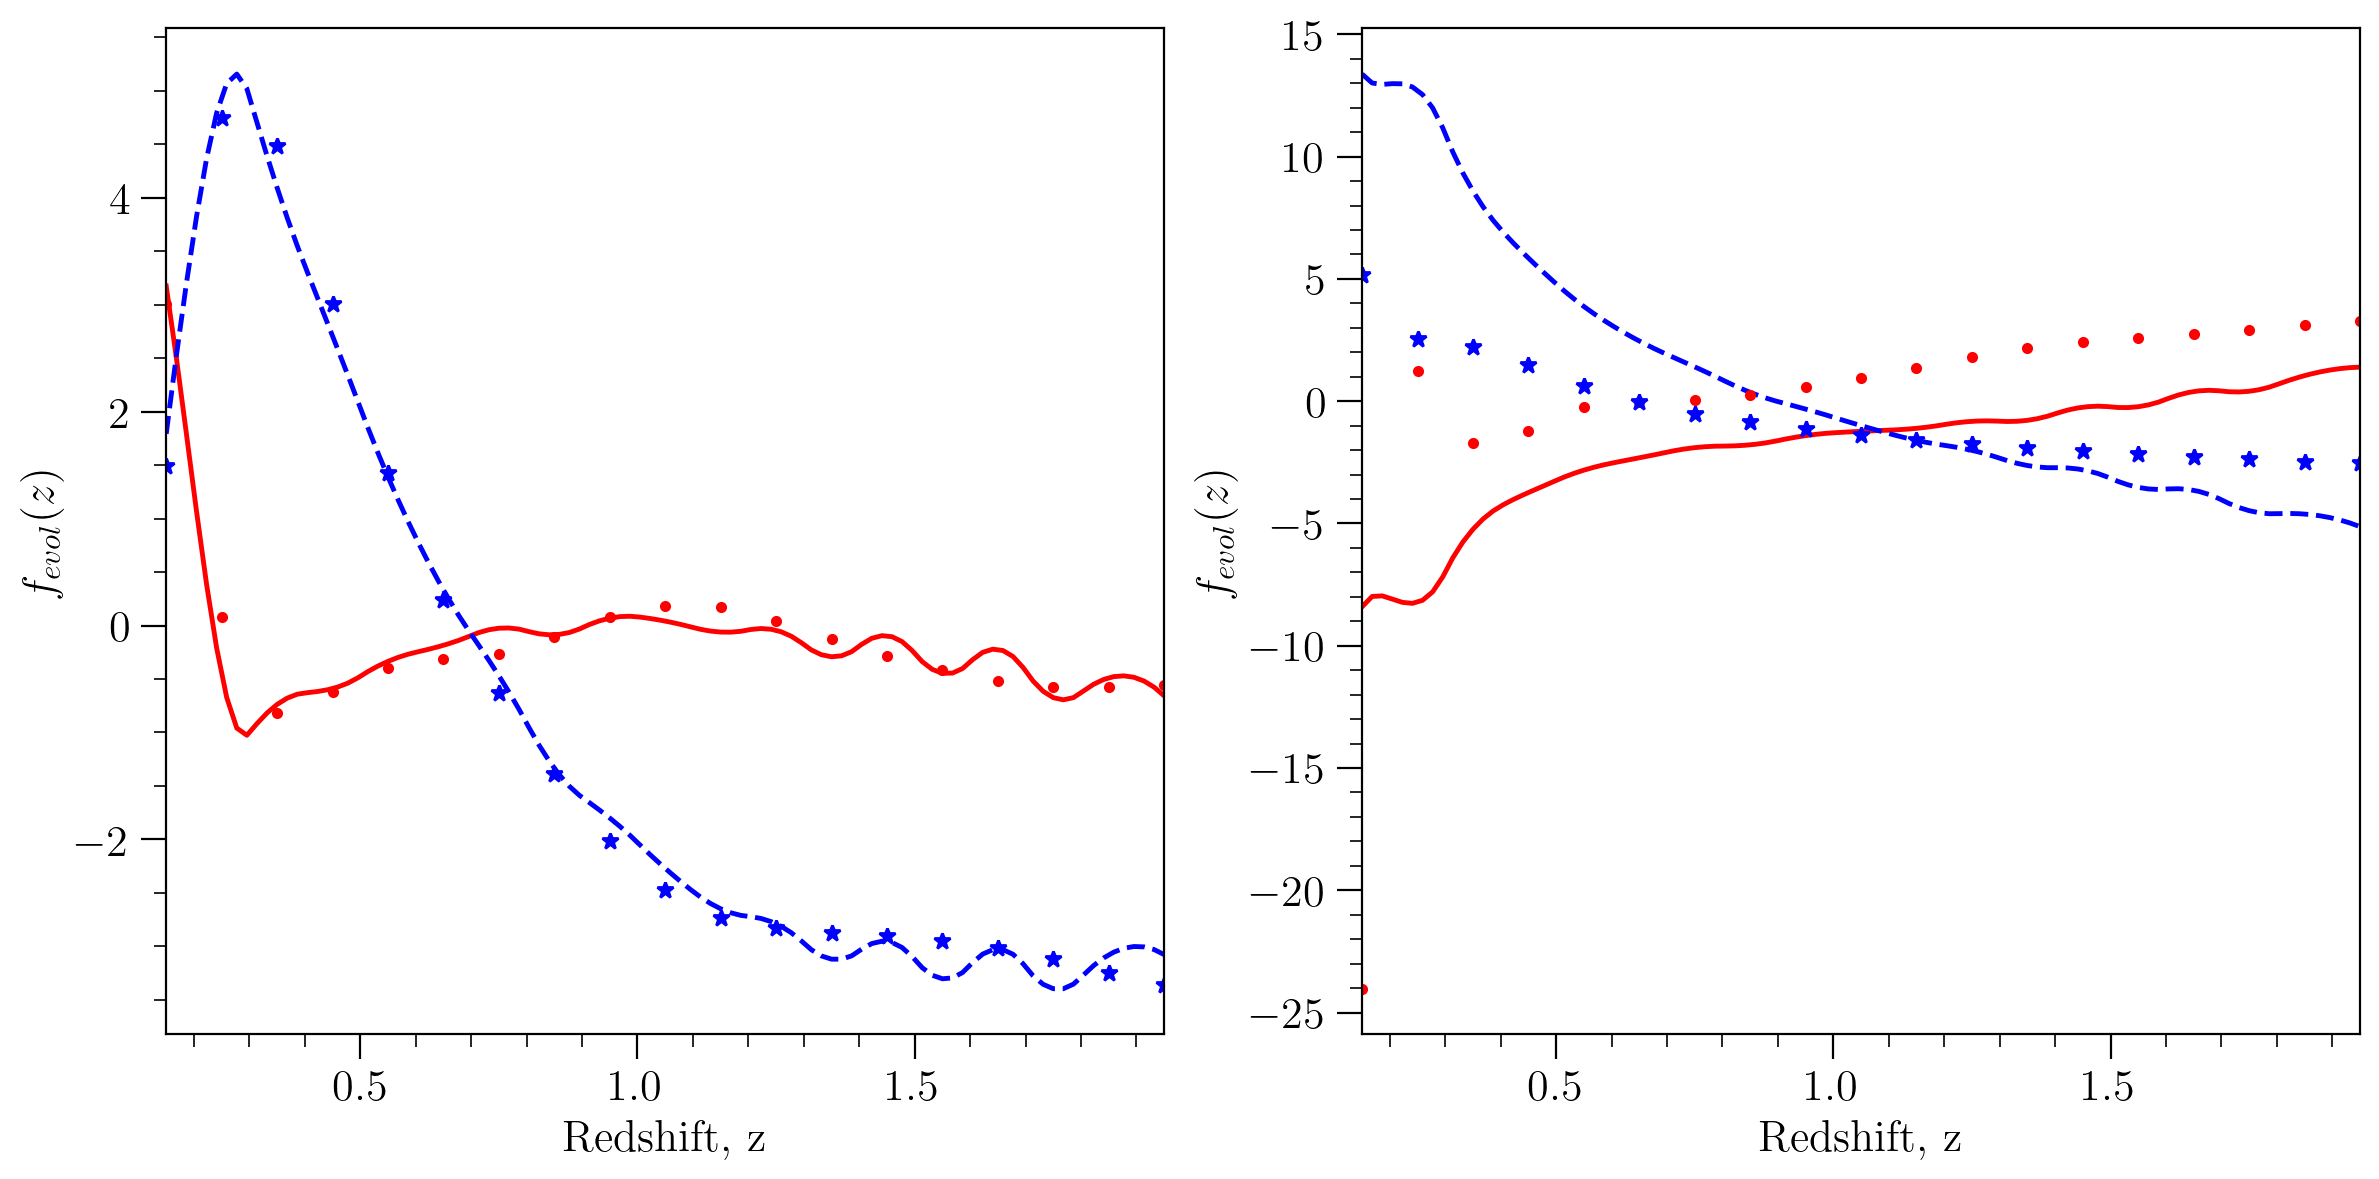

In [80]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

fevol_50_B_fid = fevol_bright(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)
fevol_50_F_fid = fevol_faint(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)

fevol_10_B_fid = fevol_bright(pars_s = sbias_fid_10, pars_n = num_fit, z = z_lin)
fevol_10_F_fid = fevol_faint(pars_s = sbias_fid_10, pars_n = num_fit, z = z_lin)

feB_50 = myEvolBias_50.fevol_bright(z_bins)
feF_50 = myEvolBias_50.fevol_faint(z_bins)

feB_10 = myEvolBias_10.fevol_bright(z_bins)
feF_10 = myEvolBias_10.fevol_faint(z_bins)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, 'r-')
ax[0].plot(z_lin, fevol_50_F_fid, 'b--')
ax[0].plot(z_bins, feB_50, 'r.', label='Bright')
ax[0].plot(z_bins, feF_50, 'b*', label='Faint')

ax[1].plot(z_lin, fevol_10_B_fid, 'r-')
ax[1].plot(z_lin, fevol_10_F_fid, 'b--')
ax[1].plot(z_bins, feB_10, 'r.', label='Bright')
ax[1].plot(z_bins, feF_10, 'b*', label='Faint')

for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlabel(r'Redshift, z');
    axi.set_ylabel(r'$f_{evol}(z)$');

In [81]:
list(range(4,8))

[4, 5, 6, 7]

In [82]:
# Select the marginalized covariance matrix for the parameters

cov_Joint_all = Sigma_Matrix_Joint50x10[:16, :16]
cov_all_priors = Cov_prior_all[:16, :16]

all_fid = np.concatenate([sbias_fid, num_fit])

# Generate parameter samples from multivariate normal distribution

#np.random.seed(18)

num_samples = 5000

all_Joint_pars_samples = np.random.multivariate_normal(all_fid, cov_Joint_all, num_samples)
all_pars_samples_priors = np.random.multivariate_normal(all_fid, cov_all_priors, num_samples)

nind_50 = list(range(4,8))

all_Joint_50_pars_samples = all_Joint_pars_samples
all_Joint_50_pars_samples = np.delete(all_Joint_50_pars_samples, nind_50, axis=1)
all_50_pars_samples_priors = all_pars_samples_priors
all_50_pars_samples_priors = np.delete(all_50_pars_samples_priors, nind_50, axis=1)

nind_10 = list(range(0,4))

all_Joint_10_pars_samples = all_Joint_pars_samples
all_Joint_10_pars_samples = np.delete(all_Joint_10_pars_samples, nind_10, axis=1)
all_10_pars_samples_priors = all_pars_samples_priors
all_10_pars_samples_priors = np.delete(all_10_pars_samples_priors, nind_10, axis=1)

In [83]:
# Evaluate fitting function for each parameter sample

fevol_Joint_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_B_samples_priors = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors])
fevol_Joint_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_F_samples_priors = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors])

fevol_Joint_10_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_10_pars_samples])
fevol_Joint_10_B_samples_priors = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples_priors])
fevol_Joint_10_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_10_pars_samples])
fevol_Joint_10_F_samples_priors = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples_priors])

# Calculate the 68% confidence intervals

fevol_B_50_lower_bound = np.percentile(fevol_Joint_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound = np.percentile(fevol_Joint_50_B_samples, 84, axis=0)
fevol_B_50_lower_bound_priors = np.percentile(fevol_Joint_50_B_samples_priors, 16, axis=0)
fevol_B_50_upper_bound_priors = np.percentile(fevol_Joint_50_B_samples_priors, 84, axis=0)

fevol_F_50_lower_bound = np.percentile(fevol_Joint_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound = np.percentile(fevol_Joint_50_F_samples, 84, axis=0)
fevol_F_50_lower_bound_priors = np.percentile(fevol_Joint_50_F_samples_priors, 16, axis=0)
fevol_F_50_upper_bound_priors = np.percentile(fevol_Joint_50_F_samples_priors, 84, axis=0)

fevol_B_10_lower_bound = np.percentile(fevol_Joint_10_B_samples, 16, axis=0)
fevol_B_10_upper_bound = np.percentile(fevol_Joint_10_B_samples, 84, axis=0)
fevol_B_10_lower_bound_priors = np.percentile(fevol_Joint_10_B_samples_priors, 16, axis=0)
fevol_B_10_upper_bound_priors = np.percentile(fevol_Joint_10_B_samples_priors, 84, axis=0)

fevol_F_10_lower_bound = np.percentile(fevol_Joint_10_F_samples, 16, axis=0)
fevol_F_10_upper_bound = np.percentile(fevol_Joint_10_F_samples, 84, axis=0)
fevol_F_10_lower_bound_priors = np.percentile(fevol_Joint_10_F_samples_priors, 16, axis=0)
fevol_F_10_upper_bound_priors = np.percentile(fevol_Joint_10_F_samples_priors, 84, axis=0)

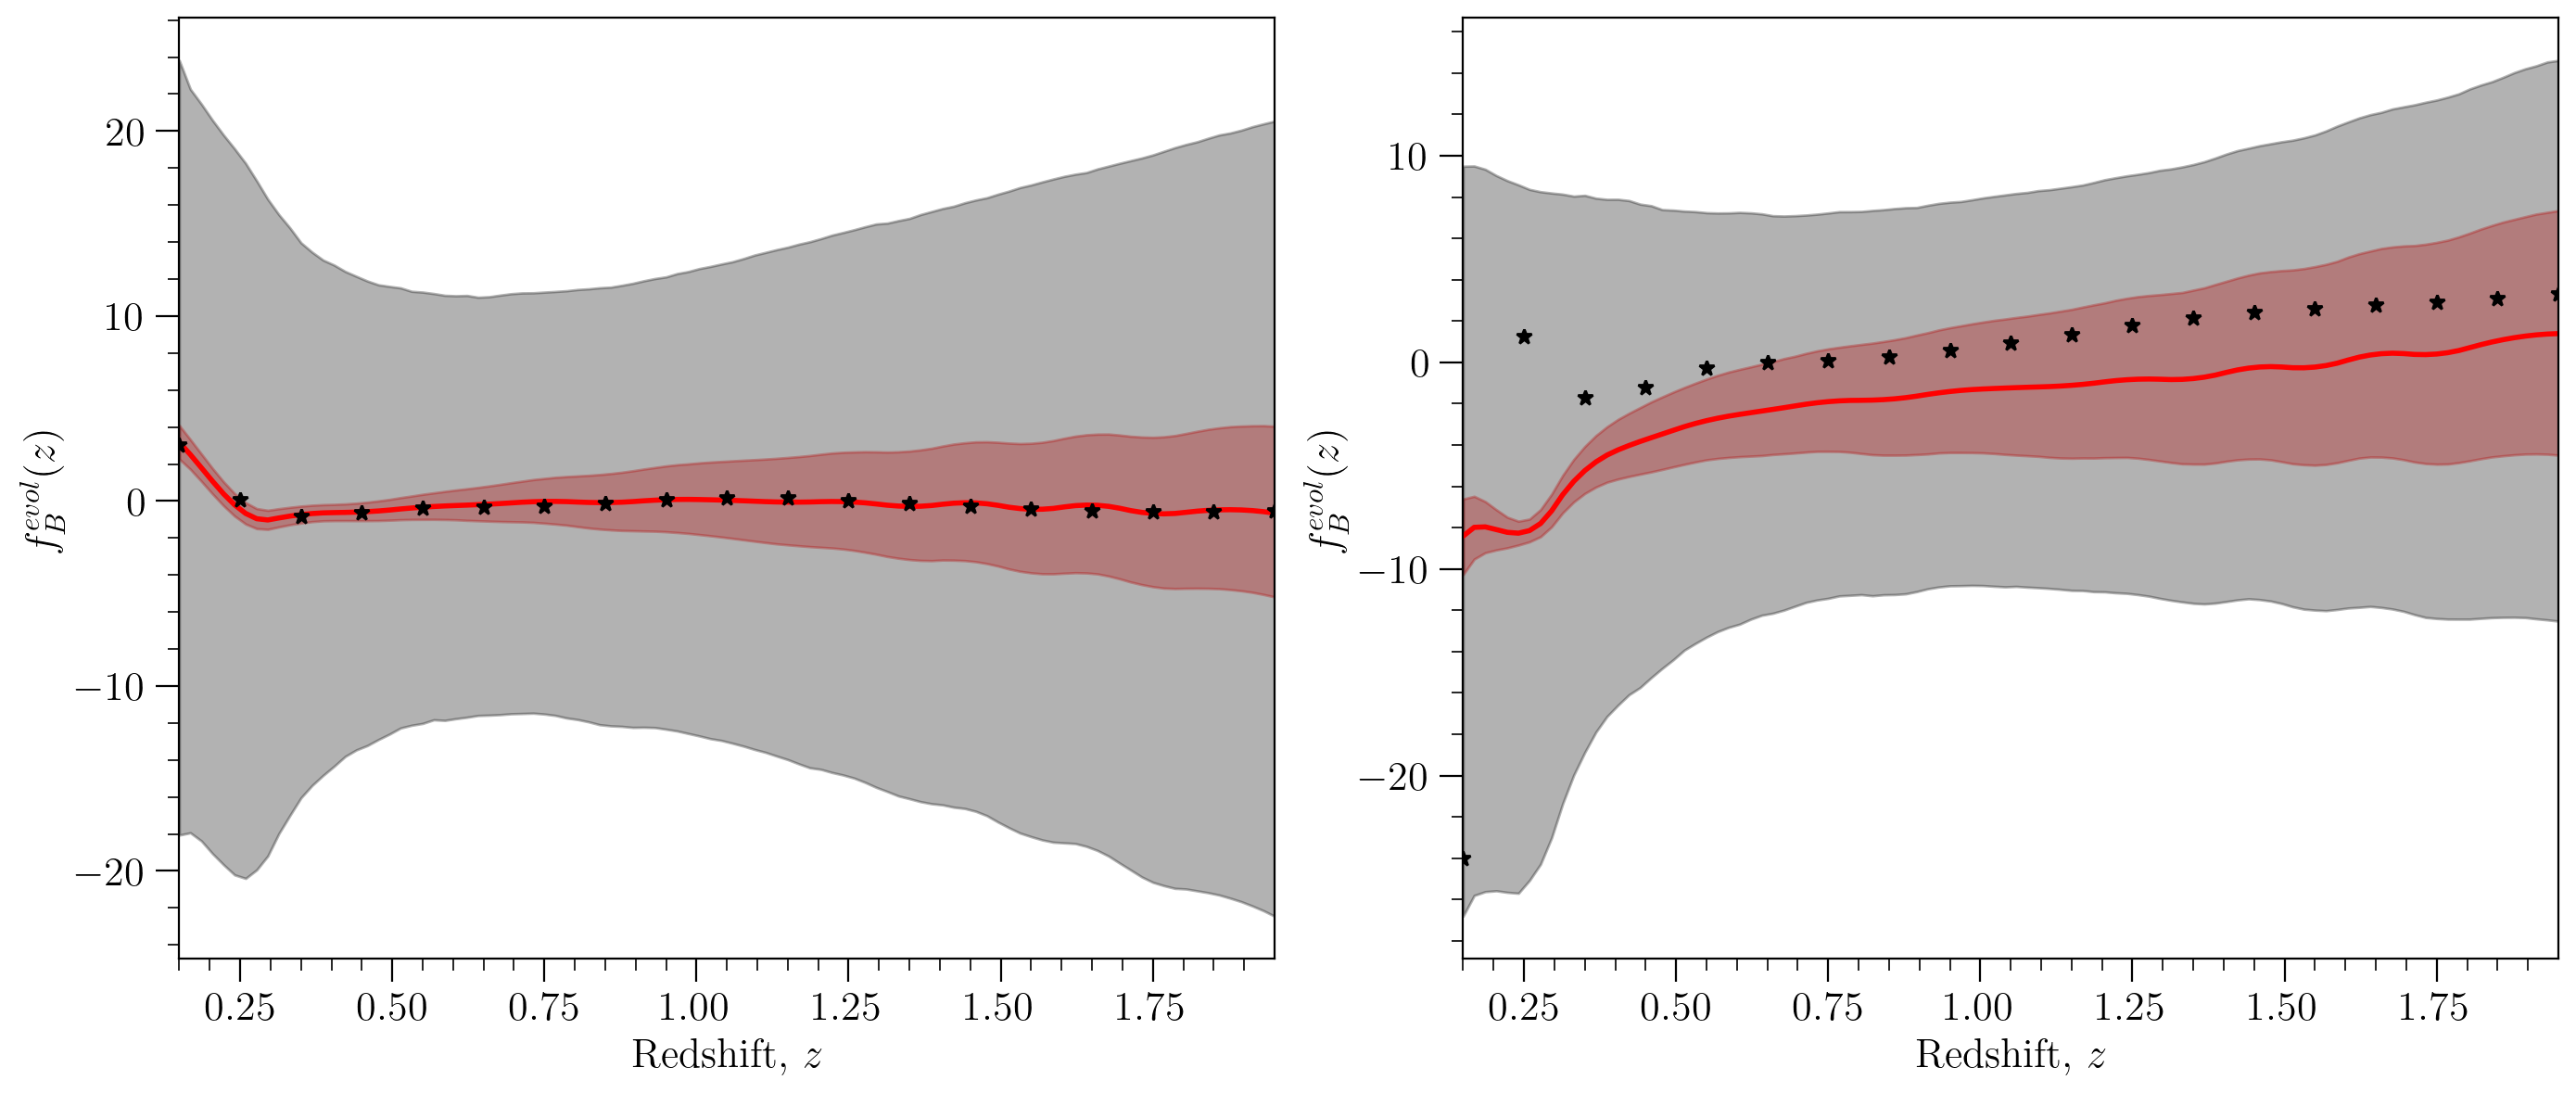

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, '-', color='red', lw = 2.0)
ax[0].plot(z_bins, feB_50, '*', color='black')
ax[1].plot(z_lin, fevol_10_B_fid, '-', color='red', lw = 2.0)
ax[1].plot(z_bins, feB_10, '*', color='black')

# Shade the 68% confidence interval

ax[0].fill_between(z_lin, fevol_B_50_lower_bound, fevol_B_50_upper_bound, color='red', alpha=0.3)
ax[0].fill_between(z_lin, fevol_B_50_lower_bound_priors, fevol_B_50_upper_bound_priors, color='black', alpha=0.3)

ax[1].fill_between(z_lin, fevol_B_10_lower_bound, fevol_B_10_upper_bound, color='red', alpha=0.3)
ax[1].fill_between(z_lin, fevol_B_10_lower_bound_priors, fevol_B_10_upper_bound_priors, color='black', alpha=0.3)

for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_B(z)$')

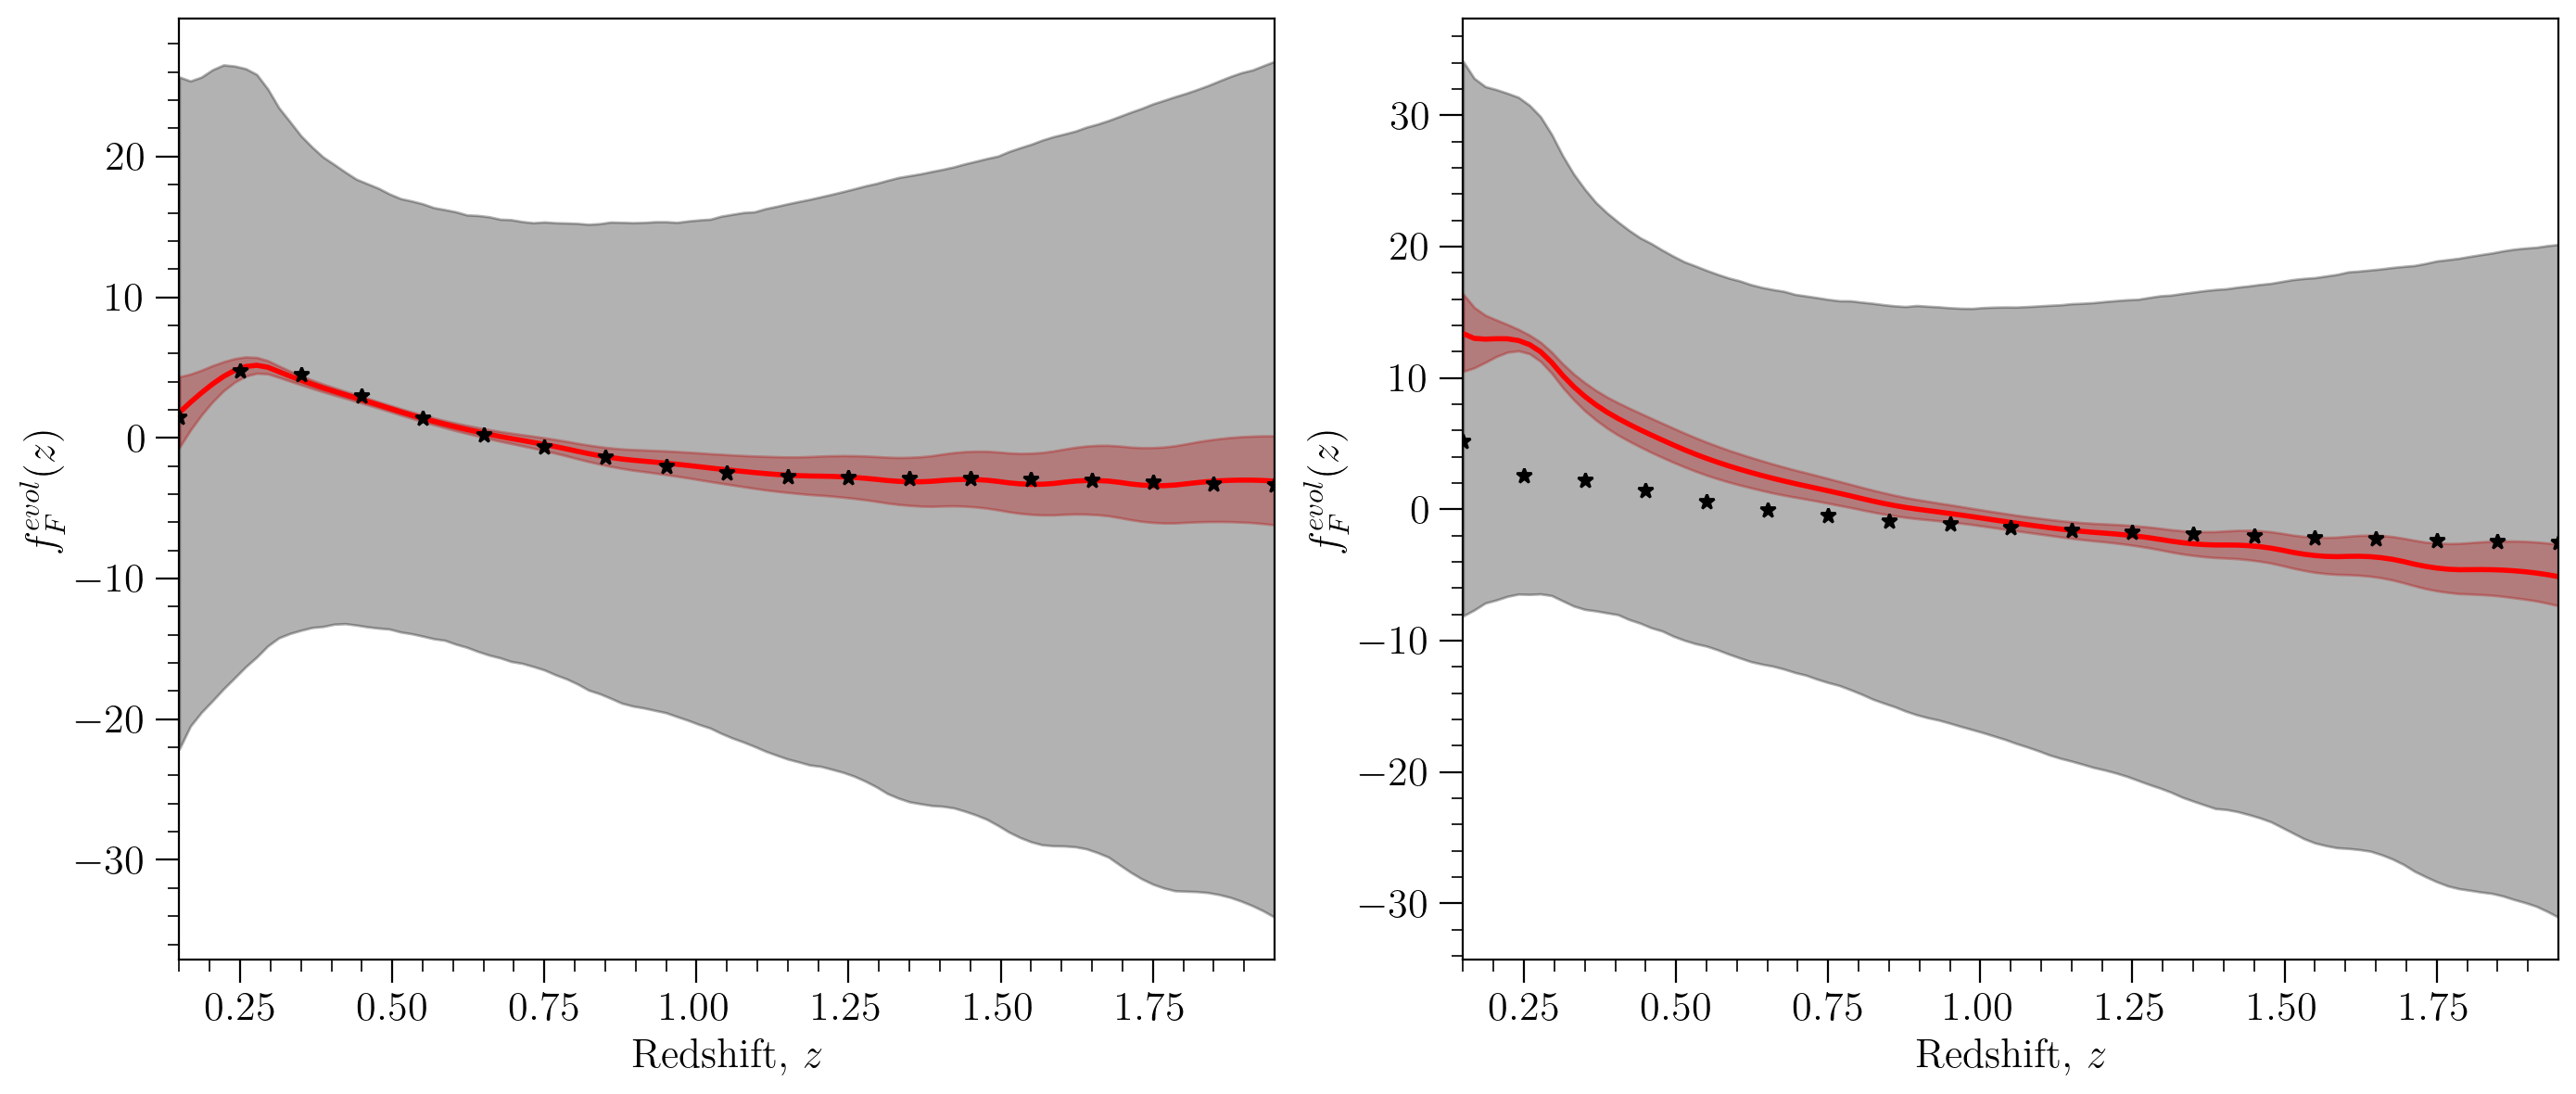

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_F_fid, '-', color='red', lw = 2.0)
ax[0].plot(z_bins, feF_50, '*', color='black')
ax[1].plot(z_lin, fevol_10_F_fid, '-', color='red', lw = 2.0)
ax[1].plot(z_bins, feF_10, '*', color='black')

# Shade the 68% confidence interval

ax[0].fill_between(z_lin, fevol_F_50_lower_bound, fevol_F_50_upper_bound, color='red', alpha=0.3)
ax[0].fill_between(z_lin, fevol_F_50_lower_bound_priors, fevol_F_50_upper_bound_priors, color='black', alpha=0.3)

ax[1].fill_between(z_lin, fevol_F_10_lower_bound, fevol_F_10_upper_bound, color='red', alpha=0.3)
ax[1].fill_between(z_lin, fevol_F_10_lower_bound_priors, fevol_F_10_upper_bound_priors, color='black', alpha=0.3)

for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_F(z)$')

# Comparison with Individual Splits

## Magnification bias

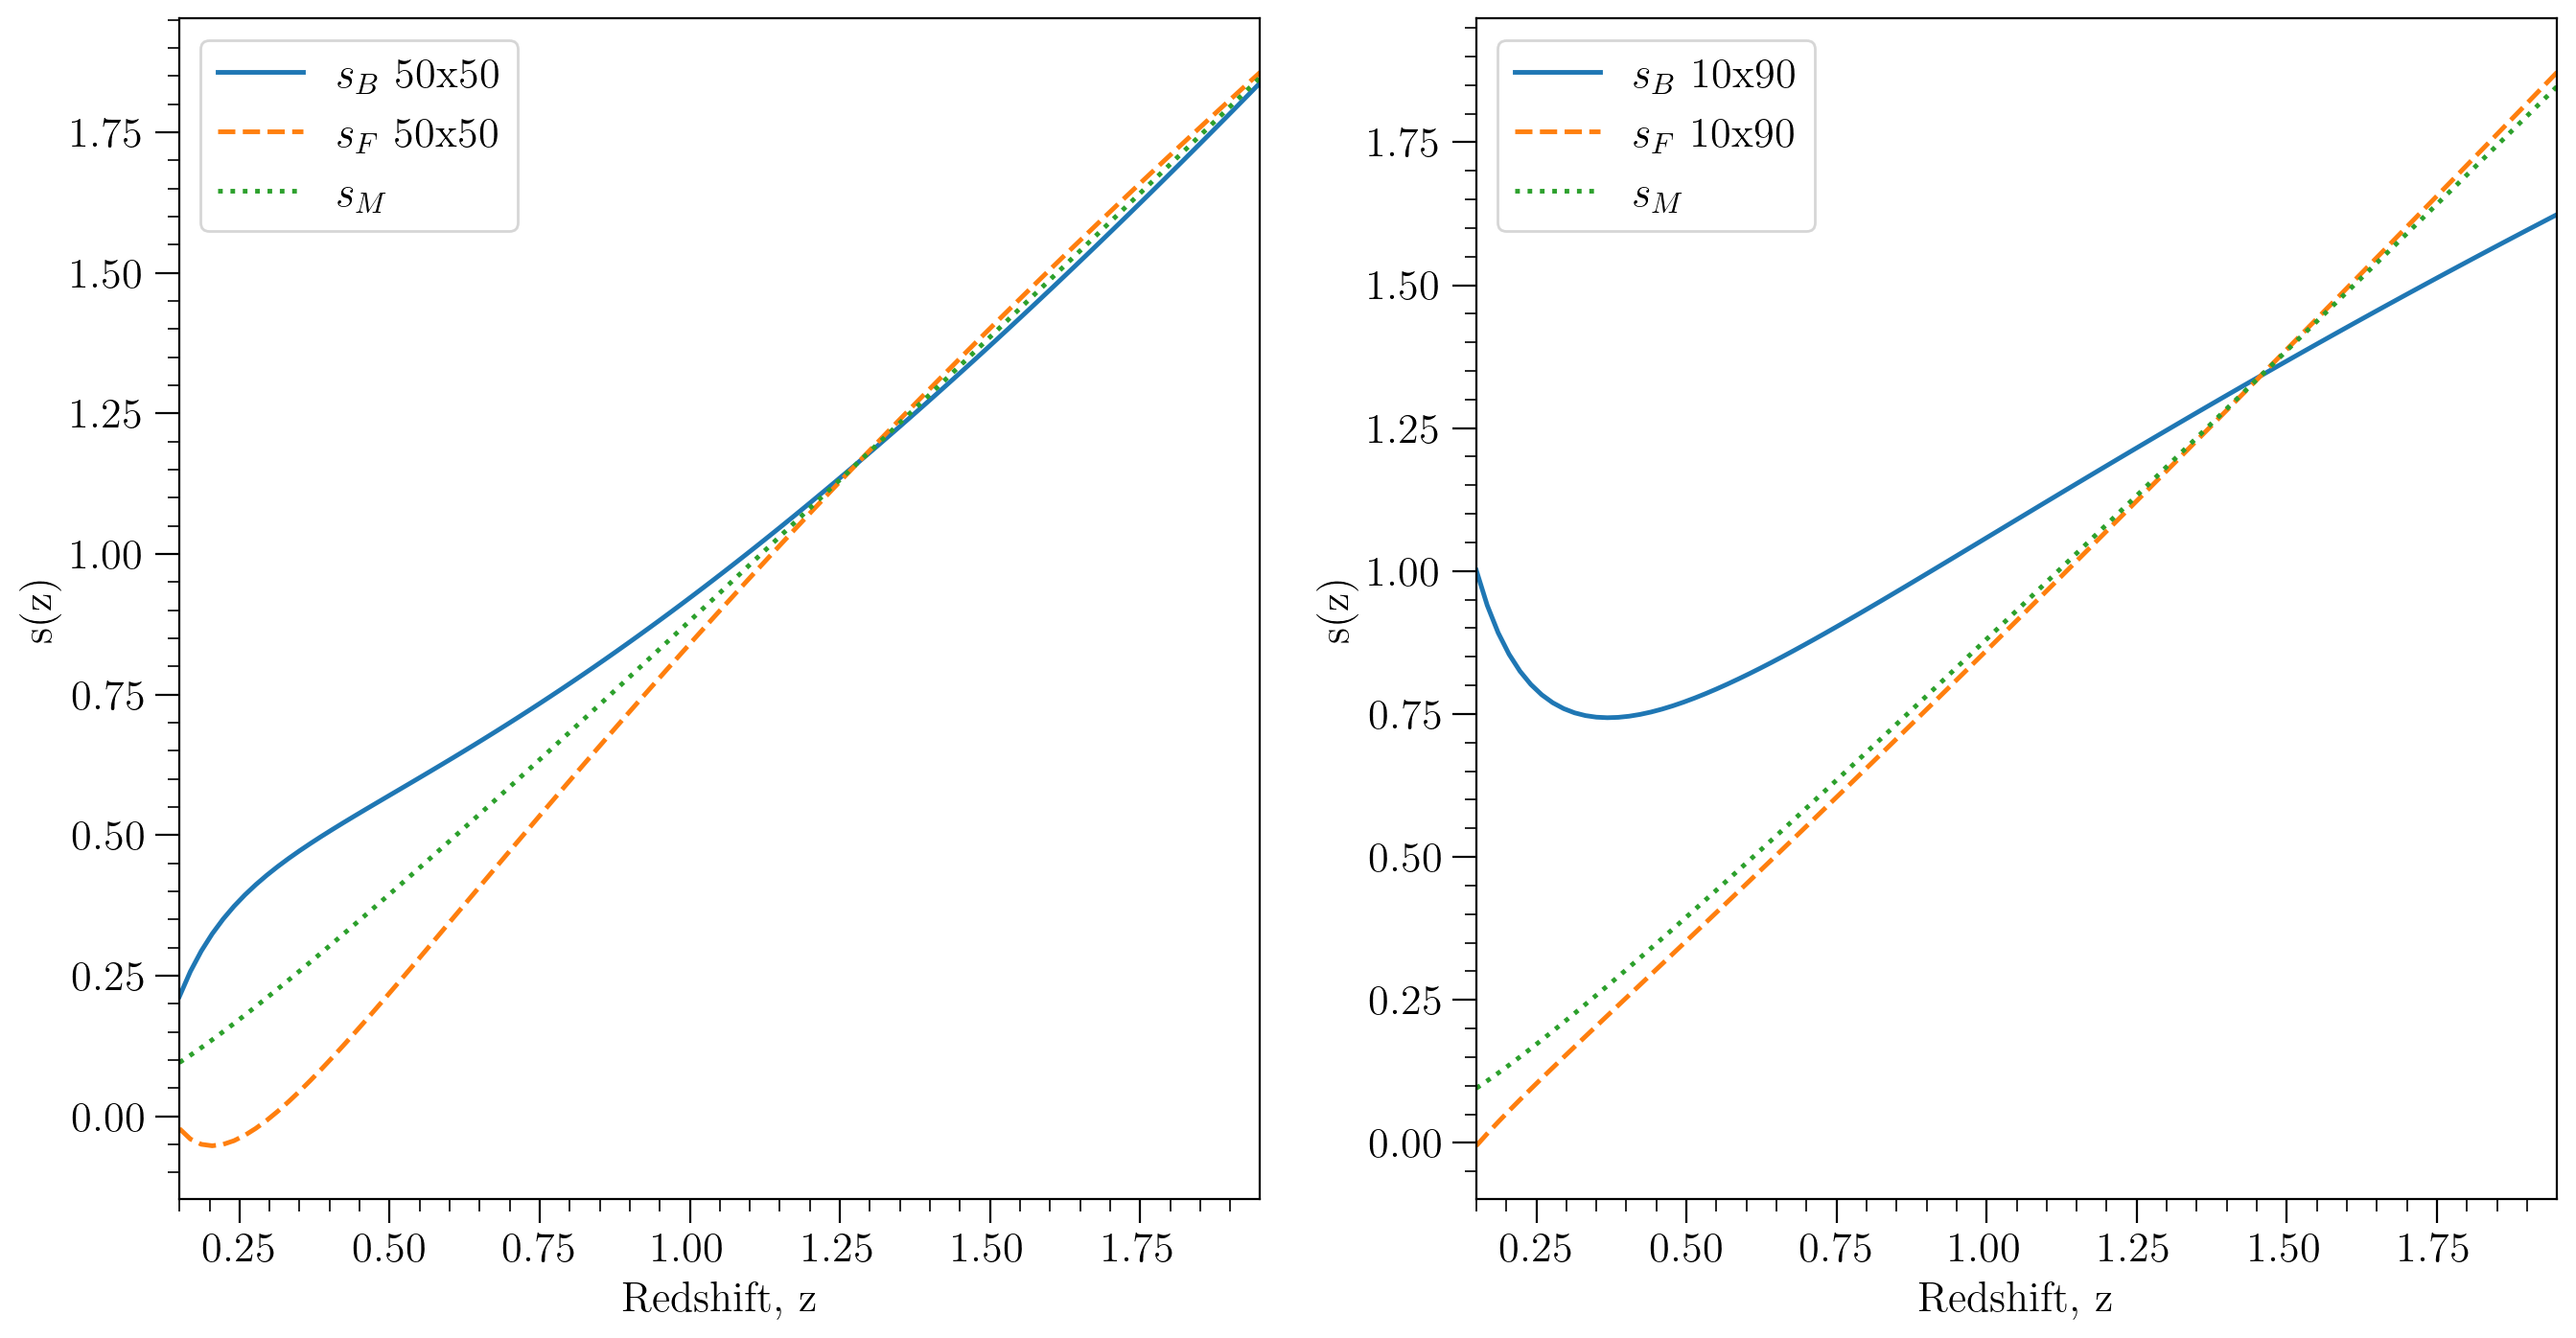

In [86]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

m_50 = 2.
m_10 = 10.

sB_fid_50 = magbias_fit(sB_fit[:4], z_lin)
sB_fid_10 = magbias_fit(sB_fit[4:], z_lin)
sM_fid = magbias_fit(sM_4fit, z_lin)
sF_fid_50 = sM_fid * (m_50/(m_50-1)) - sB_fid_50/(m_50-1)
sF_fid_10 = sM_fid * (m_10/(m_10-1)) - sB_fid_10/(m_10-1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, sB_fid_50, '-', label=r'$s_B$ 50x50')
ax[0].plot(z_lin, sF_fid_50, '--', label=r'$s_F$ 50x50')
ax[0].plot(z_lin, sM_fid, ':', label=r'$s_M$')

ax[1].plot(z_lin, sB_fid_10, '-', label=r'$s_B$ 10x90')
ax[1].plot(z_lin, sF_fid_10, '--', label=r'$s_F$ 10x90')
ax[1].plot(z_lin, sM_fid, ':', label=r'$s_M$')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r's(z)')
    axi.legend();


### Observables: $s_B(z)$ and $s_M(z)$

In [87]:
# Compute priors 

# Select the marginalized covariance matrix for the magnification biases priors

cov_sB_50_priors = Cov_prior_all[:4, :4]
cov_sB_10_priors = Cov_prior_all[4:8, 4:8]
cov_sM_priors = Cov_prior_all[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sB_50_pars_samples_priors = np.random.multivariate_normal(sB_4fit50, cov_sB_50_priors, num_samples)
sB_10_pars_samples_priors = np.random.multivariate_normal(sB_4fit10, cov_sB_10_priors, num_samples)
sM_pars_samples_priors = np.random.multivariate_normal(sM_4fit, cov_sM_priors, num_samples)

# Evaluate fitting function for each parameter sample

sB_50_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples_priors])
sB_10_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_10_pars_samples_priors])

sM_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_pars_samples_priors])

# Calculate the 68% confidence interval

sB_50_lower_bound_priors = np.percentile(sB_50_samples_priors, 16, axis=0)
sB_50_upper_bound_priors = np.percentile(sB_50_samples_priors, 84, axis=0)

sB_10_lower_bound_priors = np.percentile(sB_10_samples_priors, 16, axis=0)
sB_10_upper_bound_priors = np.percentile(sB_10_samples_priors, 84, axis=0)

sM_lower_bound_priors = np.percentile(sM_samples_priors, 16, axis=0)
sM_upper_bound_priors = np.percentile(sM_samples_priors, 84, axis=0)


In [88]:
np.shape(Sigma_Matrix_10)

(21, 21)

In [89]:
# Select the marginalized covariance matrix for the magnification biases

cov_sB_50 = Sigma_Matrix_50[:4, :4]
cov_sB_30 = Sigma_Matrix_10[:4, :4]
cov_sM_50 = Sigma_Matrix_50[4:8, 4:8]
cov_sm_10 = Sigma_Matrix_10[4:8, 4:8]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sB_50_pars_samples = np.random.multivariate_normal(sB_4fit50, cov_sB_50, num_samples)
sB_30_pars_samples = np.random.multivariate_normal(sB_4fit10, cov_sB_30, num_samples)
sM_50_pars_samples = np.random.multivariate_normal(sM_4fit, cov_sM_50, num_samples)
sm_10_pars_samples = np.random.multivariate_normal(sM_4fit, cov_sm_10, num_samples)

# Evaluate fitting function for each parameter sample
sB_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples])
sB_30_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_30_pars_samples])
sM_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_50_pars_samples])
sm_10_samples = np.array([magbias_fit(pars, z_lin) for pars in sm_10_pars_samples])

# Calculate the 68% confidence interval
sB_50_lower_bound = np.percentile(sB_50_samples, 16, axis=0)
sB_50_upper_bound = np.percentile(sB_50_samples, 84, axis=0)

sB_10_lower_bound = np.percentile(sB_30_samples, 16, axis=0)
sB_10_upper_bound = np.percentile(sB_30_samples, 84, axis=0)

sM_50_lower_bound = np.percentile(sM_50_samples, 16, axis=0)
sM_50_upper_bound = np.percentile(sM_50_samples, 84, axis=0)
sM_10_lower_bound = np.percentile(sm_10_samples, 16, axis=0)
sM_10_upper_bound = np.percentile(sm_10_samples, 84, axis=0)

Predictions for $s_B(z)$ vs Priors

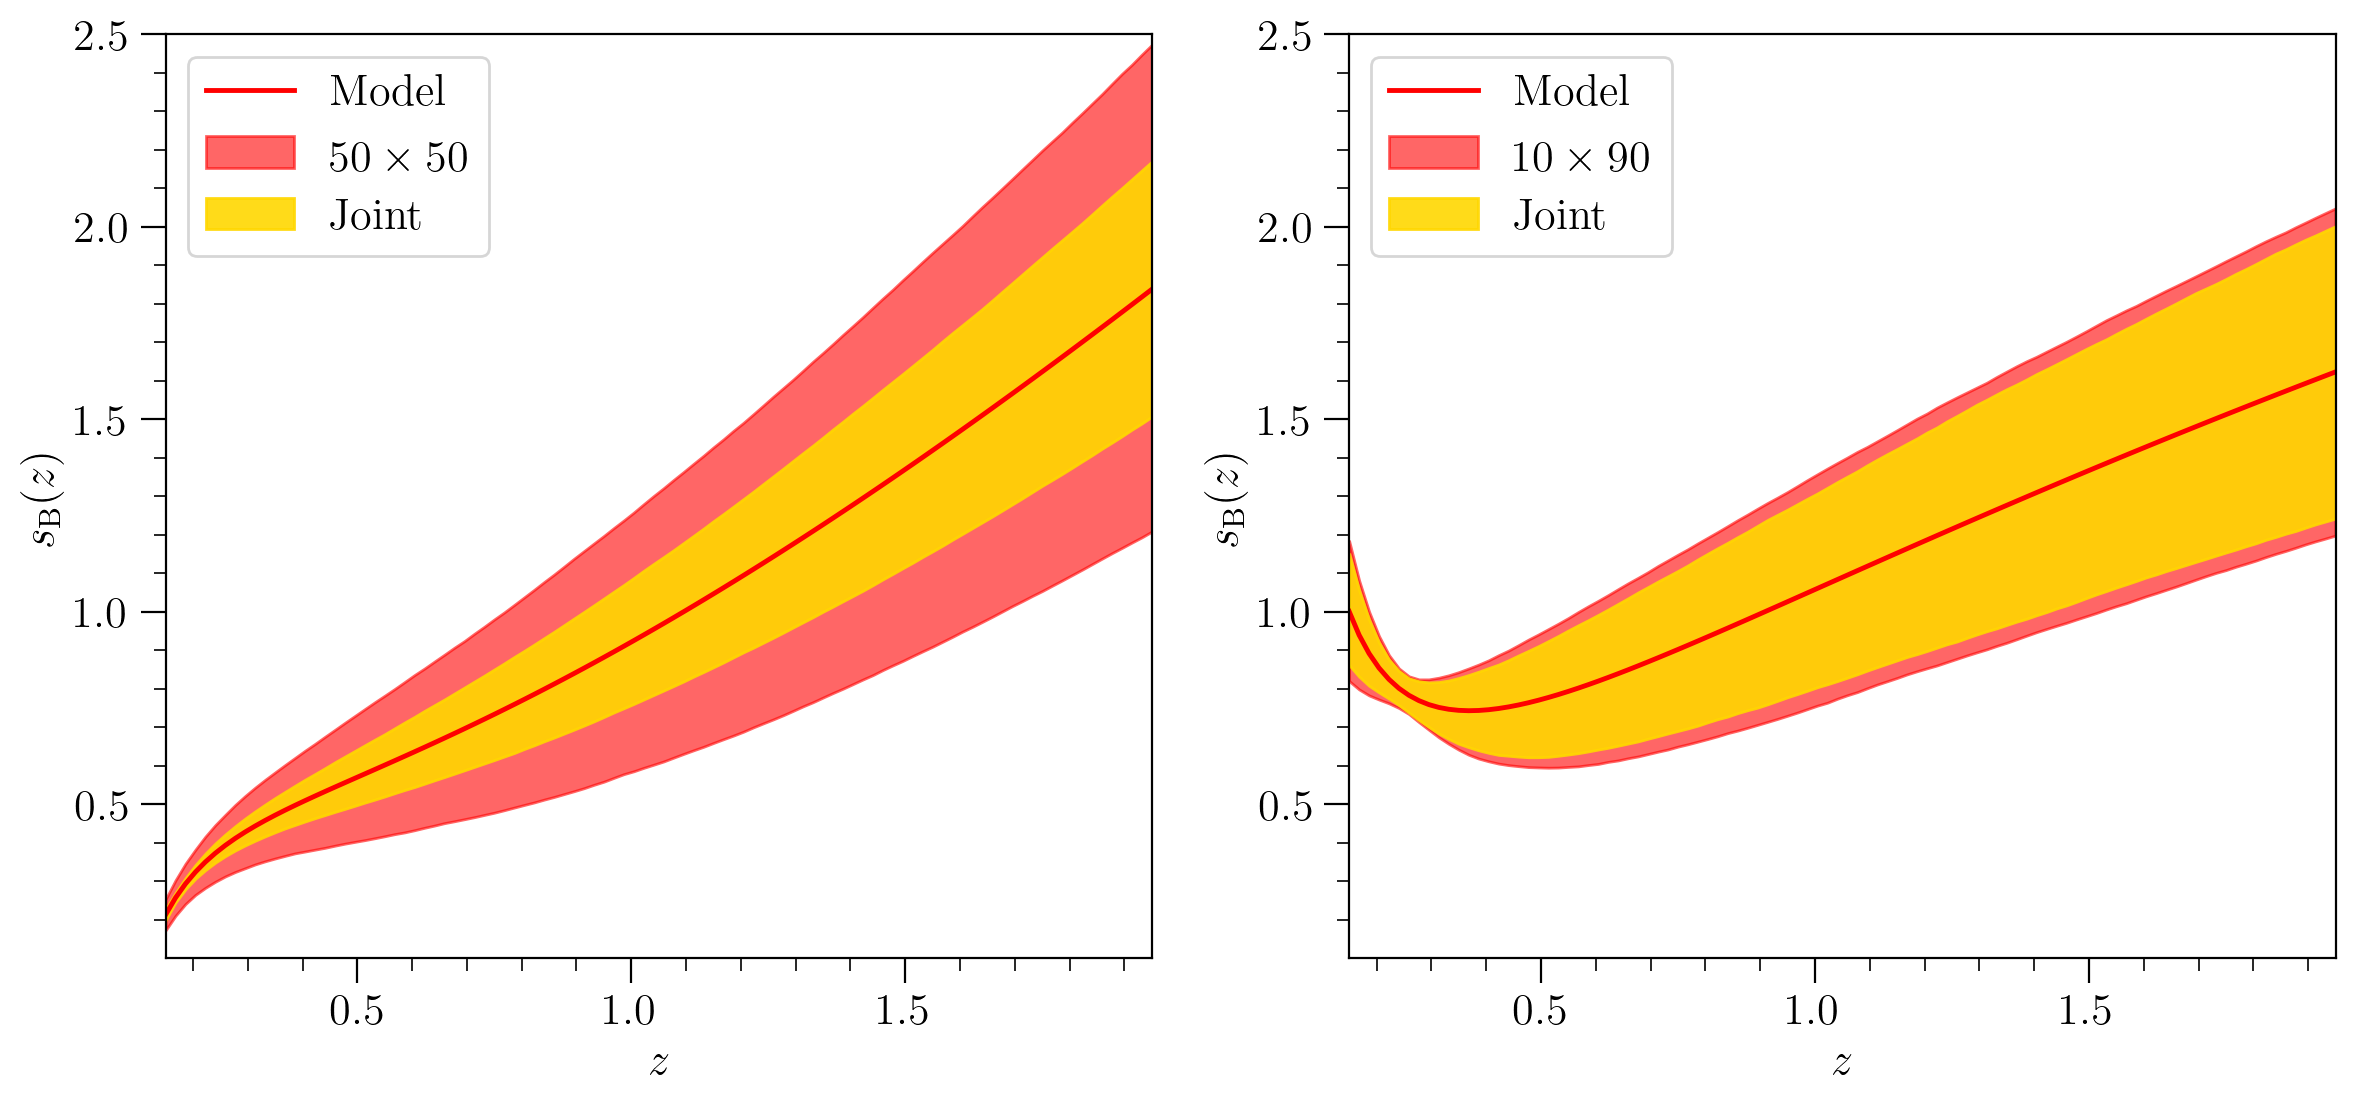

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sB_fid_50, 'r-', label = r'Model')
#ax[0].fill_between(z_lin, sB_50_lower_bound_priors, sB_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sB_50_lower_bound, sB_50_upper_bound, color='red', alpha=0.6, label = r'$50\times 50$')
ax[0].fill_between(z_lin, sB_Joint_50_lower_bound, sB_Joint_50_upper_bound, color='gold', alpha=0.9, label = 'Joint')
ax[0].legend(loc='upper left')

ax[1].plot(z_lin, sB_fid_10, 'r-', label = r'Model')
#ax[1].fill_between(z_lin, sB_10_lower_bound_priors, sB_10_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, sB_10_lower_bound, sB_10_upper_bound, color='red', alpha=0.6, label = r'$10\times 90$')
ax[1].fill_between(z_lin, sB_Joint_10_lower_bound, sB_Joint_10_upper_bound, color='gold', alpha=0.9, label = 'Joint')
ax[1].legend(loc='upper left')

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(0.1, 2.5)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$s_\mathrm{B}(z)$')
    
#plt.savefig("plots/sB_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

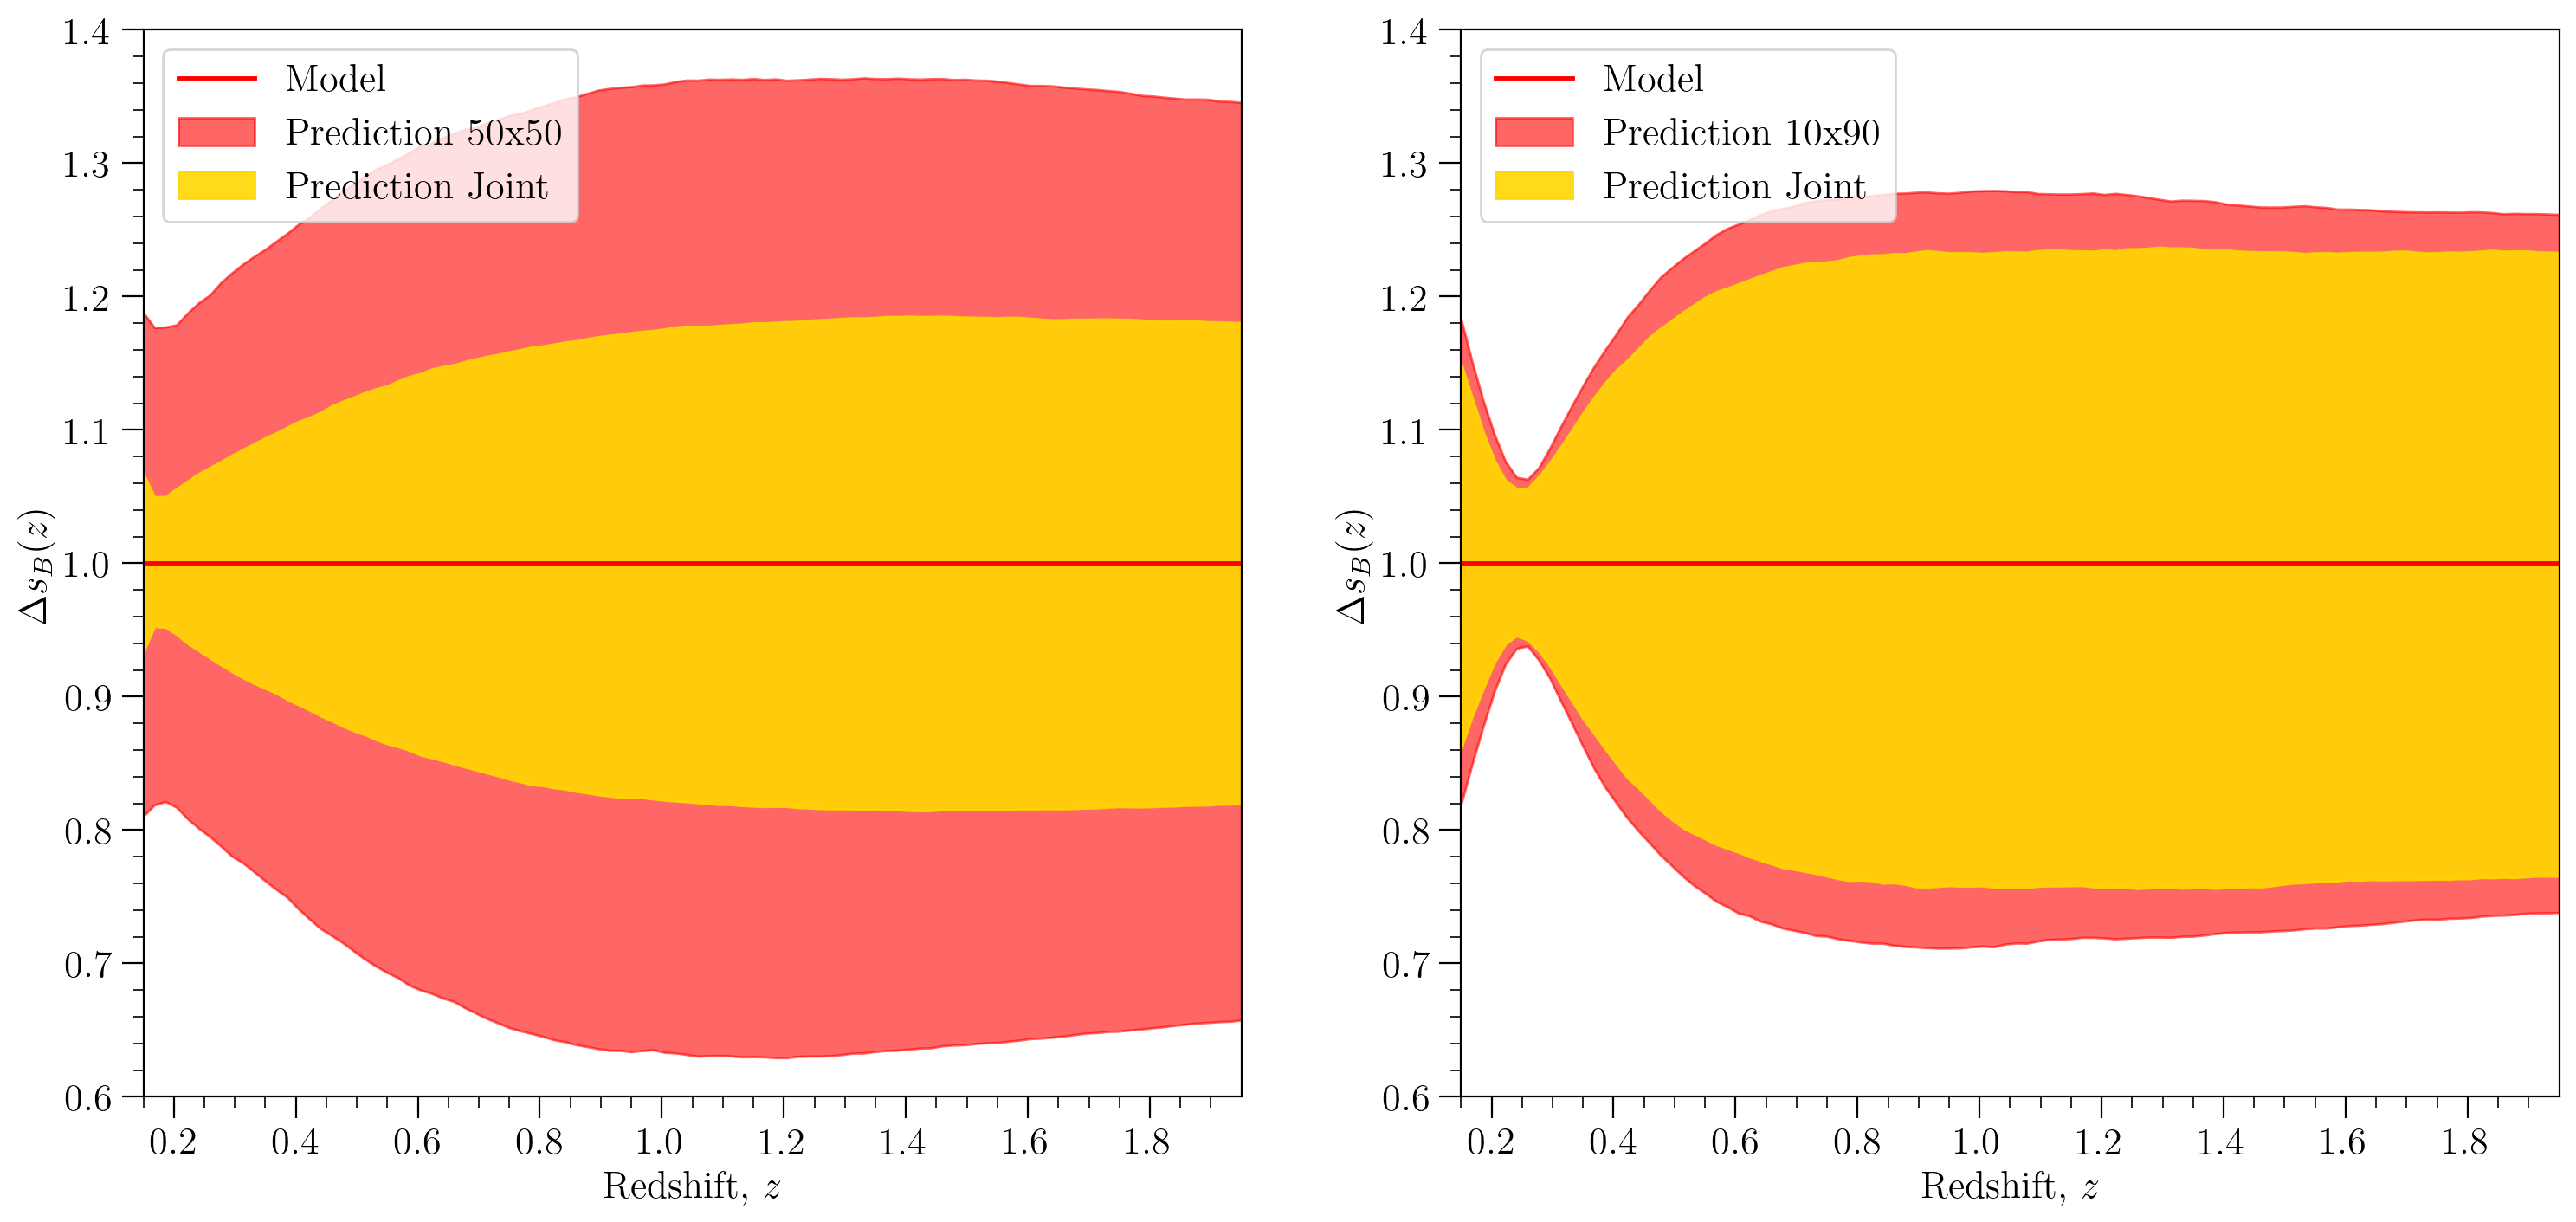

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))

ax[0].plot(z_lin, sB_fid_50/sB_fid_50, 'r-', label = r'Model')
#ax[0].fill_between(z_lin, sB_50_lower_bound_priors/sB_fid_50, sB_50_upper_bound_priors/sB_fid_50, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sB_50_lower_bound/sB_fid_50, sB_50_upper_bound/sB_fid_50, color='red', alpha=0.6, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, sB_Joint_50_lower_bound/sB_fid_50, sB_Joint_50_upper_bound/sB_fid_50, color='gold', alpha=0.9, label = 'Prediction Joint')
ax[0].legend(loc='upper left')

ax[1].plot(z_lin, sB_fid_10/sB_fid_10, 'r-', label = r'Model')
#ax[1].fill_between(z_lin, sB_10_lower_bound_priors/sB_fid_10, sB_10_upper_bound_priors/sB_fid_10, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, sB_10_lower_bound/sB_fid_10, sB_10_upper_bound/sB_fid_10, color='red', alpha=0.6, label = 'Prediction 10x90')
ax[1].fill_between(z_lin, sB_Joint_10_lower_bound/sB_fid_10, sB_Joint_10_upper_bound/sB_fid_10, color='gold', alpha=0.9, label = 'Prediction Joint')
ax[1].legend(loc='upper left')

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(0.6, 1.4)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$\Delta s_B(z)$')

Predictions for $s_M(z)$ vs Priors

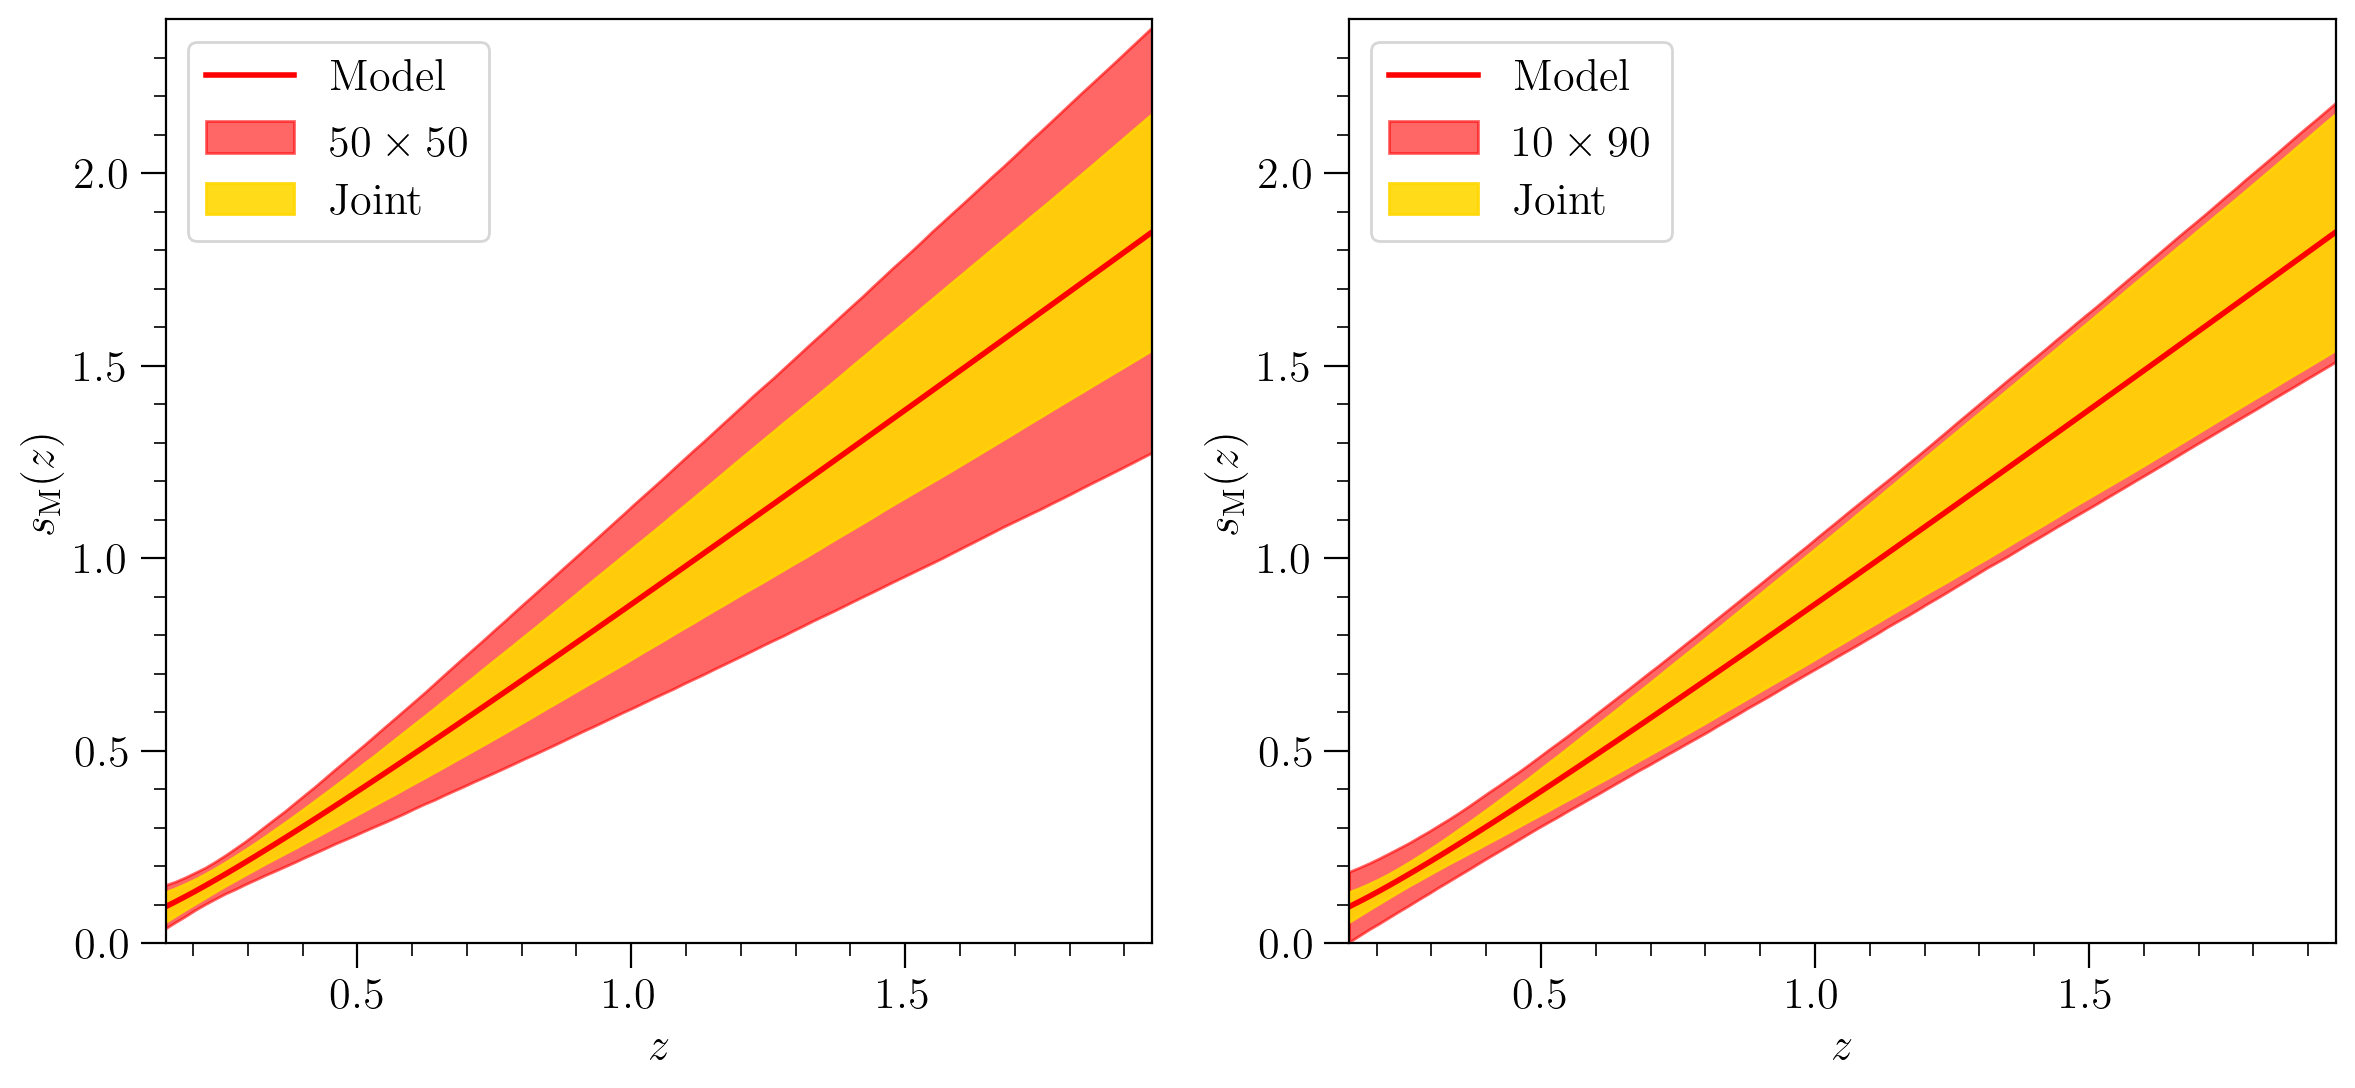

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

for axi in ax:
    axi.plot(z_lin, sM_fid, '-', lw = 2.0, color='red', label = 'Model')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
ax[0].fill_between(z_lin, sM_50_lower_bound, sM_50_upper_bound, color='red', alpha=0.6, label = r'$50\times 50$')
ax[0].fill_between(z_lin, sM_Joint_lower_bound, sM_Joint_upper_bound, color='gold', alpha=0.9, label = r'Joint')

#ax[1].fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
ax[1].fill_between(z_lin, sM_10_lower_bound, sM_10_upper_bound, color='red', alpha=0.6, label = r'$10\times 90$')
ax[1].fill_between(z_lin, sM_Joint_lower_bound, sM_Joint_upper_bound, color='gold', alpha=0.9, label = r'Joint')
    
for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_ylim(0., 2.4)
    axi.set_xlabel(r'$z$');
    axi.set_ylabel(r'$s_\mathrm{M}(z)$');
    axi.legend(loc='upper left');
    
#plt.savefig("plots/sM_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')


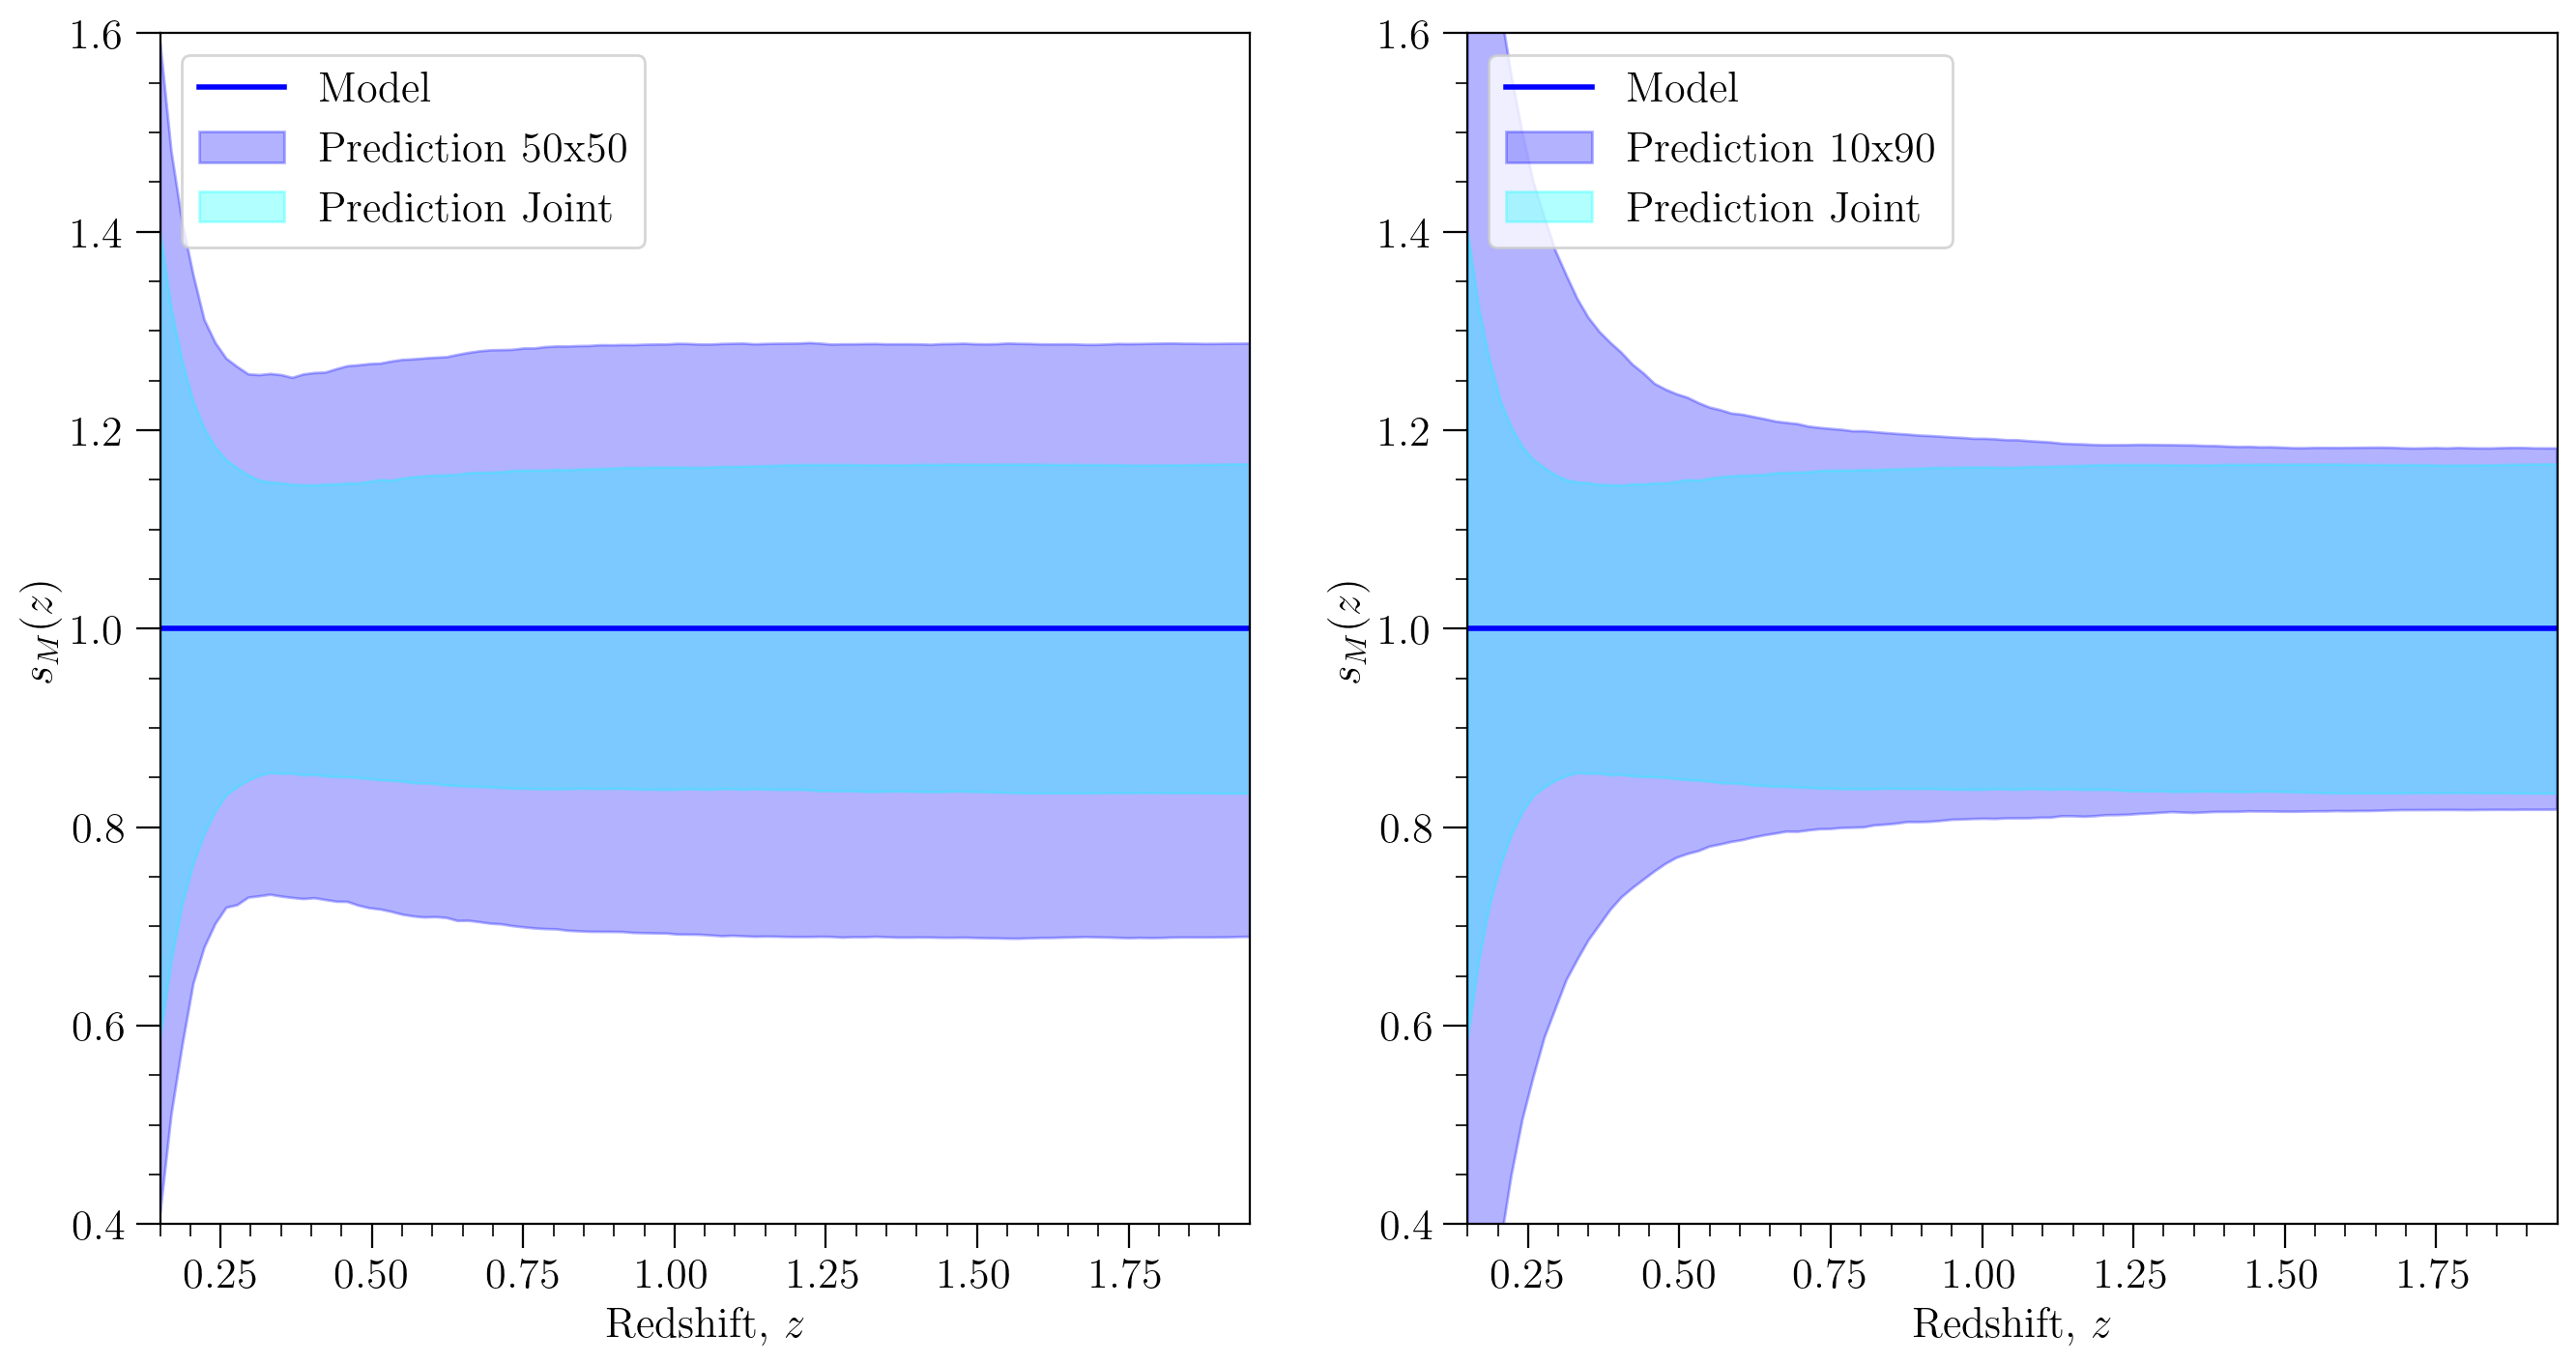

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

for axi in ax:
    axi.plot(z_lin, sM_fid/sM_fid, '-', lw = 2.0, color='blue', label = 'Model')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, sM_lower_bound_priors/sM_fid, sM_upper_bound_priors/sM_fid, color='black', alpha=0.3, label = r'Prior')
ax[0].fill_between(z_lin, sM_50_lower_bound/sM_fid, sM_50_upper_bound/sM_fid, color='blue', alpha=0.3, label = r'Prediction 50x50')
ax[0].fill_between(z_lin, sM_Joint_lower_bound/sM_fid, sM_Joint_upper_bound/sM_fid, color='cyan', alpha=0.3, label = r'Prediction Joint')

#ax[1].fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
ax[1].fill_between(z_lin, sM_10_lower_bound/sM_fid, sM_10_upper_bound/sM_fid, color='blue', alpha=0.3, label = r'Prediction 10x90')
ax[1].fill_between(z_lin, sM_Joint_lower_bound/sM_fid, sM_Joint_upper_bound/sM_fid, color='cyan', alpha=0.3, label = r'Prediction Joint')
    
for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_ylim(0.4,1.6)
    axi.set_xlabel(r'Redshift, $z$');
    axi.set_ylabel(r'$s_M(z)$');
    axi.legend(loc='upper left');

### Magnification bias of the Faint, $s_F(z)$

The magnification bias of the faint population is obtained by:

$$ s_F(z) = s_{model}(z)\frac{\bar{N}(z)}{\bar{N}_F(z)} - s_B(z)\frac{\bar{N}_B(z)}{\bar{N}_F(z)} = s_F(z) = s_{model}(z)\frac{m}{m-1} - s_B(z)\frac{1}{m-1} $$ 

We need to sample together the $s_B$ and $s_M$ parameters.

In [94]:
sbias_50_fid = np.concatenate([sB_4fit50, sM_4fit])
sbias_10_fid = np.concatenate([sB_4fit10, sM_4fit])

np.shape(sbias_50_fid), np.shape(sbias_10_fid)

((8,), (8,))

In [95]:
# Select the marginalized covariance matrix for the magnification biases together
cov_50_sbias = Sigma_Matrix_50[:8, :8]
cov_10_sbias = Sigma_Matrix_10[:8, :8]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sbias_50_pars_samples = np.random.multivariate_normal(sbias_50_fid, cov_50_sbias, num_samples)
sbias_10_pars_samples = np.random.multivariate_normal(sbias_10_fid, cov_10_sbias, num_samples)


# Evaluate fitting function for each parameter sample
sB_50_samples = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_50_pars_samples])
sB_30_samples = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_10_pars_samples])
sM_50_samples = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_50_pars_samples])
sM_10_samples = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_10_pars_samples])


# Compute the sF for each sample
sF_50_samples = sM_50_samples*m_50/(m_50-1) - sB_50_samples/(m_50-1)
sF_10_samples = sm_10_samples*m_10/(m_10-1) - sB_30_samples/(m_10-1)


# Calculate the 68% confidence interval
sF_50_lower_bound = np.percentile(sF_50_samples, 16, axis=0)
sF_50_upper_bound = np.percentile(sF_50_samples, 84, axis=0)

sF_10_lower_bound = np.percentile(sF_10_samples, 16, axis=0)
sF_10_upper_bound = np.percentile(sF_10_samples, 84, axis=0)

Compare with priors

In [96]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias_50_priors = Cov_priors_50[:8, :8]
cov_sbias_10_priors = Cov_priors_10[:8, :8]


# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

sbias_50_pars_samples_priors = np.random.multivariate_normal(sbias_50_fid, cov_sbias_50_priors, num_samples)
sbias_10_pars_samples_priors = np.random.multivariate_normal(sbias_10_fid, cov_sbias_10_priors, num_samples)


# Evaluate fitting function for each parameter sample
sB_50_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_50_pars_samples_priors])
sB_10_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_10_pars_samples_priors])
sM_50_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_50_pars_samples_priors])
sM_10_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_10_pars_samples_priors])

# Compute the sF for each sample
sF_50_samples_priors = sM_50_samples_priors*m_50/(m_50-1) - sB_50_samples_priors/(m_50-1)
sF_10_samples_priors = sM_10_samples_priors*m_10/(m_10-1) - sB_10_samples_priors/(m_10-1)

# Calculate the 68% confidence interval
sF_50_lower_bound_priors = np.percentile(sF_50_samples_priors, 16, axis=0)
sF_50_upper_bound_priors = np.percentile(sF_50_samples_priors, 84, axis=0)

sF_10_lower_bound_priors = np.percentile(sF_10_samples_priors, 16, axis=0)
sF_10_upper_bound_priors = np.percentile(sF_10_samples_priors, 84, axis=0)

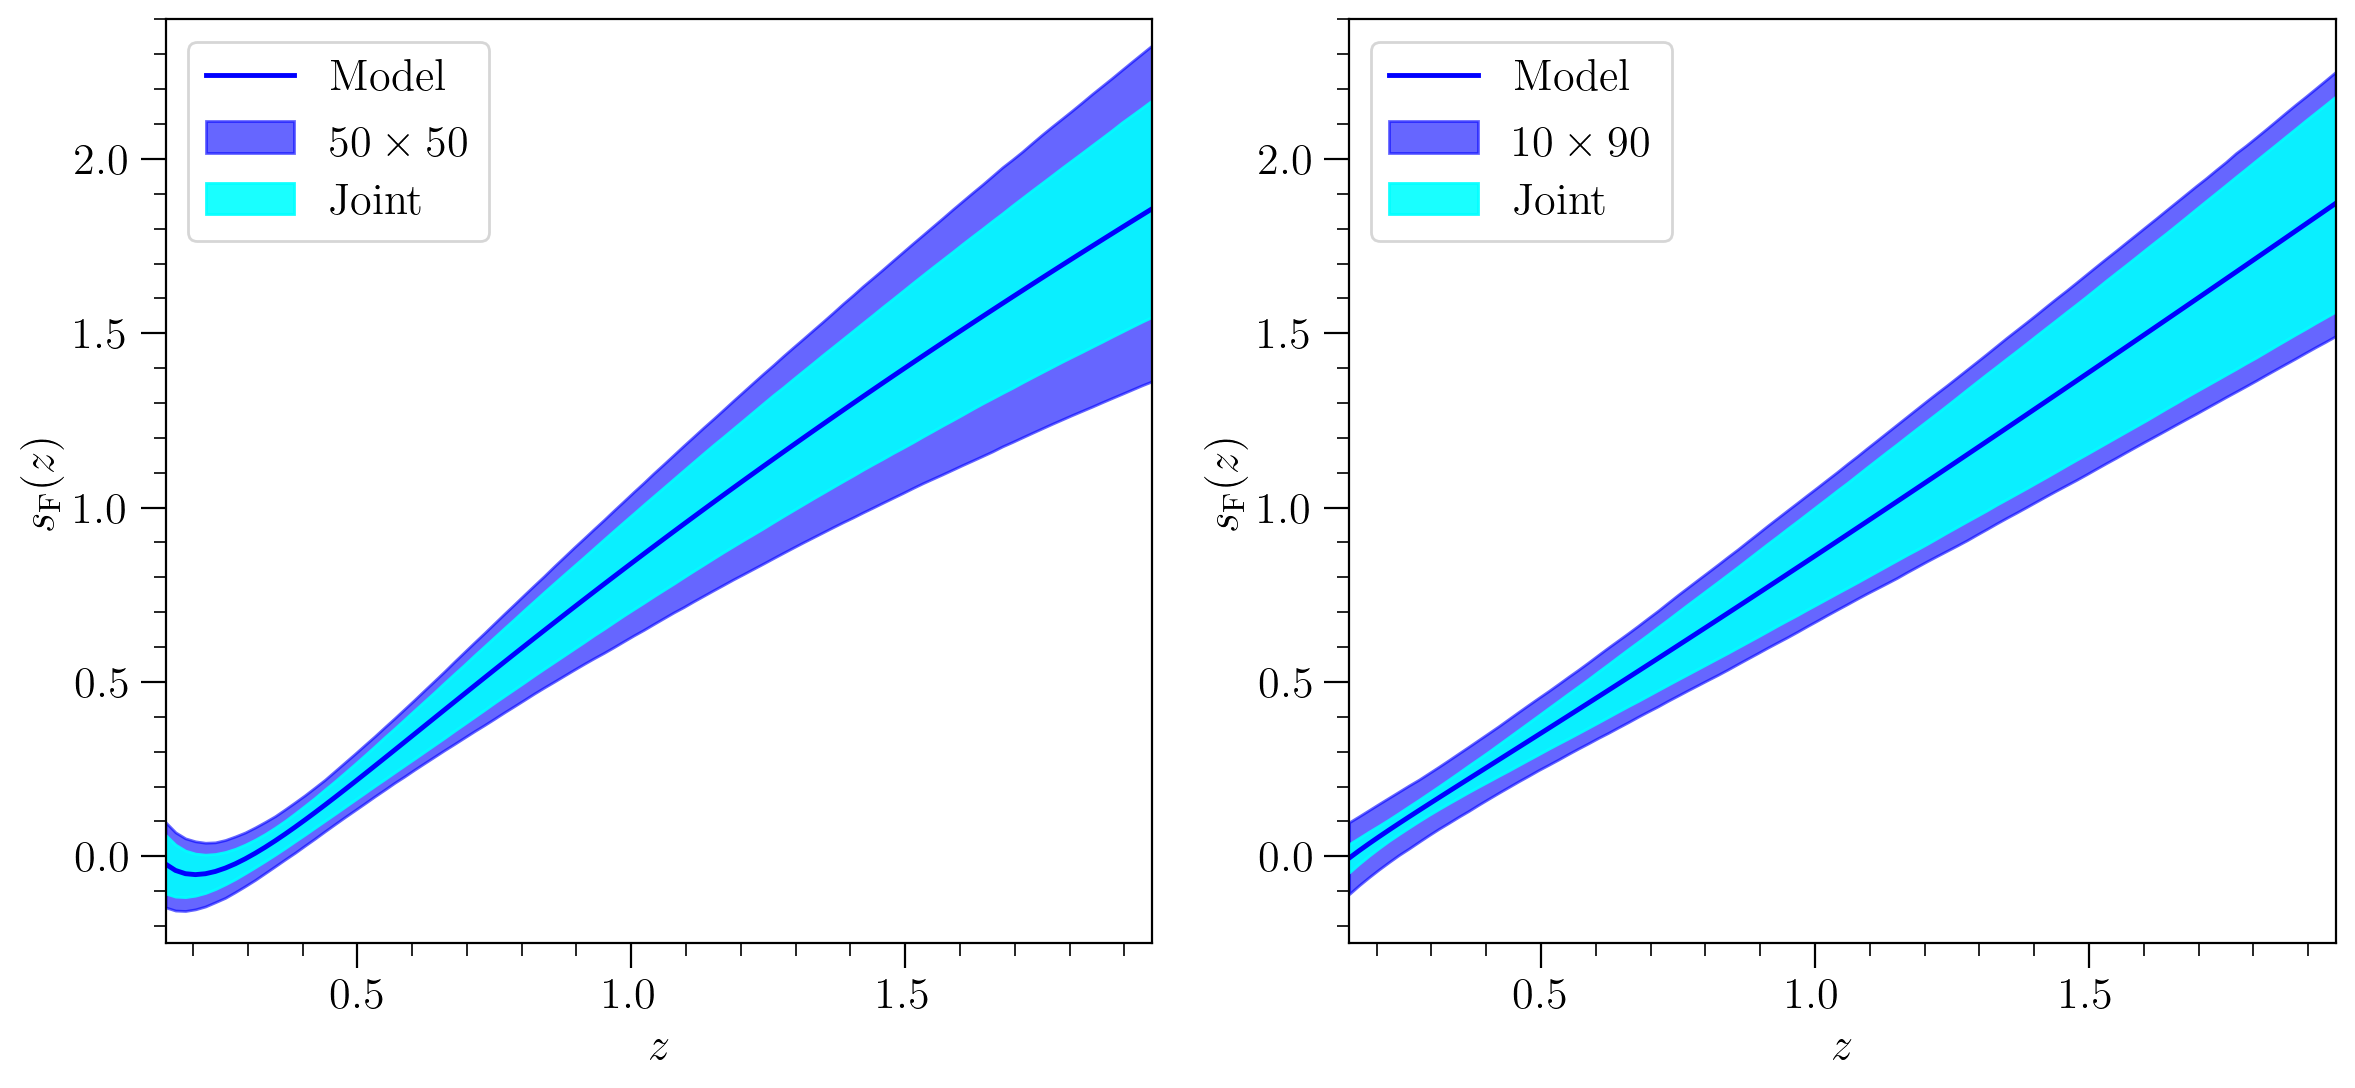

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sF_fid_50, '-', color = 'blue', label = 'Model')
#ax[0].fill_between(z_lin, sF_50_lower_bound_priors_, sF_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sF_50_lower_bound, sF_50_upper_bound, color='blue', alpha=0.6, label = r'$50\times 50$')
ax[0].fill_between(z_lin, sF_50_Joint_lower_bound_, sF_50_Joint_upper_bound_, color='cyan', alpha=0.9, label = r'Joint')

ax[1].plot(z_lin, sF_fid_10, '-', color = 'blue', label = 'Model')
#ax[1].fill_between(z_lin, sF_10_lower_bound_priors_, sF_10_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, sF_10_lower_bound, sF_10_upper_bound, color='blue', alpha=0.6, label = r'$10\times 90$')
ax[1].fill_between(z_lin, sF_10_Joint_lower_bound_, sF_10_Joint_upper_bound_, color='cyan', alpha=0.9, label =  r'Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(-0.25, 2.4)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$s_\mathrm{F}(z)$')
    axi.legend(loc='upper left')
    
#plt.savefig("plots/sF_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

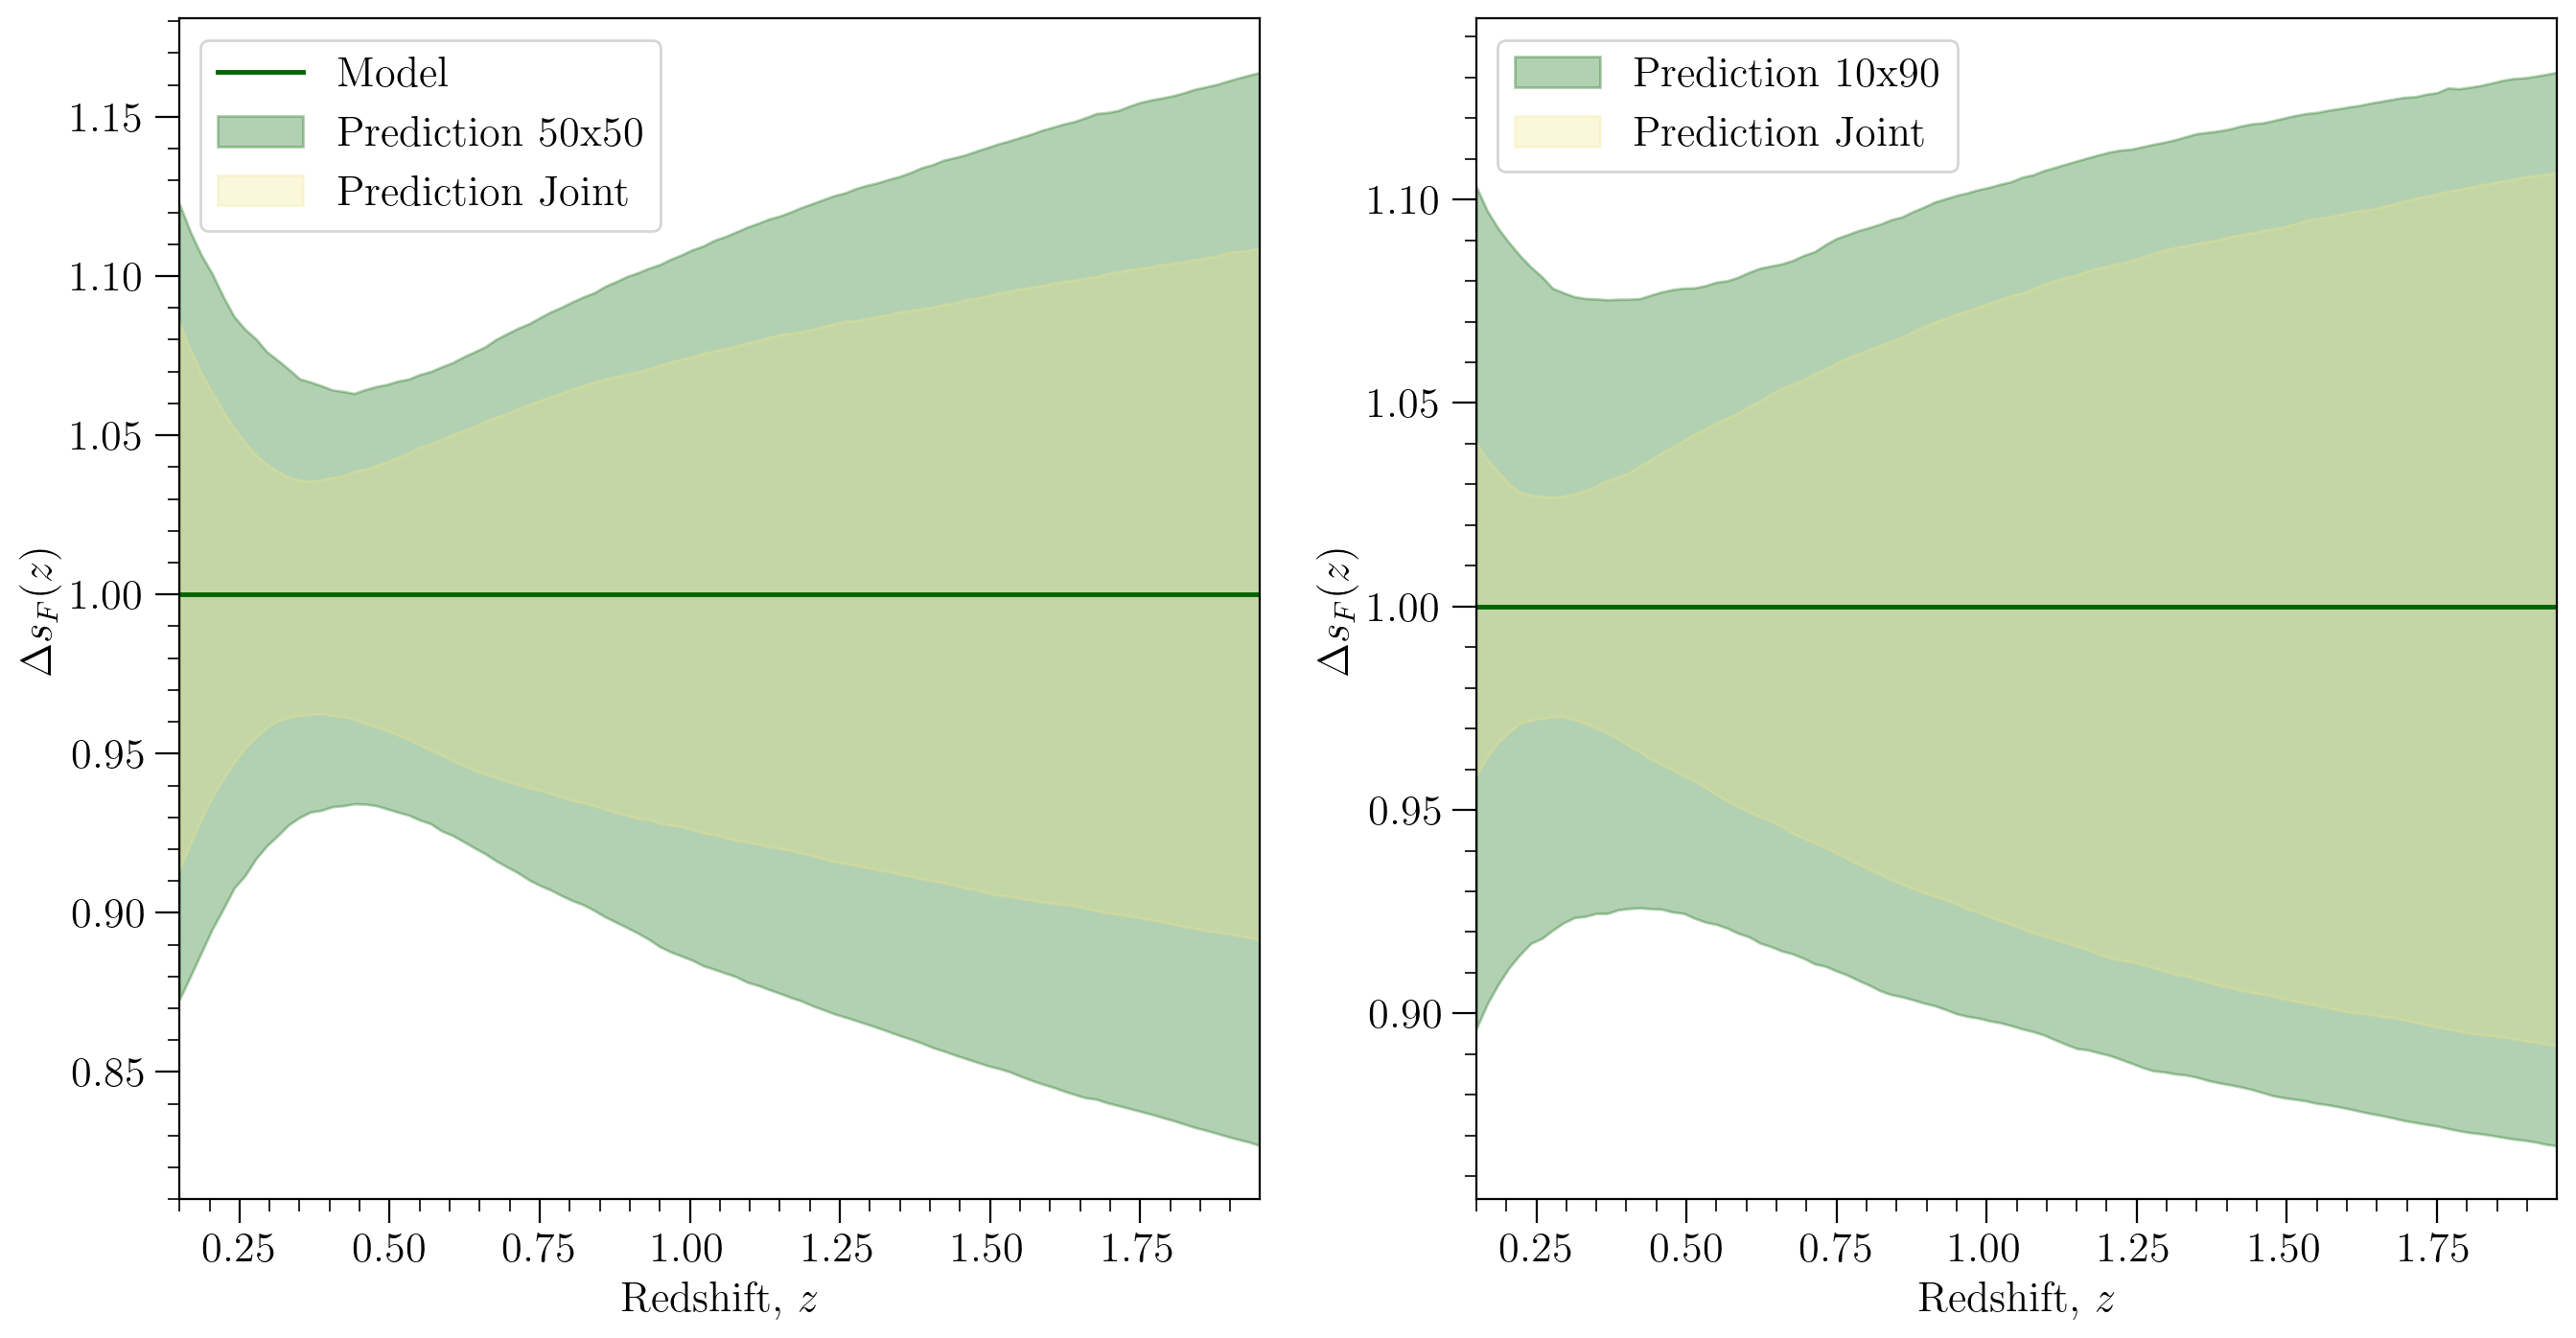

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, sF_fid_50/sF_fid_50, '-', color = 'darkgreen', label = 'Model')
#ax[0].fill_between(z_lin, sF_50_lower_bound_priors_, sF_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (sF_50_lower_bound+1)/(sF_fid_50+1), (sF_50_upper_bound+1)/(sF_fid_50+1), color='darkgreen', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (sF_50_Joint_lower_bound_+1)/(sF_fid_50+1), (sF_50_Joint_upper_bound_+1)/(sF_fid_50+1), color='khaki', alpha=0.3, label = 'Prediction Joint')

ax[1].plot(z_lin, sF_fid_10/sF_fid_10, '-', color = 'darkgreen')
#ax[1].fill_between(z_lin, sF_10_lower_bound_priors_, sF_10_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (sF_10_lower_bound+1)/(sF_fid_10+1), (sF_10_upper_bound+1)/(sF_fid_10+1), color='darkgreen', alpha=0.3, label = 'Prediction 10x90')
ax[1].fill_between(z_lin, (sF_10_Joint_lower_bound_+1)/(sF_fid_10+1), (sF_10_Joint_upper_bound_+1)/(sF_fid_10+1), color='khaki', alpha=0.3, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    #axi.set_ylim(-1.0, 3.5)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$\Delta s_F(z)$')
    axi.legend(loc='upper left')

## Number evolution

In [99]:
def nevol_fit(params, x):
    a, b, c, d = params
    return a + b * x + c * (1/x) + d * np.exp(-x)

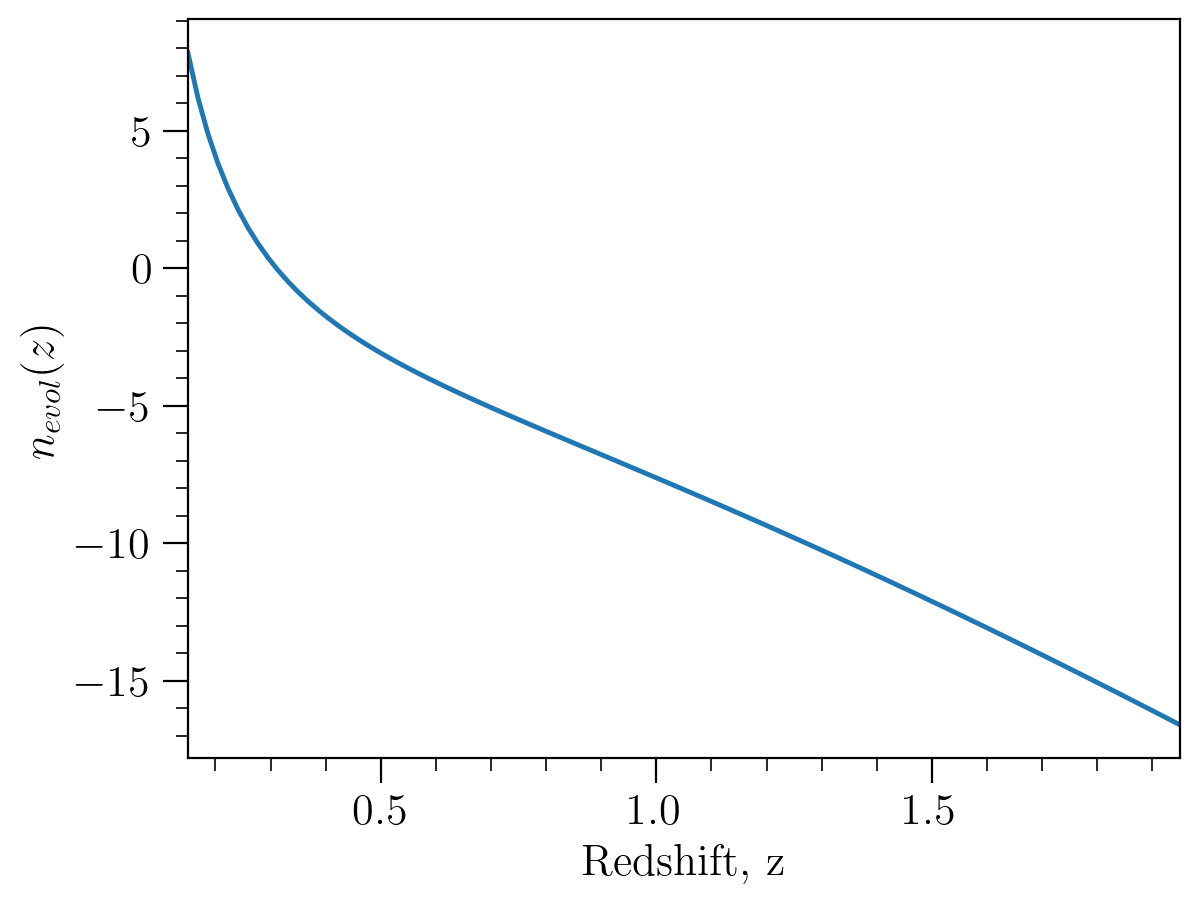

In [100]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)
m_split = 2.

num_evol_fid = nevol_fit(num_fit, z_lin)

plt.plot(z_lin, num_evol_fid, '-')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, z');
plt.ylabel(r'$n_{evol}(z)$');
#plt.title('Fitting model for the number desnsitiy evolution');

In [101]:
# Select the marginalized covariance matrix for the number evolution

cov_50_numevol = Sigma_Matrix_50[8:12,8:12]
cov_30_numevol = Sigma_Matrix_10[8:12,8:12]



# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 5000

nevol_50_pars_samples = np.random.multivariate_normal(num_fit, cov_50_numevol, num_samples)
nevol_10_pars_samples = np.random.multivariate_normal(num_fit, cov_30_numevol, num_samples)


# Evaluate fitting function for each parameter sample
nevol_50_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_50_pars_samples])
nevol_10_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_10_pars_samples])

# Calculate the 68% confidence interval
nevol_50_lower_bound = np.percentile(nevol_50_samples, 16, axis=0)
nevol_50_upper_bound = np.percentile(nevol_50_samples, 84, axis=0)
nevol_10_lower_bound = np.percentile(nevol_10_samples, 16, axis=0)
nevol_10_upper_bound = np.percentile(nevol_10_samples, 84, axis=0)

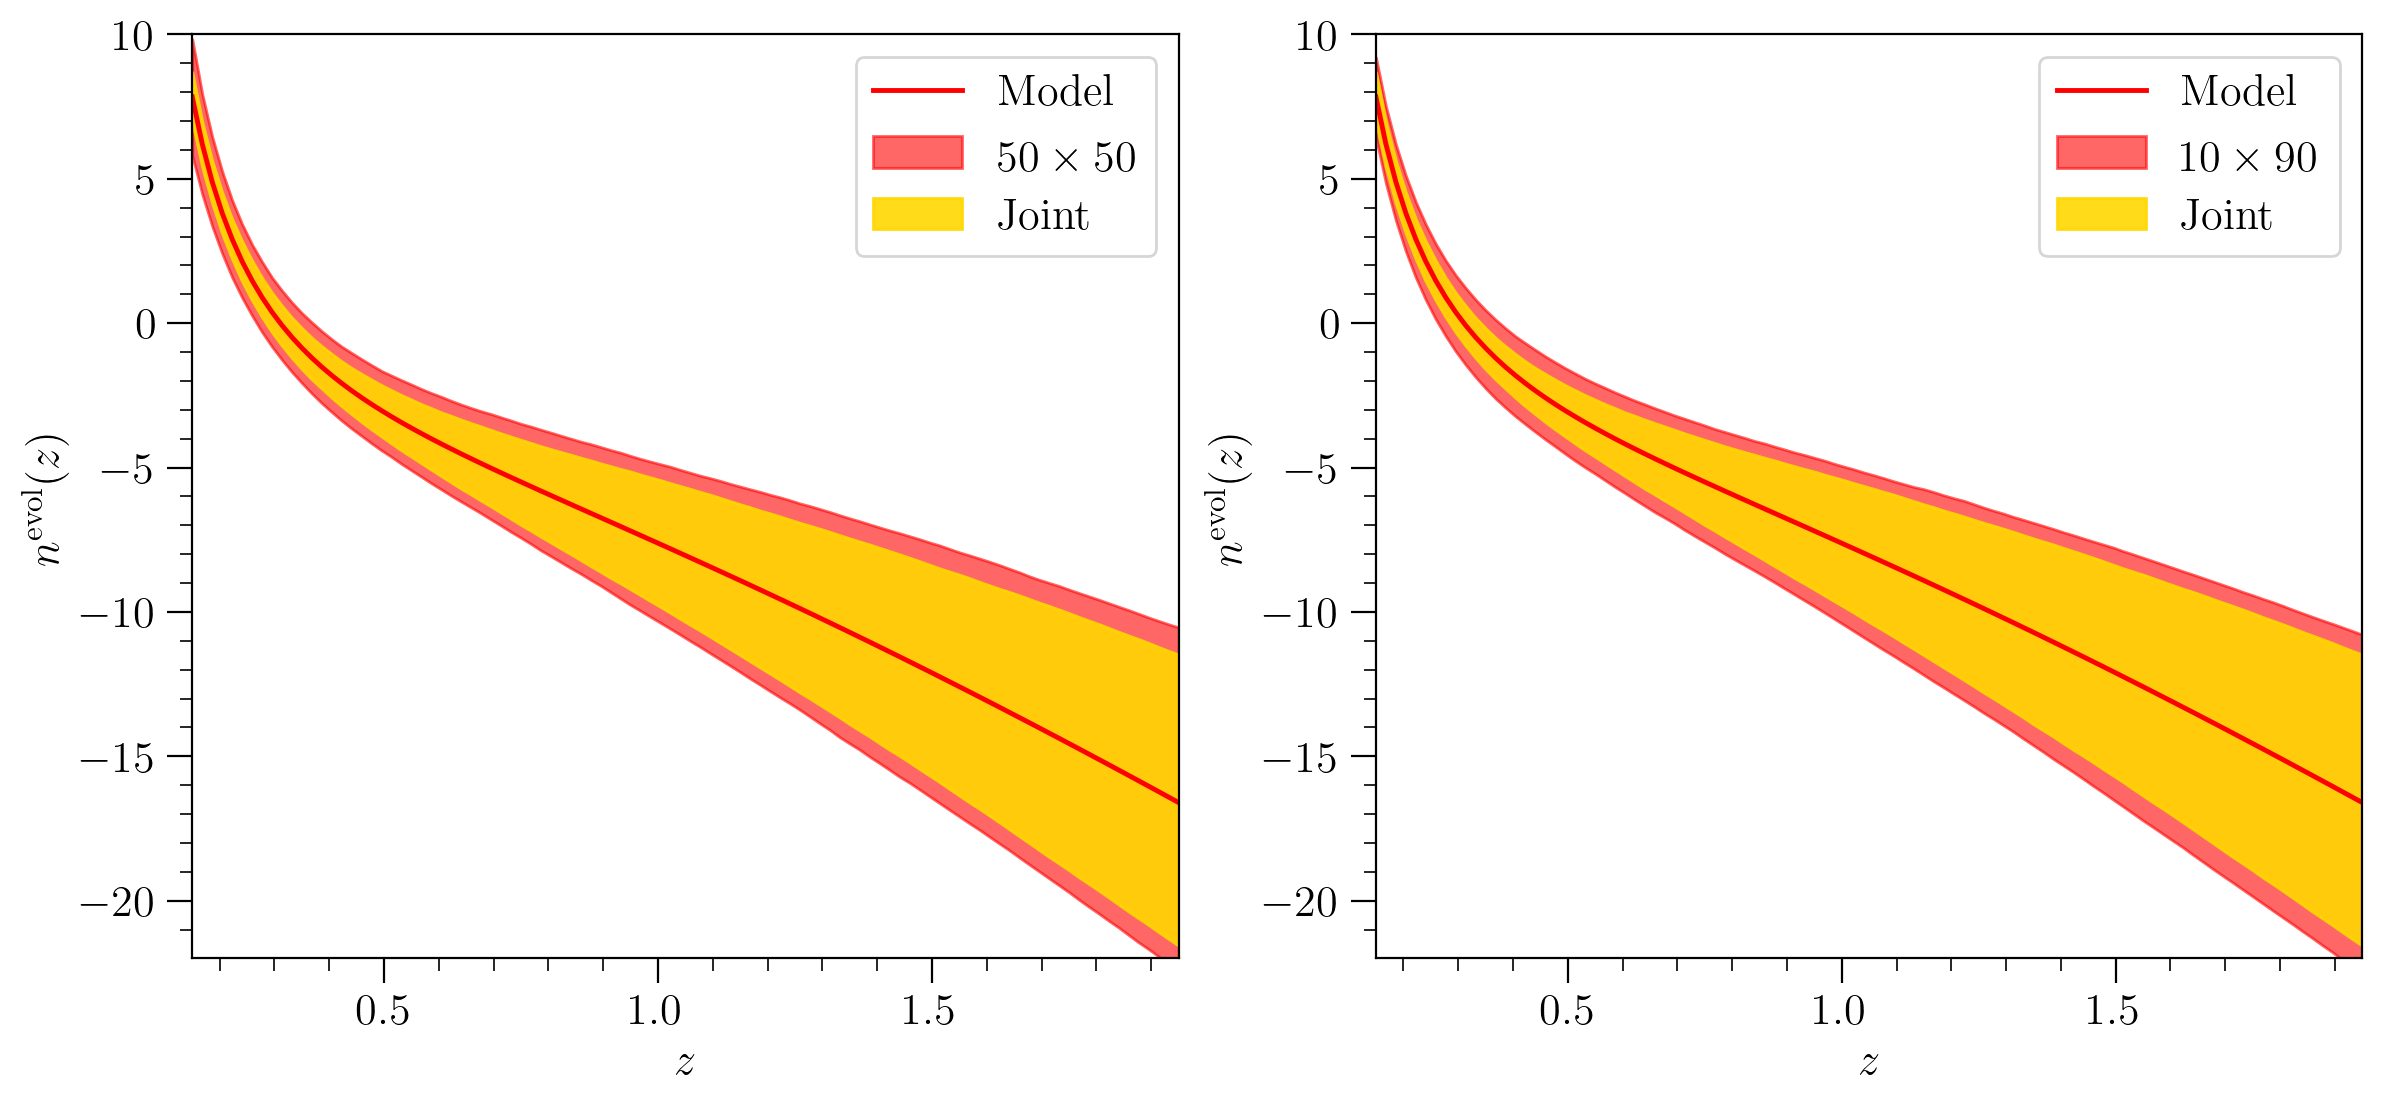

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, num_evol_fid, '-', color = 'red', label = 'Model')
#ax[0].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, nevol_50_lower_bound, nevol_50_upper_bound, color='red', alpha=0.6, label = r'$50\times 50$')
ax[0].fill_between(z_lin, nevol_Joint_lower_bound, nevol_Joint_upper_bound, color='gold', alpha=0.9, label = 'Joint')

ax[1].plot(z_lin, num_evol_fid, '-', color = 'red', label = 'Model')
#ax[1].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, nevol_10_lower_bound, nevol_10_upper_bound, color='red', alpha=0.6, label = r'$10\times 90$')
ax[1].fill_between(z_lin, nevol_Joint_lower_bound, nevol_Joint_upper_bound, color='gold', alpha=0.9, label = 'Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(-22,10)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$n^\mathrm{evol}(z)$')
    axi.legend(loc='upper right')
    
#plt.savefig("plots/nevol_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

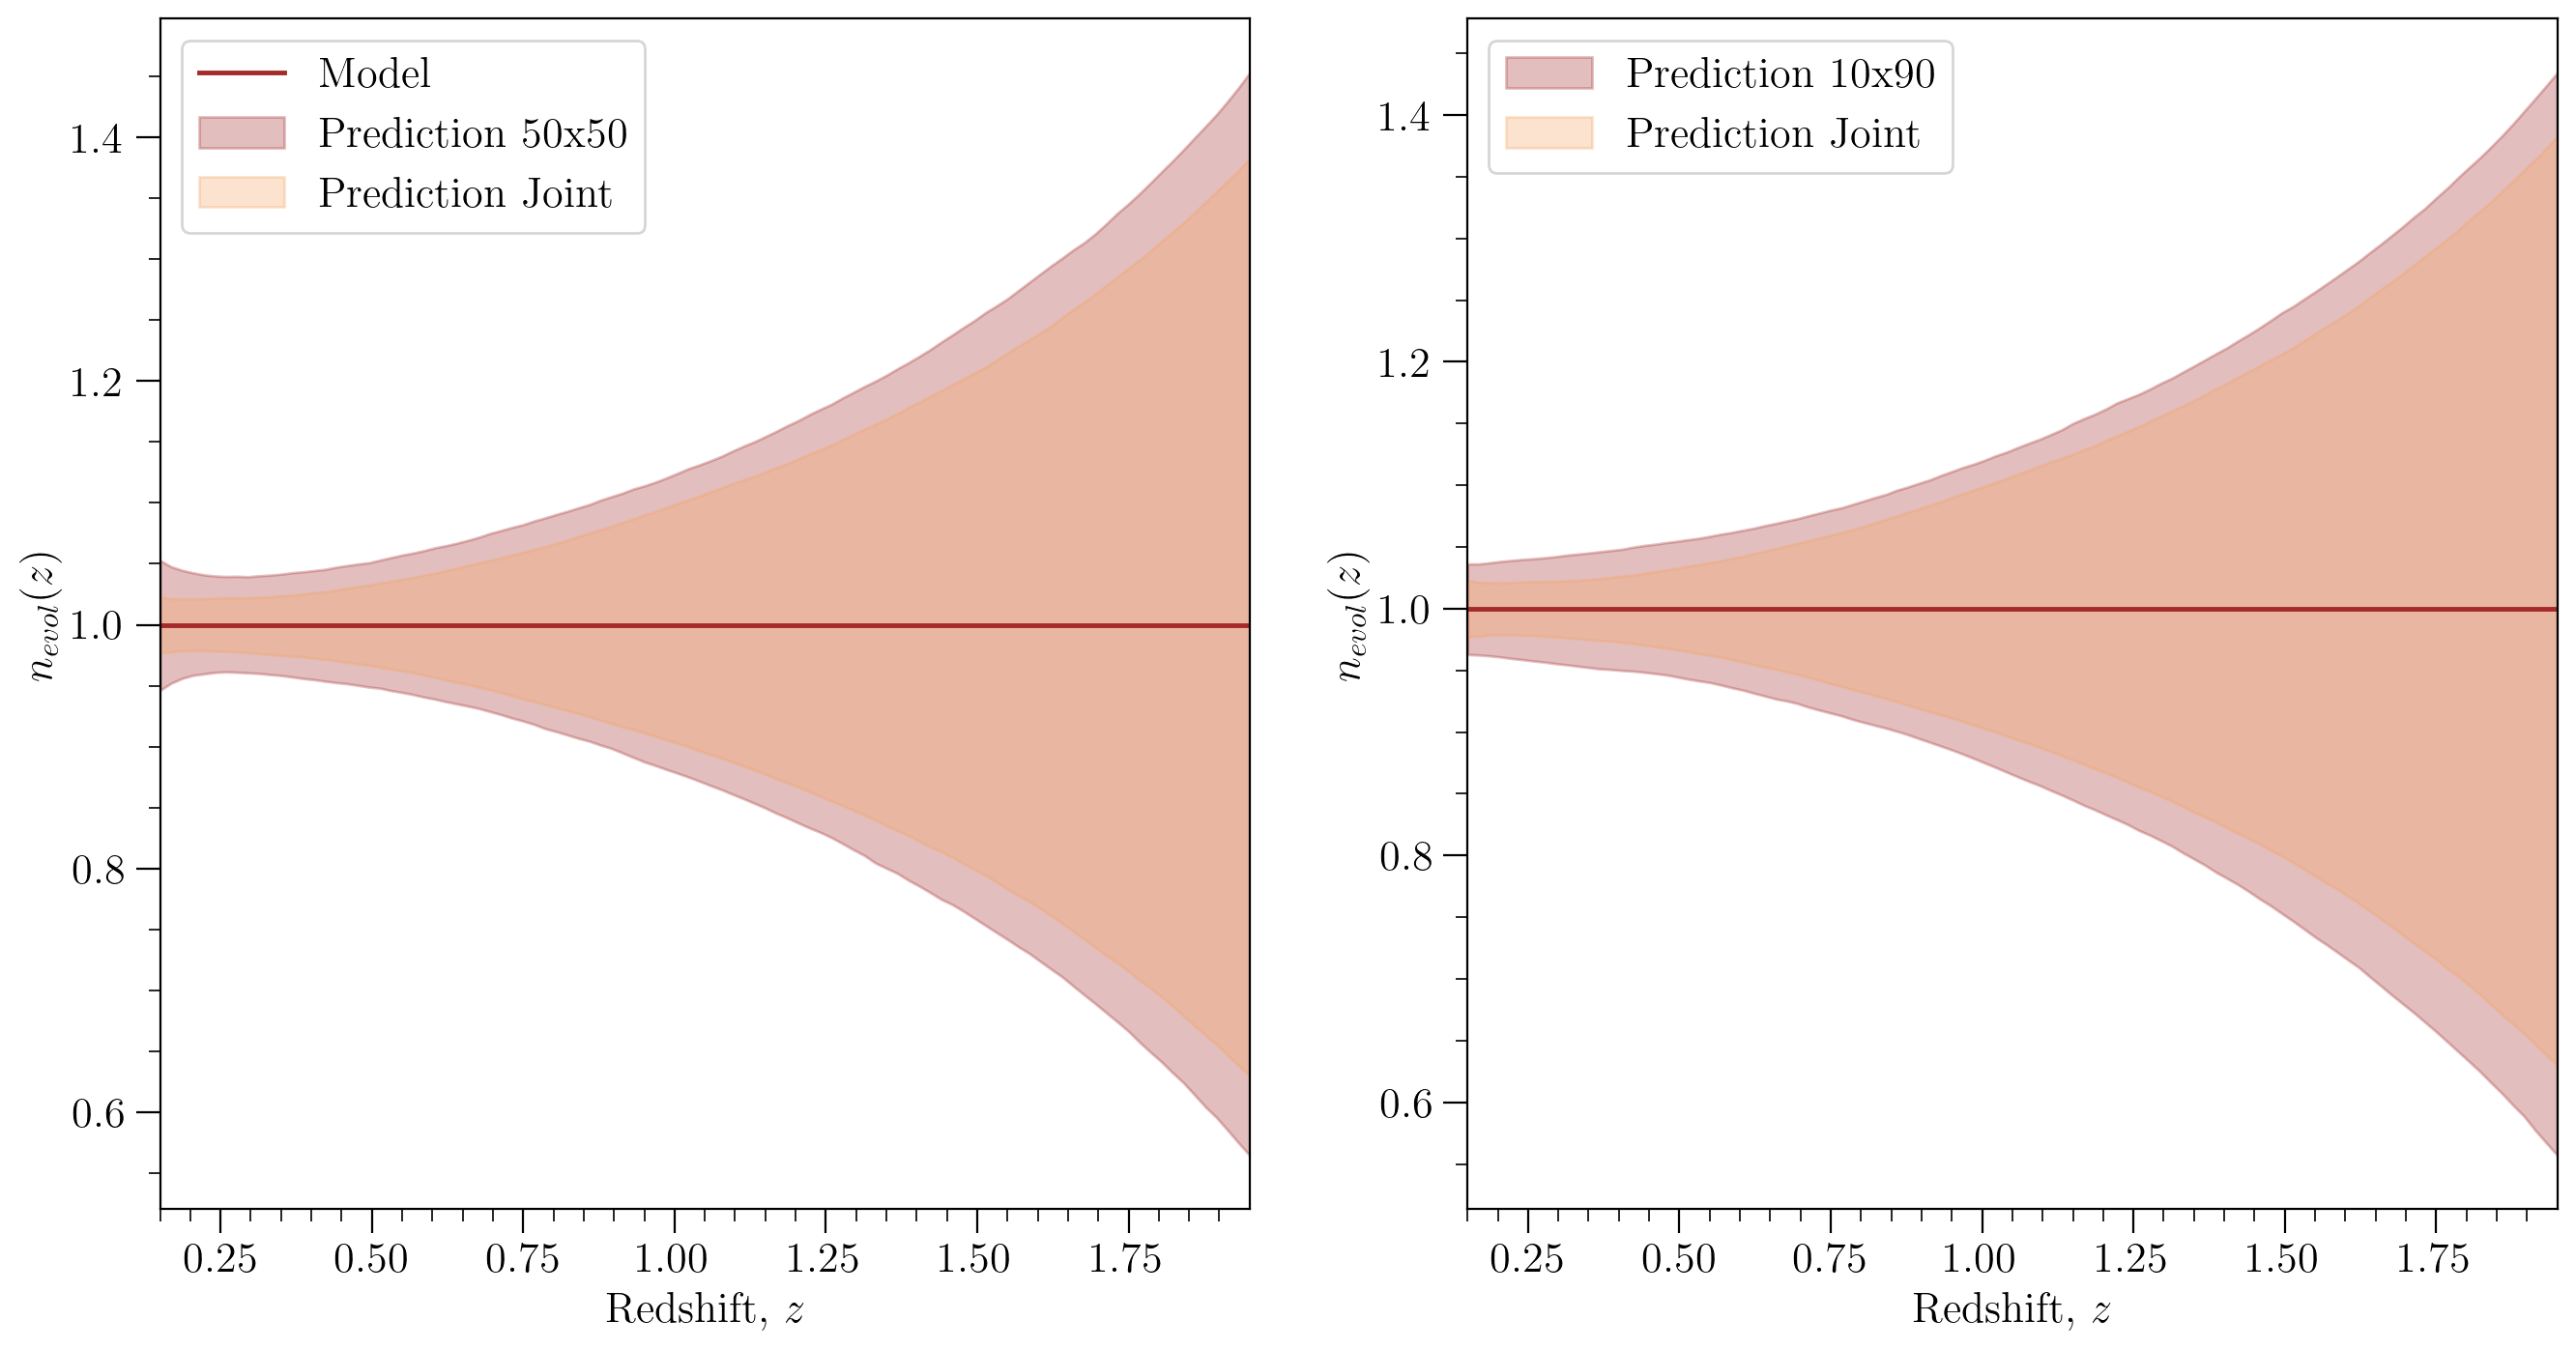

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, num_evol_fid/num_evol_fid, '-', color = 'brown', label = 'Model')
#ax[0].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (nevol_50_lower_bound+30)/(num_evol_fid+30), (nevol_50_upper_bound+30)/(num_evol_fid+30), color='brown', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (nevol_Joint_lower_bound+30)/(num_evol_fid+30), (nevol_Joint_upper_bound+30)/(num_evol_fid+30), color='sandybrown', alpha=0.3, label = 'Prediction Joint')

ax[1].plot(z_lin, num_evol_fid/num_evol_fid, '-', color = 'brown')
#ax[1].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (nevol_10_lower_bound+30)/(num_evol_fid+30), (nevol_10_upper_bound+30)/(num_evol_fid+30), color='brown', alpha=0.3, label = 'Prediction 10x90')
ax[1].fill_between(z_lin, (nevol_Joint_lower_bound+30)/(num_evol_fid+30), (nevol_Joint_upper_bound+30)/(num_evol_fid+30), color='sandybrown', alpha=0.3, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$n_{evol}(z)$')
    axi.legend(loc='upper left')

## Evolution bias

The evolution bias is computed from the magnification biases and the evolution of the number densities.

$$ f^{evol}_{B}(z) = -\frac{d\log{N_B(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_B(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) - \frac{5}{2}s_B(z)\,\frac{d\log{F_c}}{d\log{(1+z)}} $$

$$ f^{evol}_{F}(z) = -\frac{d\log{N_F(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_F(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) 
    - \frac{5}{2}\left[\frac{\bar{N}}{\bar{N}_F}\,s_{model}(z)\frac{d\log{F_*}}{d\log{(1+z)}}-\frac{\bar{N}_B}{\bar{N}_F}\,s_B(z)\frac{d\log{F_c}}{d\log{(1+z)}}\right] $$

We have all the ingredients defined as methods in the EvolutionBias class. We need to extract the relevant terms and then sample togeter the $n_{evol}$ and magnification bias parameters to construct the predictions for each evolution bias. 

In [104]:
from biasmodels import EvolutionBias

In [105]:
myEvolBias_50 = EvolutionBias(n_split=m_50)
myEvolBias_10 = EvolutionBias(n_split=m_10)


dlogH = myEvolBias_50.dlogH
rHterm = myEvolBias_50.rHterm
dFstar = myEvolBias_50.dLogFstar
dFcut = myEvolBias_50.dLogFcut

In [106]:
def fevol_bright(pars_s, pars_n, z):
    pars_sB = pars_s[:4] 
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*magbias_fit(params=pars_sB, x=z))*rHterm(z) - 5*magbias_fit(params=pars_sB, x=z) - 5/2*magbias_fit(params=pars_sB, x=z)*dFcut(z)
    
def fevol_faint(pars_s, pars_n, z):
    
    pars_sB = pars_s[:4]
    pars_sM = pars_s[4:]
    s_B = magbias_fit(params=pars_sB, x=z)
    s_M = magbias_fit(params=pars_sM, x=z)
    s_faint = s_M*m_split/(m_split-1) - s_B/(m_split-1)
    
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*s_faint)*rHterm(z) - 5*s_faint + 5/2*((1/(m_split-1)) * s_B *dFcut(z) - (m_split/(m_split-1)) * s_M *dFstar(z))

In [107]:
sbias_fid_50 = np.concatenate([sB_4fit50, sM_4fit])
sbias_fid_10 = np.concatenate([sB_4fit10, sM_4fit])

np.shape(sbias_fid_50), np.shape(sbias_fid_10)

((8,), (8,))

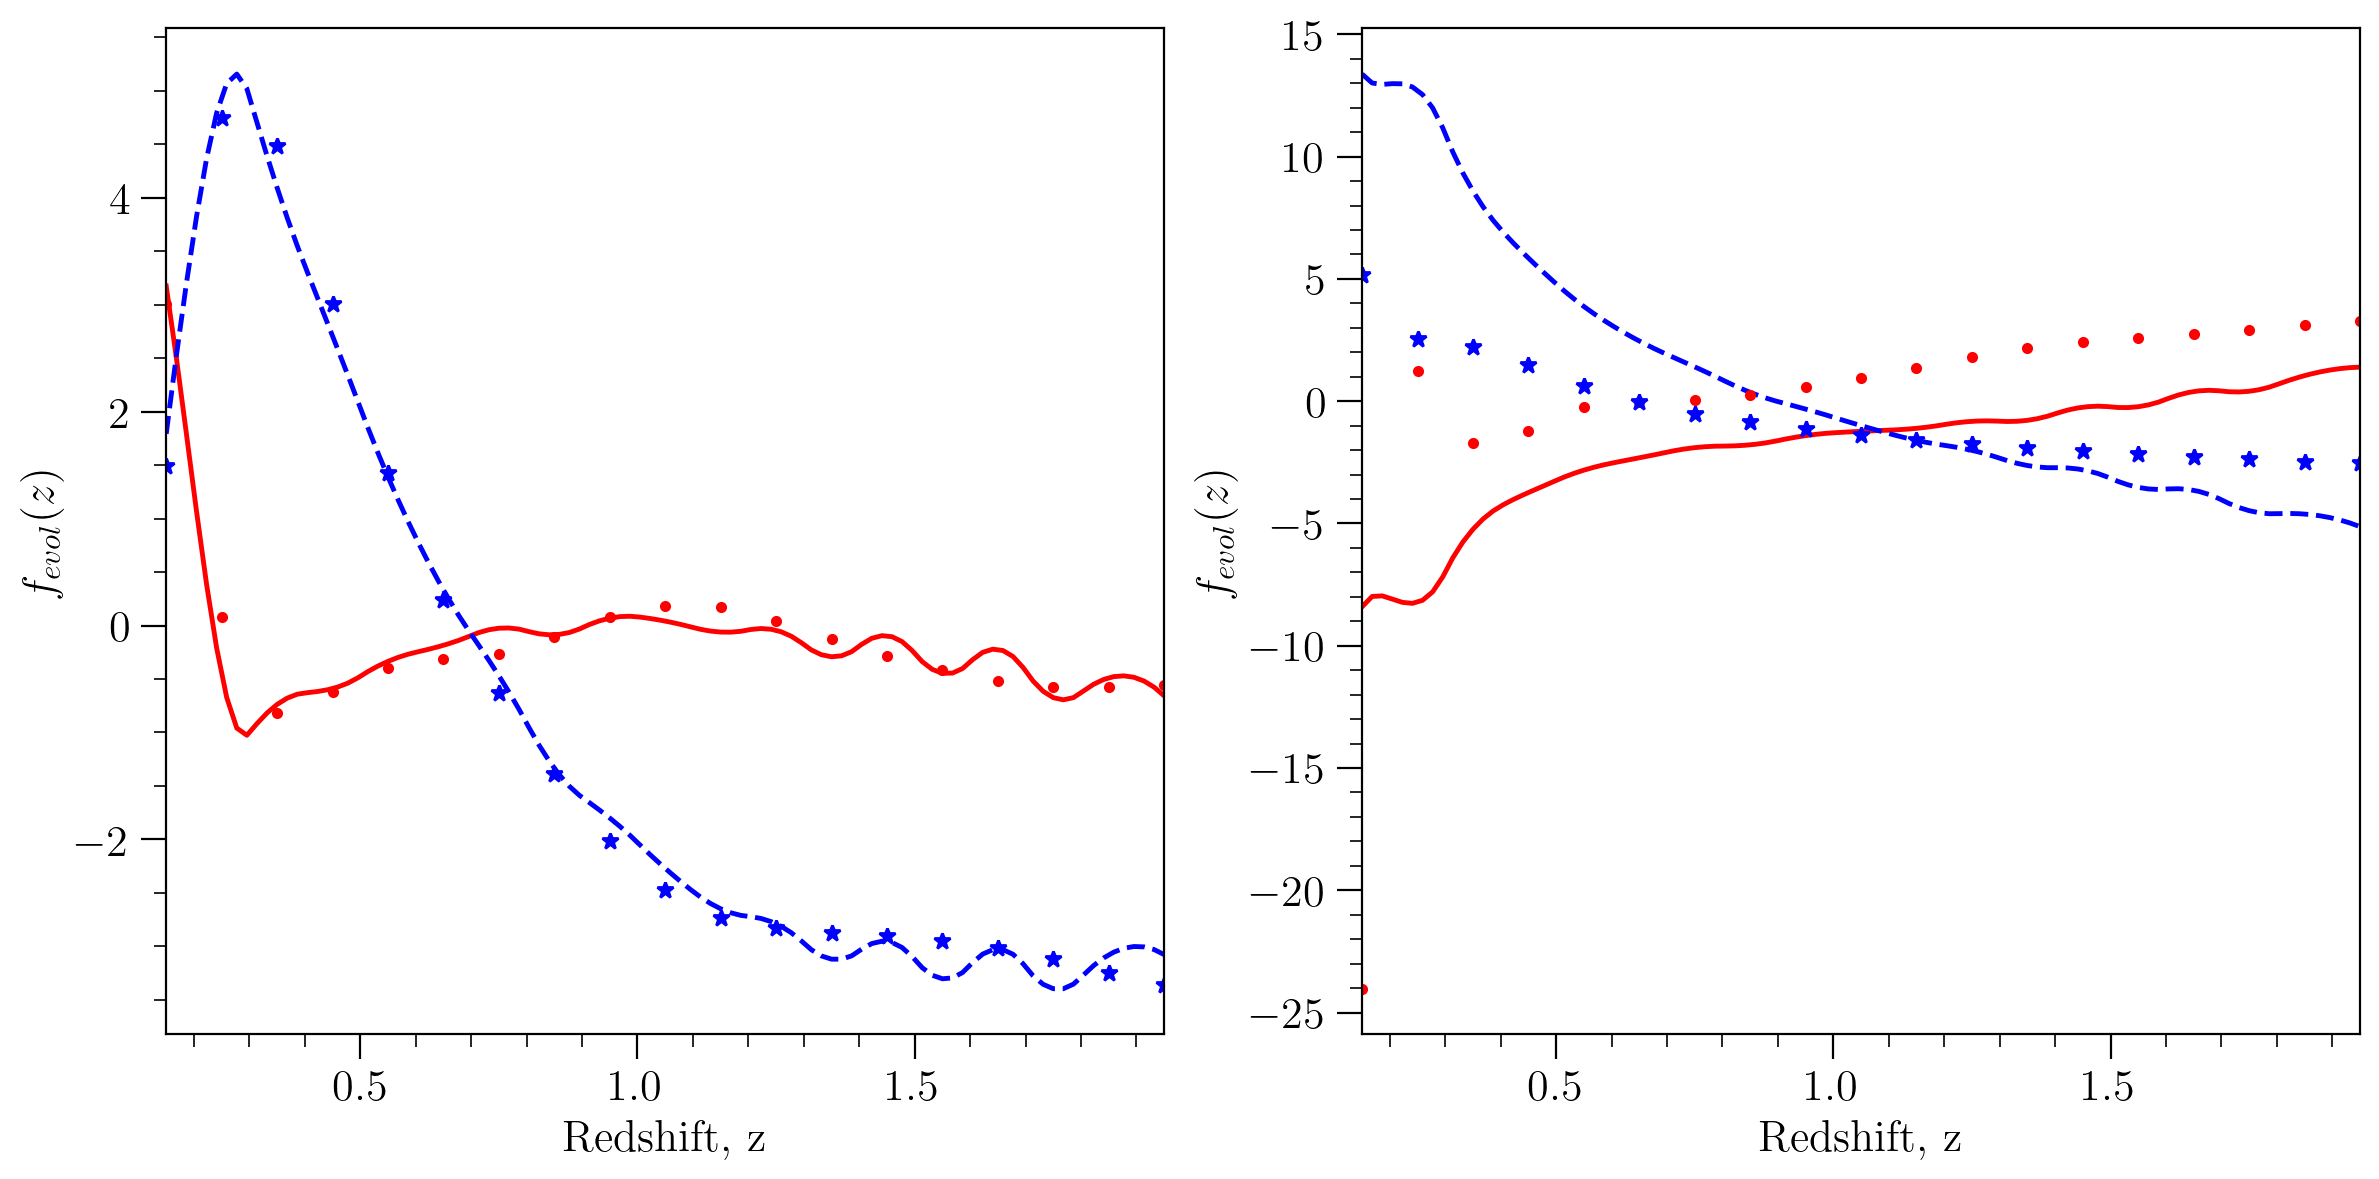

In [108]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

fevol_50_B_fid = fevol_bright(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)
fevol_50_F_fid = fevol_faint(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)

fevol_10_B_fid = fevol_bright(pars_s = sbias_fid_10, pars_n = num_fit, z = z_lin)
fevol_10_F_fid = fevol_faint(pars_s = sbias_fid_10, pars_n = num_fit, z = z_lin)

feB_50 = myEvolBias_50.fevol_bright(z_bins)
feF_50 = myEvolBias_50.fevol_faint(z_bins)

feB_10 = myEvolBias_10.fevol_bright(z_bins)
feF_10 = myEvolBias_10.fevol_faint(z_bins)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, 'r-')
ax[0].plot(z_lin, fevol_50_F_fid, 'b--')
ax[0].plot(z_bins, feB_50, 'r.', label='Bright')
ax[0].plot(z_bins, feF_50, 'b*', label='Faint')

ax[1].plot(z_lin, fevol_10_B_fid, 'r-')
ax[1].plot(z_lin, fevol_10_F_fid, 'b--')
ax[1].plot(z_bins, feB_10, 'r.', label='Bright')
ax[1].plot(z_bins, feF_10, 'b*', label='Faint')

for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlabel(r'Redshift, z');
    axi.set_ylabel(r'$f_{evol}(z)$');

In [109]:
all_50_fid = np.concatenate([sB_4fit50, sM_4fit, num_fit])
all_10_fid = np.concatenate([sB_4fit10, sM_4fit, num_fit])

np.shape(all_50_fid), np.shape(all_10_fid)

((12,), (12,))

In [110]:
# Select the marginalized covariance matrix for the parameters

cov_Joint_all = Sigma_Matrix_Joint50x10[:16, :16]
cov_all_priors = Cov_prior_all[:16, :16]

all_fid = np.concatenate([sbias_fid, num_fit])

# Generate parameter samples from multivariate normal distribution

#np.random.seed(18)

num_samples = 5000

all_Joint_pars_samples = np.random.multivariate_normal(all_fid, cov_Joint_all, num_samples)
all_pars_samples_priors = np.random.multivariate_normal(all_fid, cov_all_priors, num_samples)

nind_50 = list(range(4,8))

all_Joint_50_pars_samples = all_Joint_pars_samples
all_Joint_50_pars_samples = np.delete(all_Joint_50_pars_samples, nind_50, axis=1)
all_50_pars_samples_priors = all_pars_samples_priors
all_50_pars_samples_priors = np.delete(all_50_pars_samples_priors, nind_50, axis=1)

nind_10 = list(range(0,4))

all_Joint_10_pars_samples = all_Joint_pars_samples
all_Joint_10_pars_samples = np.delete(all_Joint_10_pars_samples, nind_10, axis=1)
all_10_pars_samples_priors = all_pars_samples_priors
all_10_pars_samples_priors = np.delete(all_10_pars_samples_priors, nind_10, axis=1)

In [111]:
# Evaluate fitting function for each parameter sample

fevol_Joint_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_B_samples_priors = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors])
fevol_Joint_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_F_samples_priors = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors])

fevol_Joint_10_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_10_pars_samples])
fevol_Joint_10_B_samples_priors = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples_priors])
fevol_Joint_10_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_10_pars_samples])
fevol_Joint_10_F_samples_priors = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples_priors])

# Calculate the 68% confidence intervals

fevol_B_50_lower_bound = np.percentile(fevol_Joint_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound = np.percentile(fevol_Joint_50_B_samples, 84, axis=0)
fevol_B_50_lower_bound_priors = np.percentile(fevol_Joint_50_B_samples_priors, 16, axis=0)
fevol_B_50_upper_bound_priors = np.percentile(fevol_Joint_50_B_samples_priors, 84, axis=0)

fevol_F_50_lower_bound = np.percentile(fevol_Joint_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound = np.percentile(fevol_Joint_50_F_samples, 84, axis=0)
fevol_F_50_lower_bound_priors = np.percentile(fevol_Joint_50_F_samples_priors, 16, axis=0)
fevol_F_50_upper_bound_priors = np.percentile(fevol_Joint_50_F_samples_priors, 84, axis=0)

fevol_B_10_lower_bound = np.percentile(fevol_Joint_10_B_samples, 16, axis=0)
fevol_B_10_upper_bound = np.percentile(fevol_Joint_10_B_samples, 84, axis=0)
fevol_B_10_lower_bound_priors = np.percentile(fevol_Joint_10_B_samples_priors, 16, axis=0)
fevol_B_10_upper_bound_priors = np.percentile(fevol_Joint_10_B_samples_priors, 84, axis=0)

fevol_F_10_lower_bound = np.percentile(fevol_Joint_10_F_samples, 16, axis=0)
fevol_F_10_upper_bound = np.percentile(fevol_Joint_10_F_samples, 84, axis=0)
fevol_F_10_lower_bound_priors = np.percentile(fevol_Joint_10_F_samples_priors, 16, axis=0)
fevol_F_10_upper_bound_priors = np.percentile(fevol_Joint_10_F_samples_priors, 84, axis=0)

In [112]:
# Select the marginalized covariance matrix for the parameters

cov_50_all = Sigma_Matrix_50[:12, :12]
cov_10_all = Sigma_Matrix_10[:12, :12]
cov_50_priors = Cov_priors_50[:12, :12]
cov_10_priors = Cov_priors_10[:12, :12]
cov_Joint_all = Sigma_Matrix_Joint50x10[:16, :16]
cov_all_priors = Cov_prior_all[:16, :16]

# Generate parameter samples from multivariate normal distribution

num_samples = 5000

all_50_pars_samples = np.random.multivariate_normal(all_50_fid, cov_50_all, num_samples)
#all_50_pars_samples_priors_ = np.random.multivariate_normal(all_50_fid, cov_50_priors, num_samples)
all_10_pars_samples = np.random.multivariate_normal(all_10_fid, cov_10_all, num_samples)
#all_10_pars_samples_priors_ = np.random.multivariate_normal(all_10_fid, cov_10_priors, num_samples)

# Select the marginalized covariance matrix for the parameters

all_fid = np.concatenate([sbias_fid, num_fit])

# Generate parameter samples from multivariate normal distribution

all_Joint_pars_samples = np.random.multivariate_normal(all_fid, cov_Joint_all, num_samples)

nind_50 = list(range(4,8))

all_Joint_50_pars_samples = all_Joint_pars_samples
all_Joint_50_pars_samples = np.delete(all_Joint_50_pars_samples, nind_50, axis=1)

nind_10 = list(range(0,4))

all_Joint_10_pars_samples = all_Joint_pars_samples
all_Joint_10_pars_samples = np.delete(all_Joint_10_pars_samples, nind_10, axis=1)

In [113]:
# Evaluate fitting function for each parameter sample

fevol_Joint_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])

fevol_Joint_10_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_10_pars_samples])
fevol_Joint_10_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_10_pars_samples])

# Calculate the 68% confidence intervals

fevol_B_50_lower_bound = np.percentile(fevol_Joint_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound = np.percentile(fevol_Joint_50_B_samples, 84, axis=0)

fevol_F_50_lower_bound = np.percentile(fevol_Joint_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound = np.percentile(fevol_Joint_50_F_samples, 84, axis=0)

fevol_B_10_lower_bound = np.percentile(fevol_Joint_10_B_samples, 16, axis=0)
fevol_B_10_upper_bound = np.percentile(fevol_Joint_10_B_samples, 84, axis=0)

fevol_F_10_lower_bound = np.percentile(fevol_Joint_10_F_samples, 16, axis=0)
fevol_F_10_upper_bound = np.percentile(fevol_Joint_10_F_samples, 84, axis=0)

In [114]:
# Evaluate fitting function for each parameter sample

fevol_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples])
#fevol_50_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors_])
fevol_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples])
#fevol_50_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors_])

fevol_10_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples])
#fevol_10_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples_priors_])
fevol_10_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples])
#fevol_10_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_10_pars_samples_priors_])

# Calculate the 68% confidence intervals

fevol_B_50_lower_bound_ = np.percentile(fevol_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound_ = np.percentile(fevol_50_B_samples, 84, axis=0)
#fevol_B_50_lower_bound_priors_ = np.percentile(fevol_50_B_samples_priors_, 16, axis=0)
#fevol_B_50_upper_bound_priors_ = np.percentile(fevol_50_B_samples_priors_, 84, axis=0)

fevol_F_50_lower_bound_ = np.percentile(fevol_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound_ = np.percentile(fevol_50_F_samples, 84, axis=0)
#fevol_F_50_lower_bound_priors_ = np.percentile(fevol_50_F_samples_priors_, 16, axis=0)
#fevol_F_50_upper_bound_priors_ = np.percentile(fevol_50_F_samples_priors_, 84, axis=0)

fevol_B_10_lower_bound_ = np.percentile(fevol_10_B_samples, 16, axis=0)
fevol_B_10_upper_bound_ = np.percentile(fevol_10_B_samples, 84, axis=0)
#fevol_B_10_lower_bound_priors_ = np.percentile(fevol_10_B_samples_priors_, 16, axis=0)
#fevol_B_10_upper_bound_priors_ = np.percentile(fevol_10_B_samples_priors_, 84, axis=0)

fevol_F_10_lower_bound_ = np.percentile(fevol_10_F_samples, 16, axis=0)
fevol_F_10_upper_bound_ = np.percentile(fevol_10_F_samples, 84, axis=0)
#fevol_F_10_lower_bound_priors_ = np.percentile(fevol_10_F_samples_priors_, 16, axis=0)
#fevol_F_10_upper_bound_priors_ = np.percentile(fevol_10_F_samples_priors_, 84, axis=0)

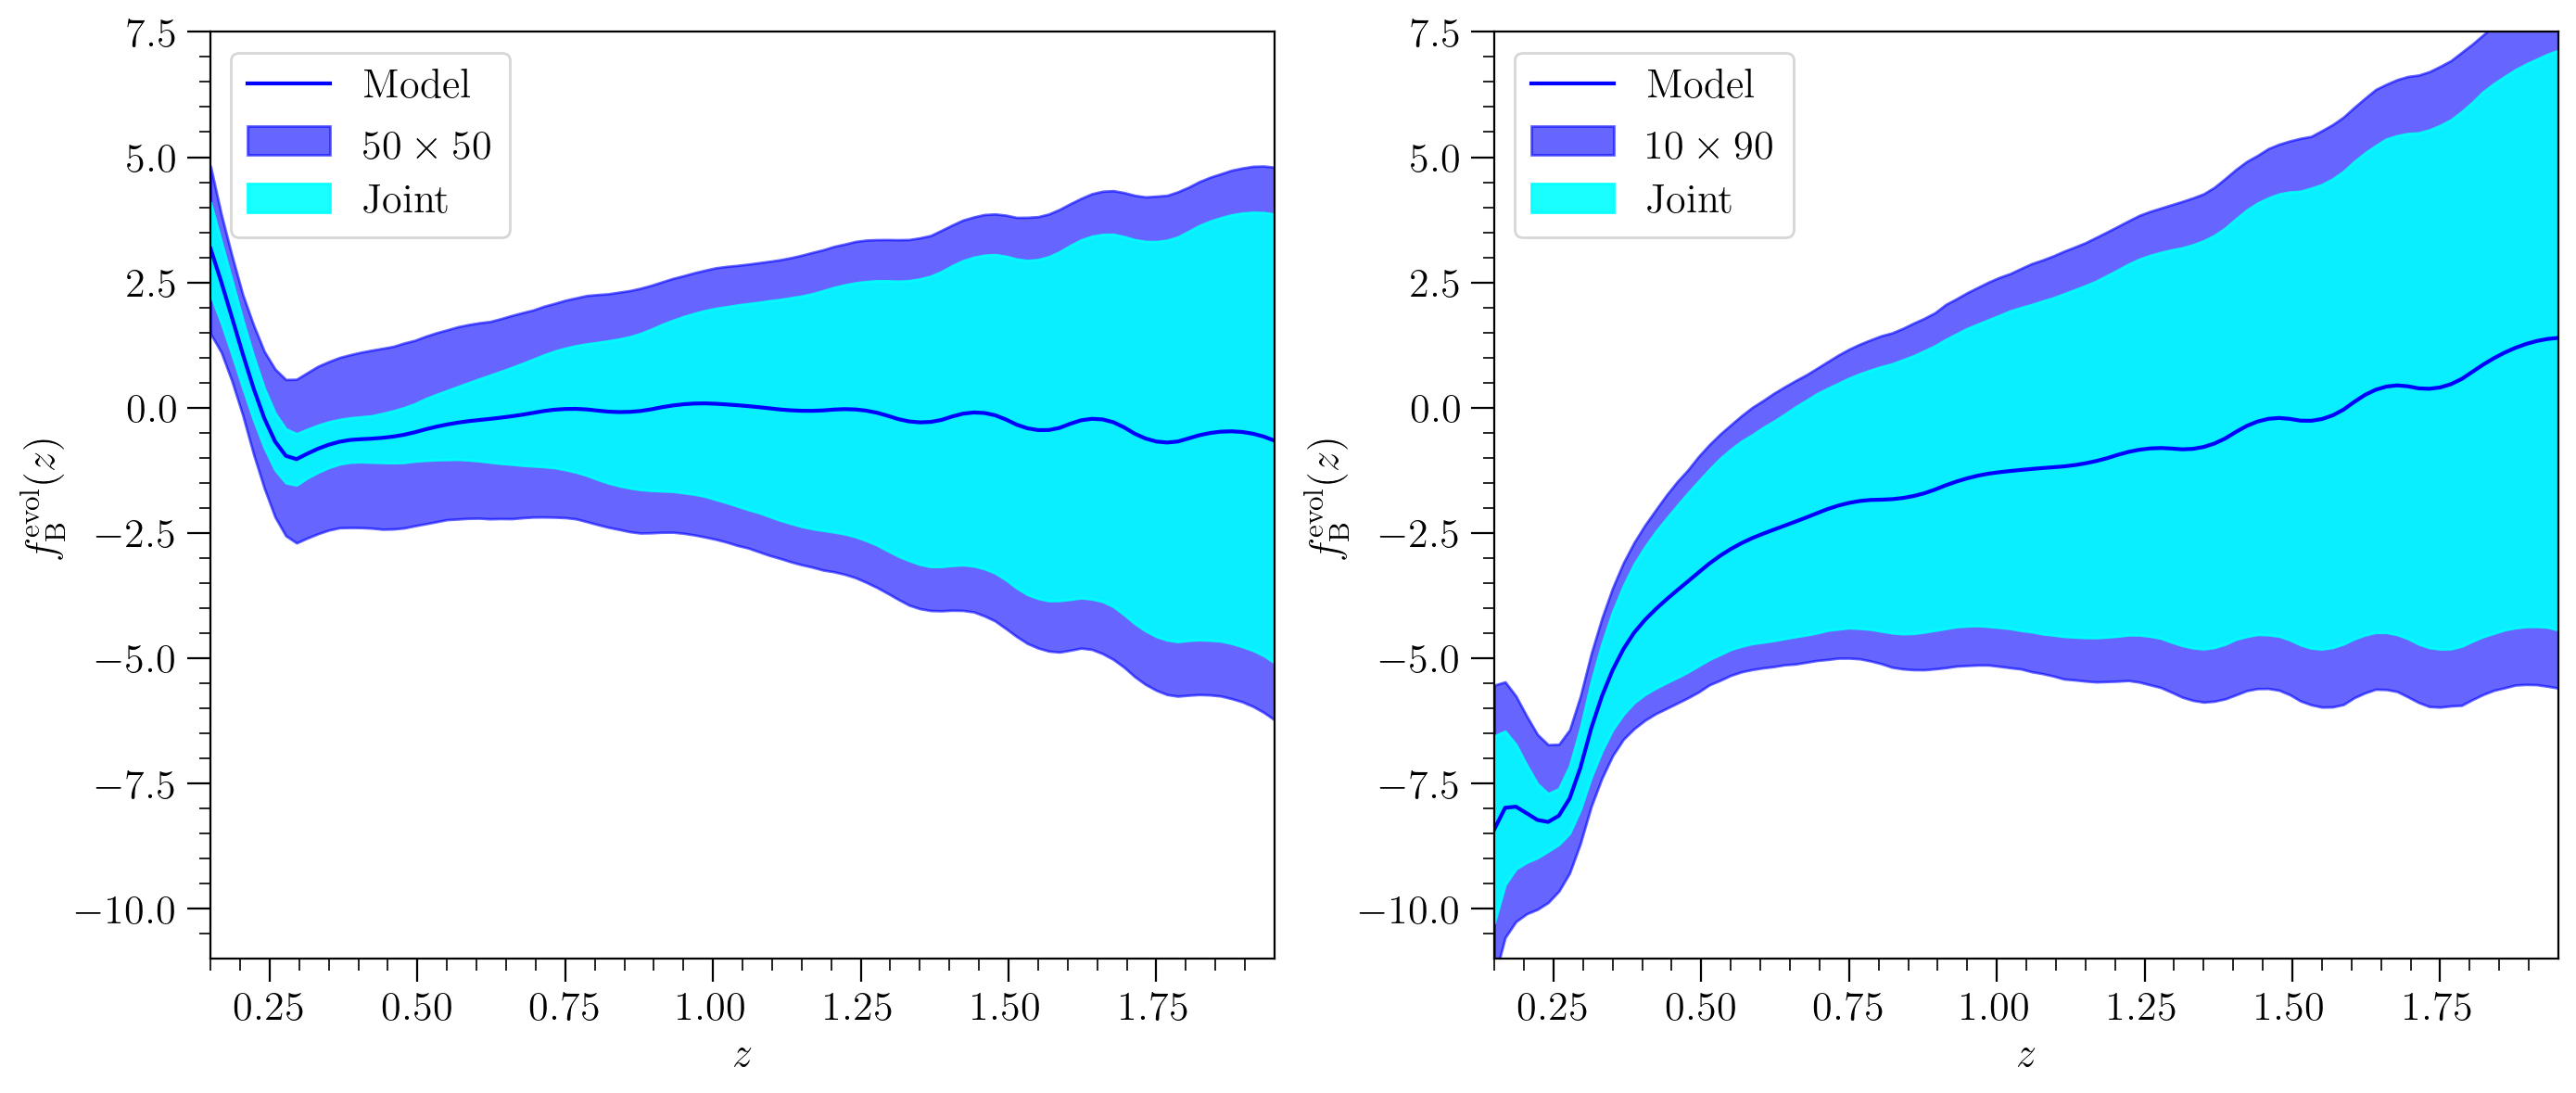

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, '-', color='blue', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feB_50, '*', color='black')
ax[1].plot(z_lin, fevol_10_B_fid, '-', color='blue', lw = 1.5, label = 'Model')
#ax[1].plot(z_bins, feB_10, '*', color='black')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, fevol_B_50_lower_bound_priors, fevol_B_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, fevol_B_50_lower_bound_, fevol_B_50_upper_bound_, color='blue', alpha=0.6, label = r'$50\times 50$')
ax[0].fill_between(z_lin, fevol_B_50_lower_bound, fevol_B_50_upper_bound, color='cyan', alpha=0.9, label = 'Joint')

#ax[1].fill_between(z_lin, fevol_B_10_lower_bound_priors, fevol_B_10_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, fevol_B_10_lower_bound_, fevol_B_10_upper_bound_, color='blue', alpha=0.6, label = r'$10\times 90$')
ax[1].fill_between(z_lin, fevol_B_10_lower_bound, fevol_B_10_upper_bound, color='cyan', alpha=0.9, label = 'Joint')

for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_ylim(-11.0, 7.5)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$f^\mathrm{evol}_\mathrm{B}(z)$')
    axi.legend(loc='upper left')
    
#plt.savefig("plots/fevolB_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

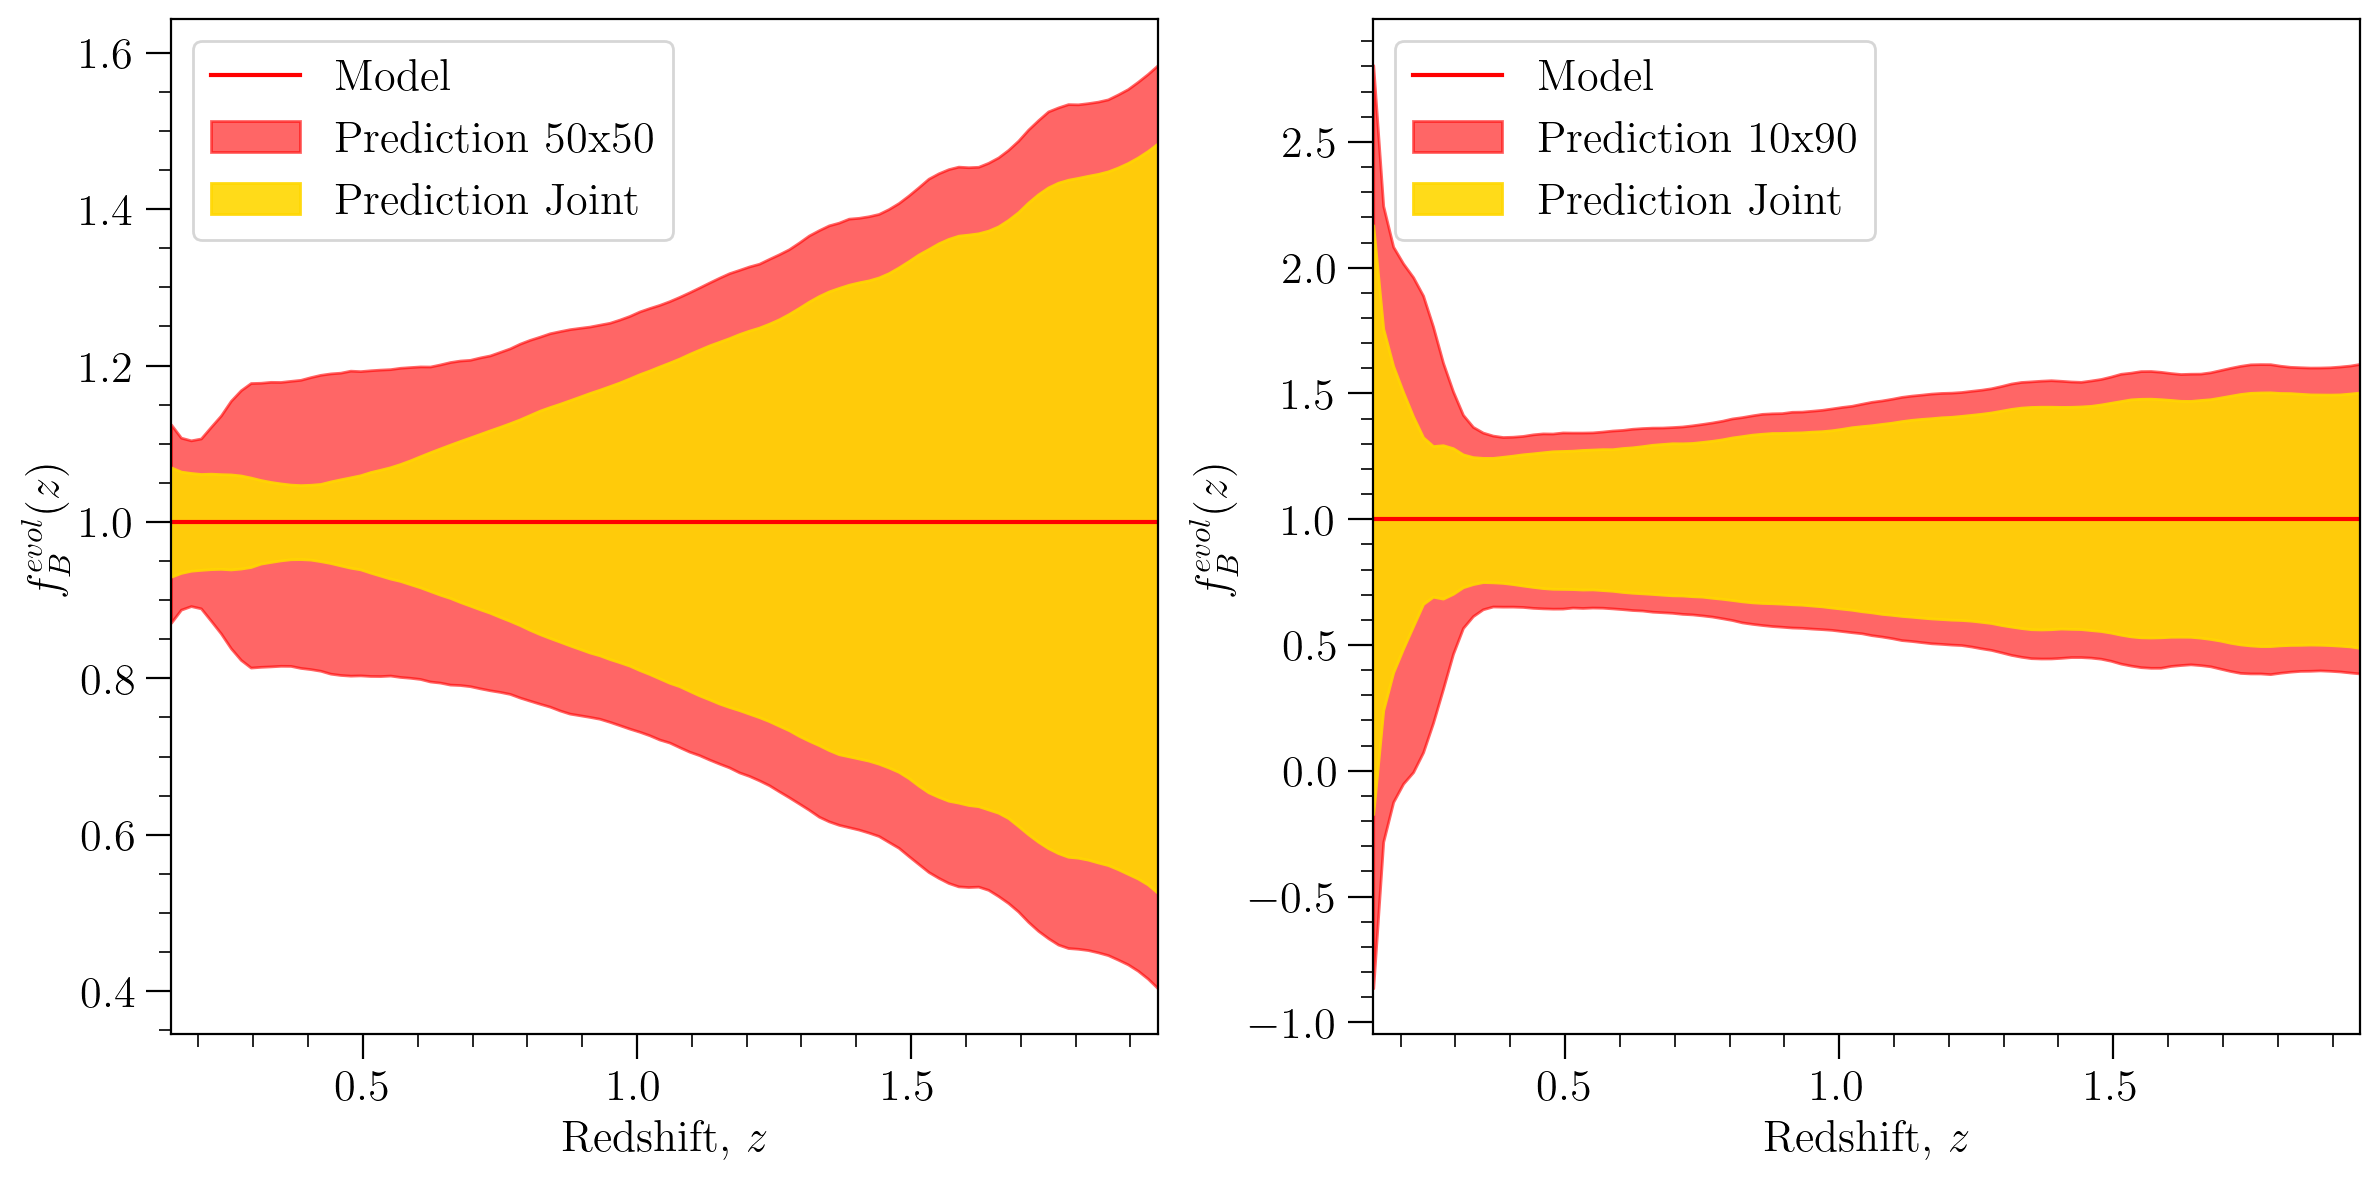

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid/fevol_50_B_fid, '-', color='red', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feB_50, '*', color='black')
ax[1].plot(z_lin, fevol_10_B_fid/fevol_10_B_fid, '-', color='red', lw = 1.5, label = 'Model')
#ax[1].plot(z_bins, feB_10, '*', color='black')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, fevol_B_50_lower_bound_priors, fevol_B_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (fevol_B_50_lower_bound_+10)/(fevol_50_B_fid+10), (fevol_B_50_upper_bound_+10)/(fevol_50_B_fid+10), color='red', alpha=0.6, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (fevol_B_50_lower_bound+10)/(fevol_50_B_fid+10), (fevol_B_50_upper_bound+10)/(fevol_50_B_fid+10), color='gold', alpha=0.9, label = 'Prediction Joint')

#ax[1].fill_between(z_lin, fevol_B_10_lower_bound_priors, fevol_B_10_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (fevol_B_10_lower_bound_+10)/(fevol_10_B_fid+10), (fevol_B_10_upper_bound_+10)/(fevol_10_B_fid+10), color='red', alpha=0.6, label = 'Prediction 10x90')
ax[1].fill_between(z_lin, (fevol_B_10_lower_bound+10)/(fevol_10_B_fid+10), (fevol_B_10_upper_bound+10)/(fevol_10_B_fid+10), color='gold', alpha=0.9, label = 'Prediction Joint')

for axi in ax:
    axi.set_xlim(0.15,1.95)
    #axi.set_ylim(-20, 20)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_B(z)$')
    axi.legend(loc='upper left')

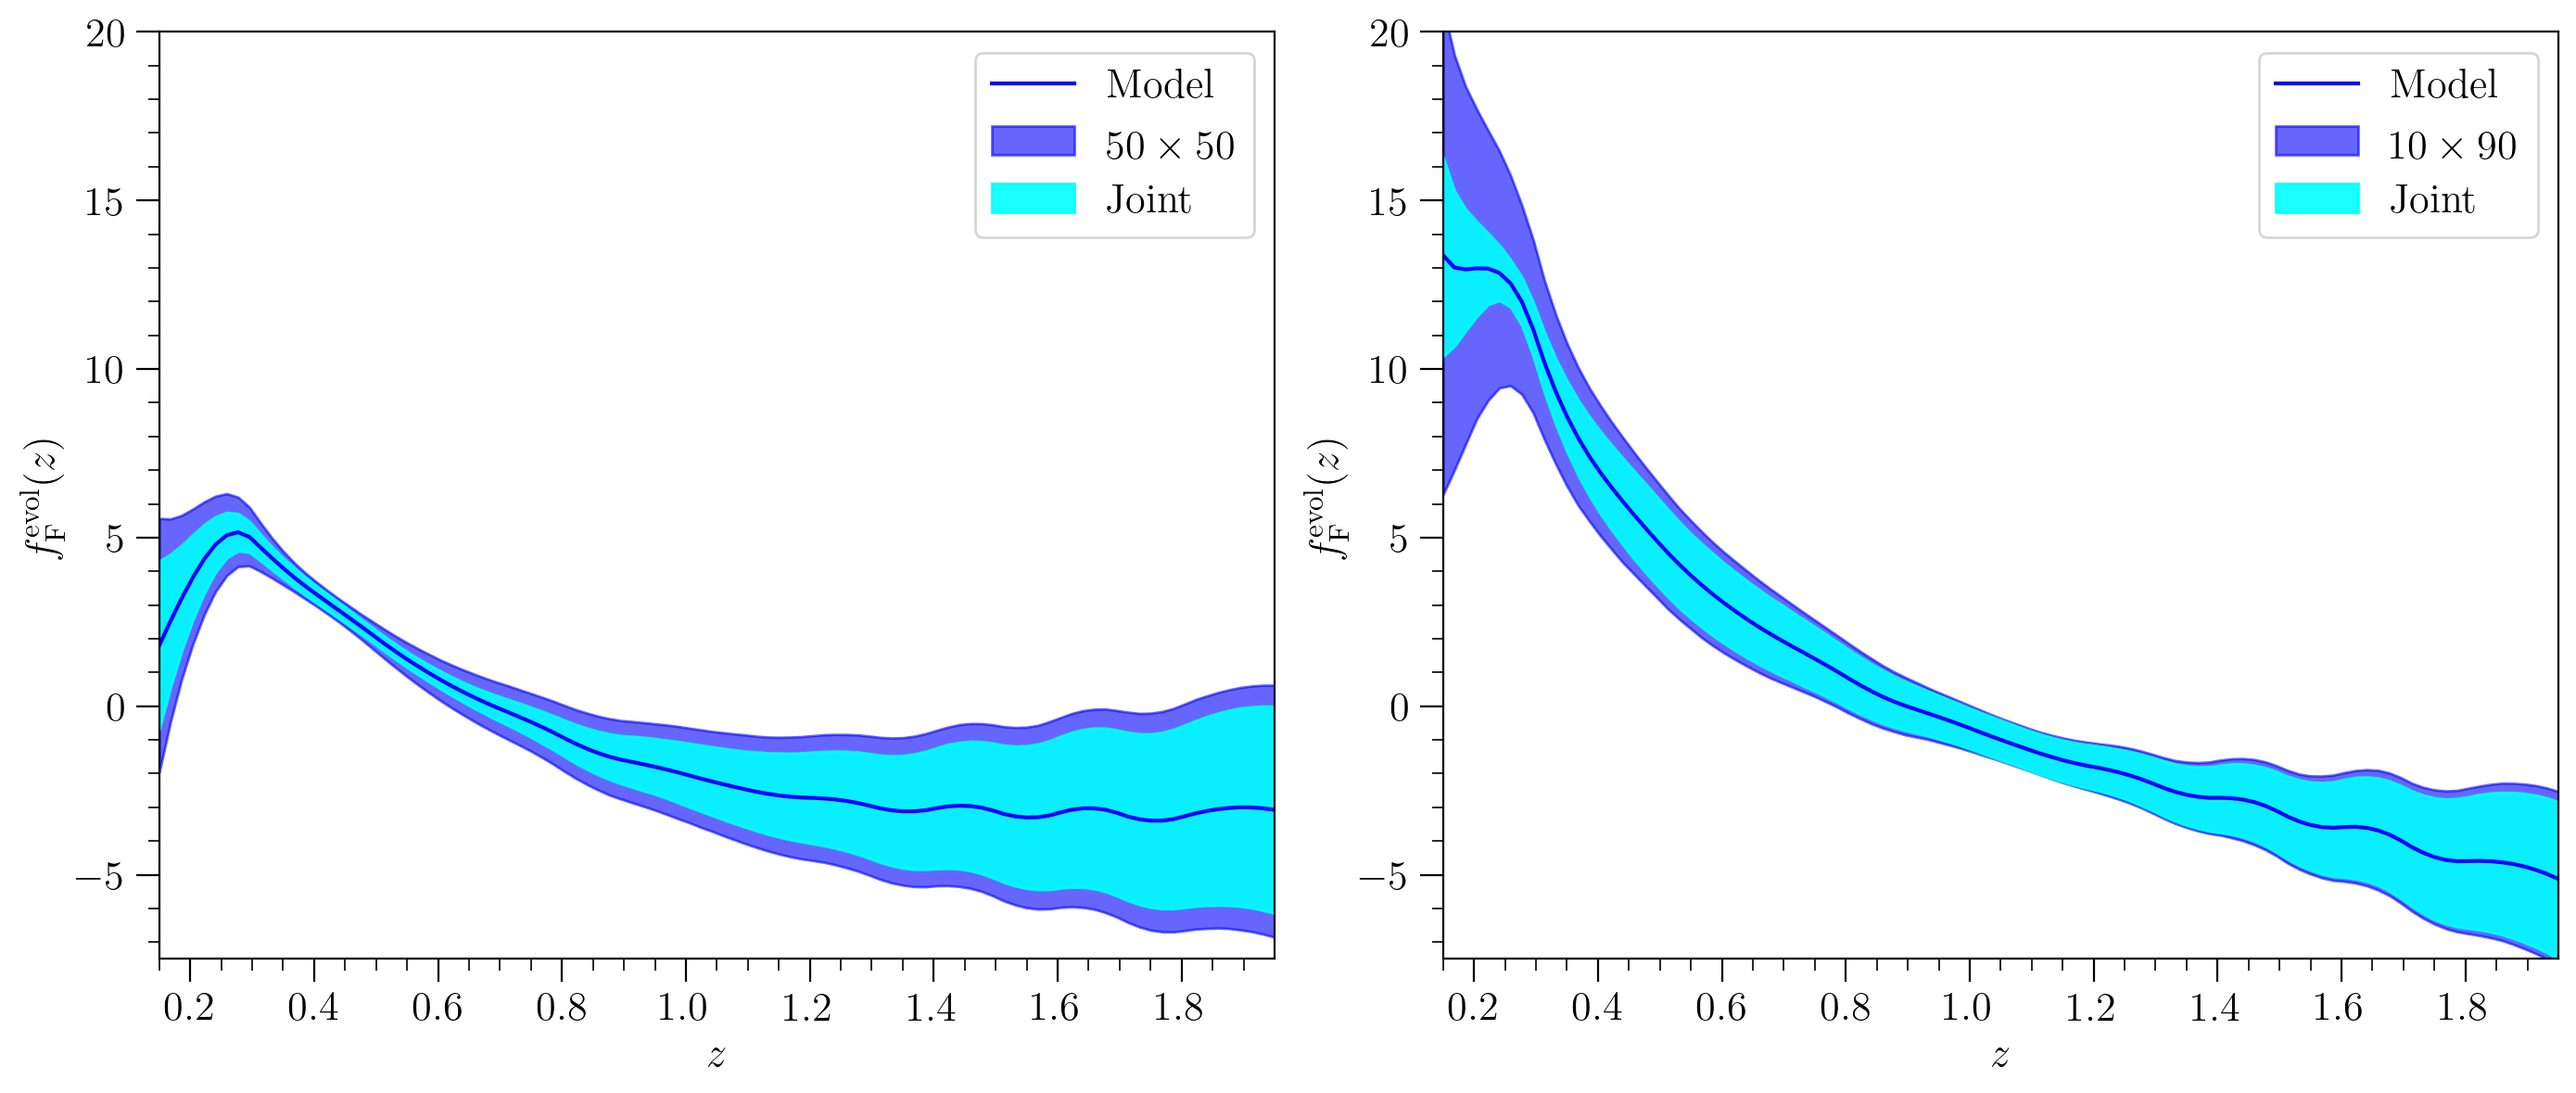

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_F_fid, '-', color='blue', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feF_50, '*', color='black')
ax[1].plot(z_lin, fevol_10_F_fid, '-', color='blue', lw = 1.5, label ='Model')
#ax[1].plot(z_bins, feF_10, '*', color='black')

# Shade the 68% confidence interval
#ax[0].fill_between(z_lin, fevol_F_50_lower_bound_priors, fevol_F_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, fevol_F_50_lower_bound_, fevol_F_50_upper_bound_, color='blue', alpha=0.6, label = r'$50\times 50$')
ax[0].fill_between(z_lin, fevol_F_50_lower_bound, fevol_F_50_upper_bound, color='cyan', alpha=0.9, label = r'Joint')


#ax[1].fill_between(z_lin, fevol_F_10_lower_bound_priors, fevol_F_10_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, fevol_F_10_lower_bound_, fevol_F_10_upper_bound_, color='blue', alpha=0.6, label = r'$10\times 90$')
ax[1].fill_between(z_lin, fevol_F_10_lower_bound, fevol_F_10_upper_bound, color='cyan', alpha=0.9, label = r'Joint')


for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_ylim(-7.5, 20)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$f^\mathrm{evol}_\mathrm{F}(z)$')
    axi.legend(loc='upper right')
    
plt.savefig("plots/fevolF_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

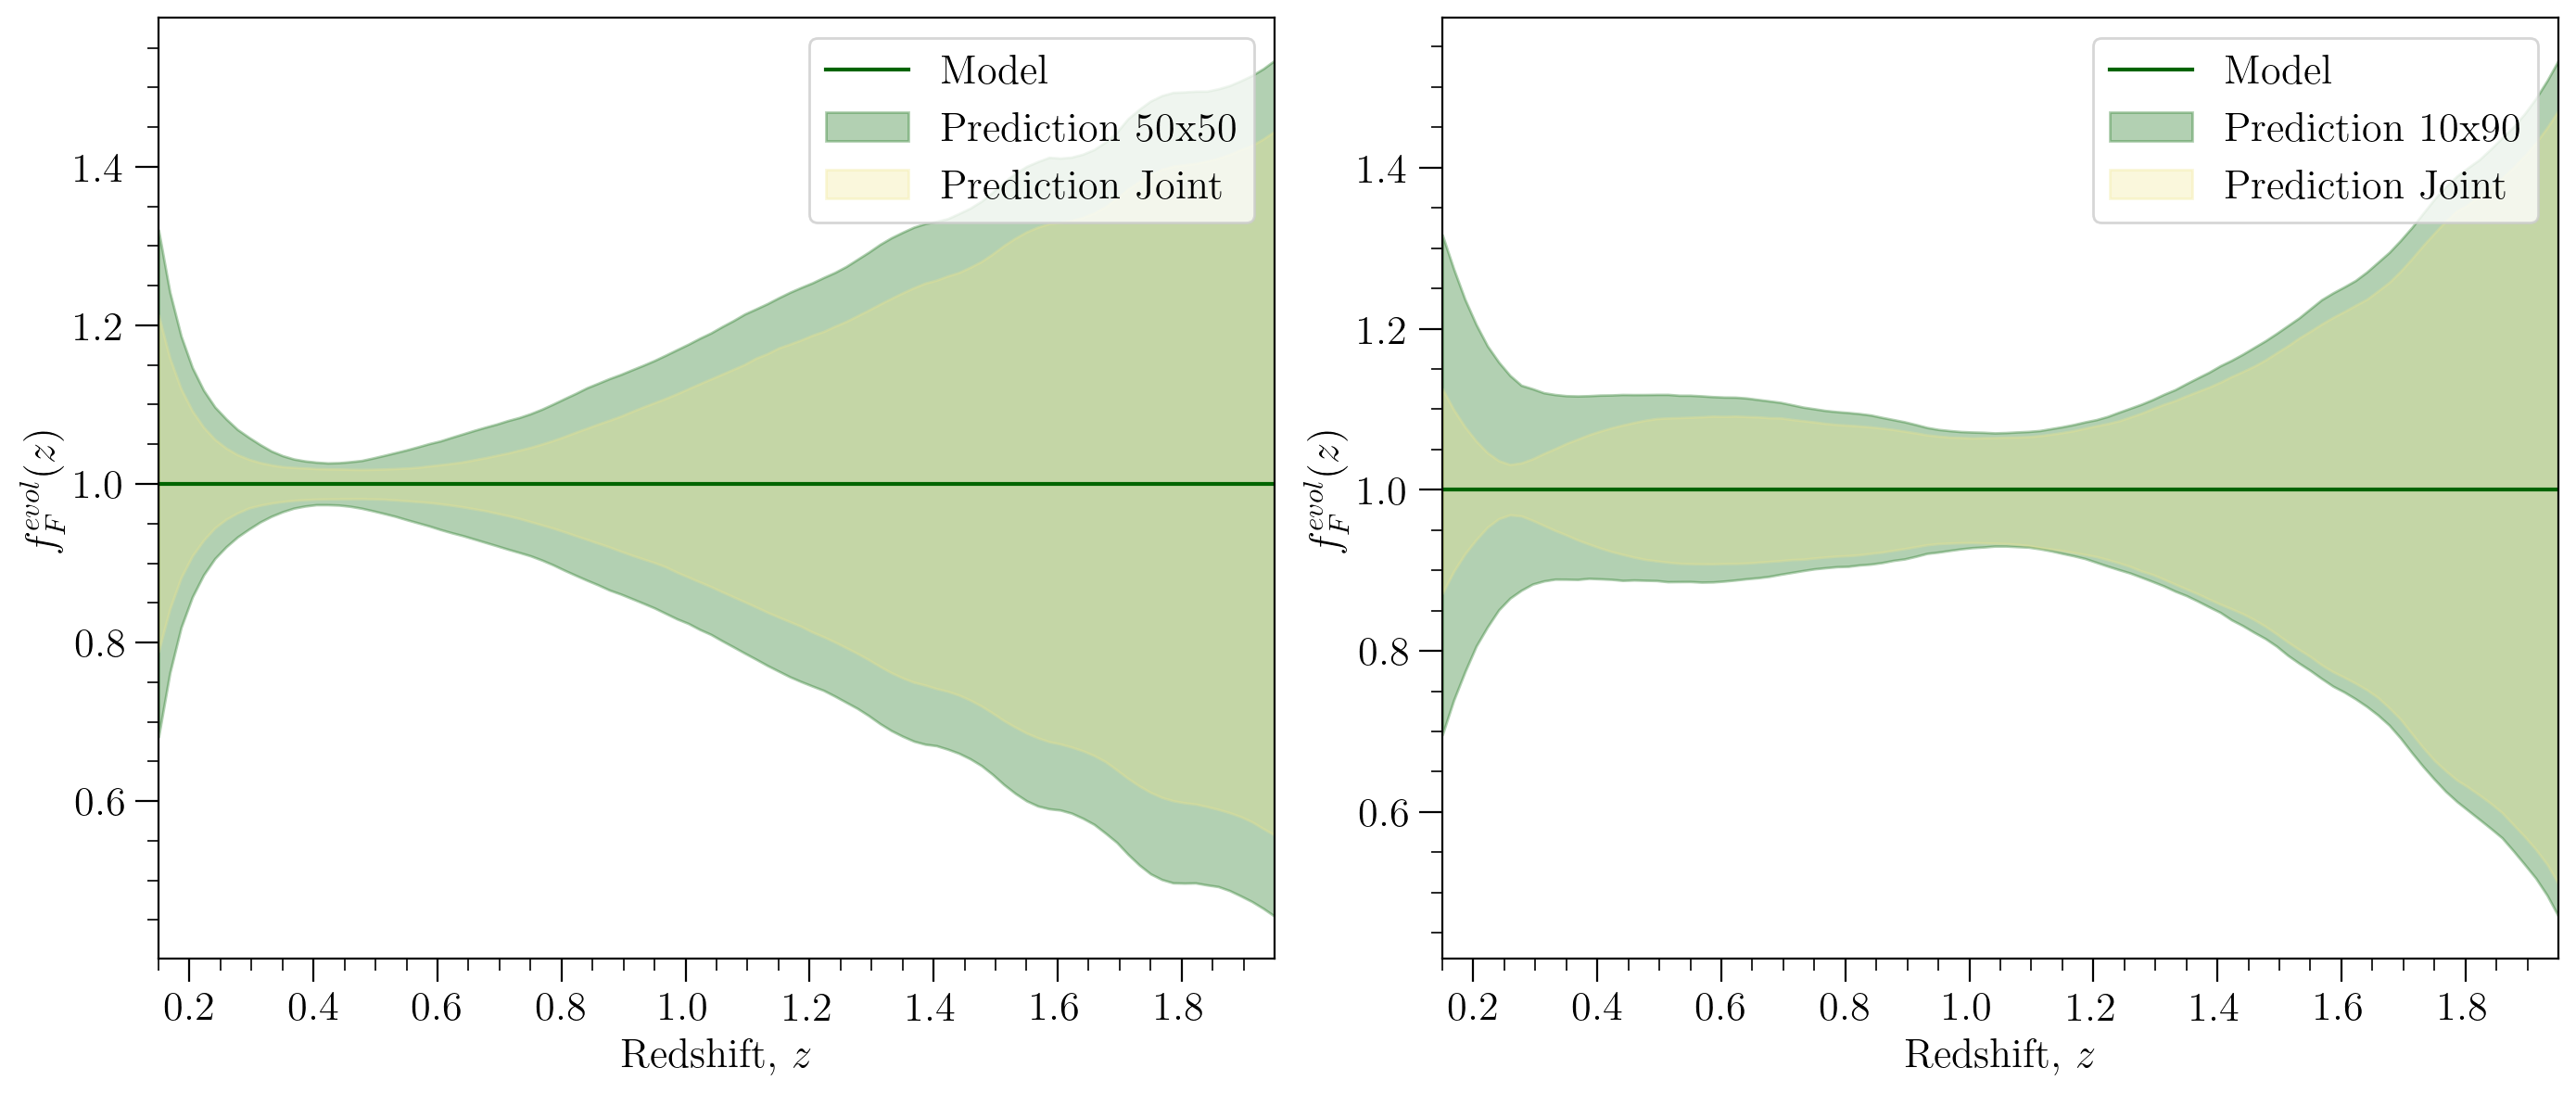

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_F_fid/fevol_50_F_fid, '-', color='darkgreen', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feF_50, '*', color='black')
ax[1].plot(z_lin, fevol_10_F_fid/fevol_10_F_fid, '-', color='darkgreen', lw = 1.5, label ='Model')
#ax[1].plot(z_bins, feF_10, '*', color='black')

shift = 10

# Shade the 68% confidence interval
#ax[0].fill_between(z_lin, fevol_F_50_lower_bound_priors, fevol_F_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (fevol_F_50_lower_bound_ + shift)/(fevol_50_F_fid + shift), (fevol_F_50_upper_bound_ + shift)/(fevol_50_F_fid + shift), color='darkgreen', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (fevol_F_50_lower_bound + shift)/(fevol_50_F_fid + shift), (fevol_F_50_upper_bound + shift)/(fevol_50_F_fid+shift), color='khaki', alpha=0.3, label = 'Prediction Joint')


#ax[1].fill_between(z_lin, fevol_F_10_lower_bound_priors, fevol_F_10_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (fevol_F_10_lower_bound_ + shift)/(fevol_10_F_fid + shift), (fevol_F_10_upper_bound_ + shift)/(fevol_10_F_fid + shift), color='darkgreen', alpha=0.3, label = 'Prediction 10x90')
ax[1].fill_between(z_lin, (fevol_F_10_lower_bound + shift)/(fevol_10_F_fid + shift), (fevol_F_10_upper_bound + shift)/(fevol_10_F_fid + shift), color='khaki', alpha=0.3, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15,1.95)
    #axi.set_ylim(-20, 20)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_F(z)$')
    axi.legend(loc='upper right')

## WIDTHS 

In [119]:
# Compute the PRIORS regions WIDTHS

sB_50_prior_width = sB_50_upper_bound_priors - sB_50_upper_bound_priors
sB_10_prior_width = sB_10_upper_bound_priors - sB_10_upper_bound_priors

sM_50_prior_width = sM_upper_bound_priors - sM_lower_bound_priors
nevol_prior_width = nevol_upper_bound_priors - nevol_lower_bound_priors

fevol_B_50_prior_width = fevol_B_50_upper_bound_priors - fevol_B_50_lower_bound_priors
fevol_B_10_prior_width = fevol_B_10_upper_bound_priors - fevol_B_10_lower_bound_priors

fevol_F_50_prior_width = fevol_F_50_upper_bound_priors - fevol_F_50_lower_bound_priors
fevol_F_10_prior_width = fevol_F_10_upper_bound_priors - fevol_F_10_lower_bound_priors

In [120]:
dict_priors_width = {
    'sB_50': sB_50_prior_width, 
    'sB_10': sB_10_prior_width, 
    'sM': sM_50_prior_width, 
    'nevol': nevol_prior_width, 
    'fevol_B_50': fevol_B_50_prior_width, 
    'fevol_B_10': fevol_B_10_prior_width, 
    'fevol_F_50': fevol_F_50_prior_width, 
    'fevol_F_10': fevol_F_10_prior_width
    }

In [121]:
sB_50_width = sB_50_upper_bound - sB_50_lower_bound
sB_10_width = sB_10_upper_bound - sB_10_lower_bound
sB_Joint_50_width = sB_Joint_50_upper_bound - sB_Joint_50_lower_bound
sB_Joint_10_width = sB_Joint_10_upper_bound - sB_Joint_10_lower_bound

sM_50_width = sM_50_upper_bound - sM_50_lower_bound
sM_10_width = sM_10_upper_bound - sM_10_lower_bound
sM_Joint_width = sM_Joint_upper_bound - sM_Joint_lower_bound

nevol_50_width = nevol_50_upper_bound - nevol_50_lower_bound
nevol_30_width = nevol_10_upper_bound - nevol_10_lower_bound
nevol_Joint_width = nevol_Joint_upper_bound - nevol_Joint_lower_bound

In [122]:
dict_widths = {
    'z': z_lin,
    'sB_50': sB_50_width, 
    'sB_10': sB_10_width, 
    'sB_Joint_50': sB_Joint_50_width, 
    'sB_Joint_10': sB_Joint_10_width,
    'sM_50': sM_50_width,
    'sM_10': sM_10_width,
    'sM_Joint': sM_Joint_width,
    'nevol_50': nevol_50_width,
    'nevol_10': nevol_30_width,
    'nevol_Joint': nevol_Joint_width
    }

In [123]:
import pickle as pk

# Saving the dictionary to a file
with open('widths_Joint_50x10.pkl', 'wb') as f:
    pk.dump(dict_widths, f)